# Lending Club Case Study

#### Submitted By:
1) Mudassar Dildar Majgaonkar (mtrworld@gmail.com)

2) Nitin Gupta (learningwithnitingupta@gmail.com)

### Basic Objective for the Case Study
The basic objective of this Case study is to help identify the consumer finance company the risky loan applicants or defaulters. By identifying these risky loan applicants, the company can reduce lending such loans and thereby cutting down the amount of credit loss. 

The objective of this case study is to find the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators leading to loan default. The company can utilize this knowledge for its portfolio and risk assessment. 


### Understanding Data
We are provided with the loan applicants data by Lending Club and we will be using this data for analysis. To start with we will start with data pre-processing:
1) Data Cleaning:
In this we will get rid of all the null values and the columns/data which is not useful for analysis.

In [1]:
#Import basic python libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import necessary libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Set the display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
#Import the data given
loan_data = pd.read_csv('loan.csv', encoding='ISO-8859-1')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Extract metadata about the data
loan_data.shape
loan_data.isnull().sum()

(39717, 111)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [4]:
#Calculate the null data percentage
null_data = (loan_data.isnull().sum()/len(loan_data.index))*100

In [5]:
#Filter data with 50% or more null values
null_data= null_data.loc[null_data >= 50]
len(null_data)

57

As seen from above data, around 57 columns out of 111 columns have null values greater than 50%. We will remove these columns from the main dataframe (loan_data) because these columns are not useful for analysis.
For doing so get the list of columns which have null data greater than 50% and drop them from loan_data

In [6]:
#Get the column name of null values greater than 50%
remove_columns = list(null_data[null_data >= 50].index)

#Drop these columns from the main dataset
loan_data.shape
loan_data = loan_data.drop(remove_columns, axis=1)
loan_data.shape

(39717, 111)

(39717, 54)

Now lets check the missing/null data from the remianing data.

In [7]:
#Check the data status
round((loan_data.isnull().sum()/len(loan_data))*100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

As seen from the above there are only 4 columns with null values: a) emp_title - Employement Title (~6%) b) emp_length - Employment Length (~3%) c) desc - Loan Description (~33%) d) pub_rec_backruptcies - Number of public record bankruptcies (~2%).
So seems apart from "desc" rest all of the data is pretty usable. 

We can use desc column for analysis by extarcting the sentiment from it (positive, negative, neutral) about the loan application which can also be one of the driving factor for risk analysis. But as compared to others its least important for now.

The second column with most null_values is emp_title. We can consider that the ones who haven't mentioned the Employment Title can be self employed. We can populate this column with "self-employed" title depending on the values populated in column. So lets check first for that.

In [8]:
#Check the values in column emp_title
loan_data.groupby(['emp_title']).id.count().head()

emp_title
  old palm inc                       1
 Brocade Communications              1
 CenturyLink                         1
 Department of Homeland Security     1
 Down To Earth Distributors, Inc.    1
Name: id, dtype: int64

Seems most of the values populated in this column are the name of employers/company name the applicants work for. So we can safely populate the null values to self_employed for analysis purpose

In [9]:
#Populate the null values with "self_employed" to get rid of null values
loan_data['emp_title'].fillna("self_employed",inplace=True)

#Check data status
round((loan_data.isnull().sum()/len(loan_data))*100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      0.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

The third column is emp_length (Employment Length). We can assume that the applicant is fresher and has no prior employment experience for populating this values. Also for self employed this value doesnt matter. But again this depends upon the loan amount sanctioned to the applicant and his income. Its obvious that if loan_amount sanctioned is more than the annual income the probability of loan default is more. So lets consider and populate the values accordingly.

In [10]:
#Populate empl_length = 0 for loan_amount< annual income. Since these are freshers who are more likely to payoff the loan
loan_data['emp_length'] = np.where(loan_data['emp_length'].isnull() & (loan_data['loan_amnt'] < loan_data['annual_inc']), 0, loan_data['emp_length'])

#Check data status
round((loan_data.isnull().sum()/len(loan_data))*100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      0.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

Now for variable analysis we will need to differentiate data into:

1) Categorical data

2) Numerical data

In [11]:
#Filter out the categorical variables
categorical_data = loan_data.select_dtypes(exclude = np.number)

#Filter out the numeric values
numeric_data = loan_data.select_dtypes(include = np.number)

#Check out the data
print("Categorical Variables are:")
categorical_data.shape
categorical_data.columns

print("Numeric Variables are:")
numeric_data.shape
numeric_data.columns

Categorical Variables are:


(39717, 23)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

Numeric Variables are:


(39717, 31)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

Term, Interest Rate(int_rate) and Employment Length(emp_length) should be included in numerical values but they arent. Lets check the data in these columns.

In [12]:
#Check sample data is emp_length and int_rate
loan_data.groupby(['term']).id.count()
loan_data.groupby(['emp_length']).id.count()
loan_data.groupby(['int_rate']).id.count()

term
 36 months    29096
 60 months    10621
Name: id, dtype: int64

emp_length
0            1075
1 year       3240
10+ years    8879
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
Name: id, dtype: int64

int_rate
10.00%    251
10.01%      7
10.08%     48
10.14%     10
10.20%     18
10.25%    218
10.28%     21
10.33%      9
10.36%    250
10.37%    468
10.38%    219
10.39%     49
10.46%      7
10.51%     22
10.59%    380
10.62%    228
10.64%      2
10.65%    435
10.71%     43
10.74%    312
10.75%    250
10.78%     16
10.83%     30
10.91%     17
10.95%     78
10.96%     14
10.99%    956
11.03%     50
11.09%      5
11.11%    331
11.12%    259
11.14%    206
11.22%     15
11.26%     91
11.28%     18
11.34%     41
11.36%    247
11.41%      7
11.46%     25
11.48%    183
11.49%    825
11.54%     12
11.58%     99
11.59%      9
11.63%      8
11.66%     38
11.71%    607
11.72%      9
11.78%     26
11.83%    233
11.86%    391
11.89%    154
11.91%     11
11.97%     37
11.99%    532
12.04%      7
12.09%     18
12.12%      5
12.17%     10
12.18%    203
12.21%    169
12.22%     13
12.23%    134
12.29%     36
12.36%      8
12.41%     20
12.42%    442
12.49%      9
12.53%    327
12.54%      5
12.61%    1

In [13]:
#Since the term is mentioned in months we can safely remove months string ans consider just the numeric value
#Extract the integers
loan_data['term'] = loan_data['term'].str.split(" ",n=2,expand=True)[1]

#Convert to numeric
loan_data['term'] = loan_data['term'].apply(lambda x: pd.to_numeric(x))

loan_data['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [14]:
#Convert the emp_length column to numeric values.
#Here we will consider completed number of years as employment years
#Hence,< 1 year will be considered as 0 years and 10+ will be considered as 10 years.

#Define function to normalize the data 
def employment_length(n):
    if n == '< 1 year':
        return '0 year'
    elif n == '10+ years':
        return '10 years'
    else:
        return n
        
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: employment_length(x))

#Now extract the integers
loan_data['emp_length'] = loan_data['emp_length'].str.split(" ",n=1,expand=True)[0]

loan_data.groupby(['emp_length']).id.count()

loan_data['emp_length'].isnull().sum()/len(loan_data)
loan_data.dropna(axis=0,inplace=True)
loan_data['emp_length'].isnull().count()

emp_length
0     4583
1     3240
10    8879
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: id, dtype: int64

0.027066495455346576

25376

In [15]:
#Similarly we will normalize the int_rate column to numeric
#Now extract the integers
loan_data['int_rate'] = loan_data['int_rate'].str.split("%",n=1,expand=True)[0]

# convert to numeric
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x))

loan_data.groupby(['int_rate']).id.count().head()

int_rate
5.42    301
5.79    250
5.99    202
6.00     13
6.03    239
Name: id, dtype: int64

In [16]:
#Check data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25376 entries, 0 to 39623
Data columns (total 54 columns):
id                            25376 non-null int64
member_id                     25376 non-null int64
loan_amnt                     25376 non-null int64
funded_amnt                   25376 non-null int64
funded_amnt_inv               25376 non-null float64
term                          25376 non-null int64
int_rate                      25376 non-null float64
installment                   25376 non-null float64
grade                         25376 non-null object
sub_grade                     25376 non-null object
emp_title                     25376 non-null object
emp_length                    25376 non-null object
home_ownership                25376 non-null object
annual_inc                    25376 non-null float64
verification_status           25376 non-null object
issue_d                       25376 non-null object
loan_status                   25376 non-null object
pymnt_pl

In [17]:
#Employee length seems to be of type object. Convert to integer for ease of processing
loan_data.emp_length = loan_data.emp_length.astype(int)

#Filter out the categorical variables
categorical_data = loan_data.select_dtypes(exclude = np.number)

#Filter out the numeric values
numeric_data = loan_data.select_dtypes(include = np.number)

#Check out the data
print("Categorical Variables are:")
categorical_data.shape
categorical_data.columns

print("Numeric Variables are:")
numeric_data.shape
numeric_data.columns

Categorical Variables are:


(25376, 20)

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

Numeric Variables are:


(25376, 34)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Now the data seems to be in pretty good shape. But lets consolidate the data bit more. In Categorical Variables: title, zip_code, addr_state are some fields which are not of much importance while lending.

In [18]:
#drop the values
loan_data = loan_data.drop(columns=['title','zip_code','addr_state'],axis=1)

In [19]:
#Filter out the categorical variables
categorical_data = loan_data.select_dtypes(exclude = np.number)

#Filter out the numeric values
numeric_data = loan_data.select_dtypes(include = np.number)

#Check out the data
print("Categorical Variables are:")
categorical_data.shape
categorical_data.columns

print("Numeric Variables are:")
numeric_data.shape
numeric_data.columns

Categorical Variables are:


(25376, 17)

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

Numeric Variables are:


(25376, 34)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Now lets check some values in numeric variables to get an idea of the range we will be handling

In [20]:
loan_data.emp_length.unique()

array([10,  0,  1,  8,  9,  4,  5,  3,  2,  7,  6], dtype=int64)

In [21]:
loan_data.chargeoff_within_12_mths.unique()

array([0.])

In [22]:
loan_data.policy_code.unique()

array([1], dtype=int64)

In [23]:
loan_data.collections_12_mths_ex_med.unique()

array([0.])

In [24]:
loan_data.acc_now_delinq.unique()

array([0], dtype=int64)

In [25]:
loan_data.chargeoff_within_12_mths.unique()

array([0.])

In [26]:
loan_data.delinq_amnt.unique()

array([0], dtype=int64)

In [27]:
loan_data.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [28]:
loan_data.tax_liens.unique()

array([0.])

In [29]:
loan_data.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5, 11,  7], dtype=int64)

In [30]:
loan_data.inq_last_6mths.unique()

array([1, 5, 0, 2, 3, 4, 6, 7, 8], dtype=int64)

In [31]:
loan_data.revol_util.unique()

array(['83.70%', '9.40%', '21%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [32]:
loan_data.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

From the above output its clear that chargeoff_within_12_mths,policy_code,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,application_type have either value 0 or single/same entry. We can remove them to clear out our data

In [33]:
#Drop the values
loan_data.shape

loan_data = loan_data.drop(columns=['chargeoff_within_12_mths','policy_code','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','application_type'],axis=1)

loan_data.shape

(25376, 51)

(25376, 44)

In [34]:
loan_data.pymnt_plan.unique()
loan_data.initial_list_status.unique()

array(['n'], dtype=object)

array(['f'], dtype=object)

We also wont need data like url, pymnt_plan and initial_list_status. We will also remove the description column for now since sentiment analysis is yet not covered and its of least important to us for now.

In [35]:
#Drop the values
loan_data.shape
loan_data = loan_data.drop(columns=['url','pymnt_plan','initial_list_status','desc'],axis=1)
loan_data.shape
loan_data.columns

(25376, 44)

(25376, 40)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Also from above o/p it seems revol_util is incorrectly classified as categorical data since the data is in form of percentages. Lets convert it to numeric for analysis later.

In [36]:
#Extract the numeric value from revol_util
loan_data['revol_util'] = loan_data['revol_util'].str.split("%",n=1,expand=True)[0]

# convert to numeric
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: pd.to_numeric(x))

loan_data.groupby(['revol_util']).id.count().head()

revol_util
0.00    603
0.01      1
0.04      1
0.05      1
0.10     36
Name: id, dtype: int64

In [37]:
#Filter out the categorical variables
categorical_data = loan_data.select_dtypes(exclude = np.number)

#Filter out the numeric values
numeric_data = loan_data.select_dtypes(include = np.number)

#Check out the data
print("Categorical Variables are:")
categorical_data.shape
categorical_data.columns

print("Numeric Variables are:")
numeric_data.shape
numeric_data.columns

Categorical Variables are:


(25376, 11)

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

Numeric Variables are:


(25376, 29)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Now lets normalize the filtered data.
We will start with the columns with date information

In [38]:
#Columns with date information
loan_data[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25376 entries, 0 to 39623
Data columns (total 4 columns):
issue_d               25376 non-null object
earliest_cr_line      25376 non-null object
last_pymnt_d          25376 non-null object
last_credit_pull_d    25376 non-null object
dtypes: object(4)
memory usage: 991.2+ KB


As seen above the date columns are of type object lets convert them to date format so ease of analysis

In [39]:
#Convert to datetime format
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data.last_pymnt_d = pd.to_datetime(loan_data.last_pymnt_d, format='%b-%y')
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')

#Check date information
loan_data[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25376 entries, 0 to 39623
Data columns (total 4 columns):
issue_d               25376 non-null datetime64[ns]
earliest_cr_line      25376 non-null datetime64[ns]
last_pymnt_d          25376 non-null datetime64[ns]
last_credit_pull_d    25376 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 991.2 KB


Lets extract months and years seperately just for analysis purpose

In [40]:
loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.month
loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.dt.year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.dt.month
loan_data['last_pymnt_d_year'] = loan_data.last_pymnt_d.dt.year
loan_data['last_pymnt_d_month'] = loan_data.last_pymnt_d.dt.month
loan_data['last_credit_pull_d_year'] = loan_data.last_credit_pull_d.dt.year
loan_data['last_credit_pull_d_month'] = loan_data.last_credit_pull_d.dt.month

## Analysis

Now since the data is in pretty good shape we can start our analysis.

Lets check what are the loan_status?

In [41]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)



The basic objective for this analysis is to find the ***driving factors*** for the ***loan defaults*** to minimise the losses. Alternatively we will also be interested in ***factors*** leading to ***loan fully paid offs*** to increase the benefits.
So basically we are more interested in finding a trade off between the factors leading to loan defaults and full loan payback (where all the loan is paid off). 

So basically we are interested in loans with statuses:

 - Charged off (Loan Defaulters)
 - Fully Paid (Full Loan Payers)
 
 We are least interested in the 'Current' loans so we will filter the data accordingly

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [42]:
#Filter the data with only loan_status Fully Paid and Charged Off
loan_data = loan_data[loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

We need to check how various variables affect the loan_status and for that we will need to visualize the distribution of various variables with respect to the loan_status.




## <span style='color:orange'> Univariate Analysis </span>

We will start our analysis to see how different variables behave against the loan status. In this section we will analyze only 1 variable at a time and hence constituting to ***UNIVARIATE ANALYSIS.***

During our initial testing we found that there are few variables which can be effectively analyzed by dividing them into segments or bins. So we have segmented these variables at appropriate places for analysis. This will constitute to the ***SEGMENTED UNIVARIATE ANALYSIS***

### <span style='color:green'> Numeric Variables Analysis </span>

We have identified following variables from dataset for numeric variable / quantitative analysis

1)	loan_amnt

2)	int_rate

3)	funded_amnt

4)	funded_amnt_inv

5)	term

6)	installment

7)	emp_length

8)	annual_inc

9)	dti

10)	delinq_2yrs

11)	inq_last_6mths

12)	open_acc

13)	pub_rec

14)	revol_bal

15) revol_util

16)	total_acc

17)	out_prncp

18)	out_prncp_inv

19)	total_pymnt

20)	total_pymnt_inv

21)	total_rec_prncp

22)	total_rec_int

23)	total_rec_late_fee

24)	recoveries

25)	collection_recovery_fee

26)	last_pymnt_amnt

27)	pub_rec_bankruptcies



Since we will need to check out how differnet variables behave with respect to loan status, lets define a general method that will plot the distribution for the specified variable against loan_status.

In [43]:
# Solution code copied from stackoverflow and modified accordingly
# Link to stackflow: https://stackoverflow.com/a/48372659 
#This method display the value at the top of each bar in barplots
def showBarLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. 
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        #If the Bar value is float format the value to 1 Decimal Points
        if y_value.dtype == 'float64':
            label = "{:.1f}%".format(y_value)
        else:
            label = y_value
            
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [44]:
# This method plots the distribution of the given variable 
# and also plots a boxplot for variable against loan_status for the value of dataframe and column passed.
def plot_loan_status_dist(df, col):
    plt.figure(figsize=(30,8))
    plt.suptitle(' Loan Status v/s ' +col ,fontsize=18)
    plt.subplot(1, 3, 1)
    ax1 = sns.distplot(df[col])
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df['loan_status'], y=df[col], data=df)
    plt.show()

### <span style='color:red'> 1) Variable </span> : <span style='color:blue'> loan_amnt (Loan Amount) </span>

Check the basic information first

In [45]:
loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,12790.568182,7968.964837,1000.0,6250.0,11050.0,18000.0,35000.0
Fully Paid,21156.0,11249.536774,7143.865729,500.0,6000.0,10000.0,15000.0,35000.0


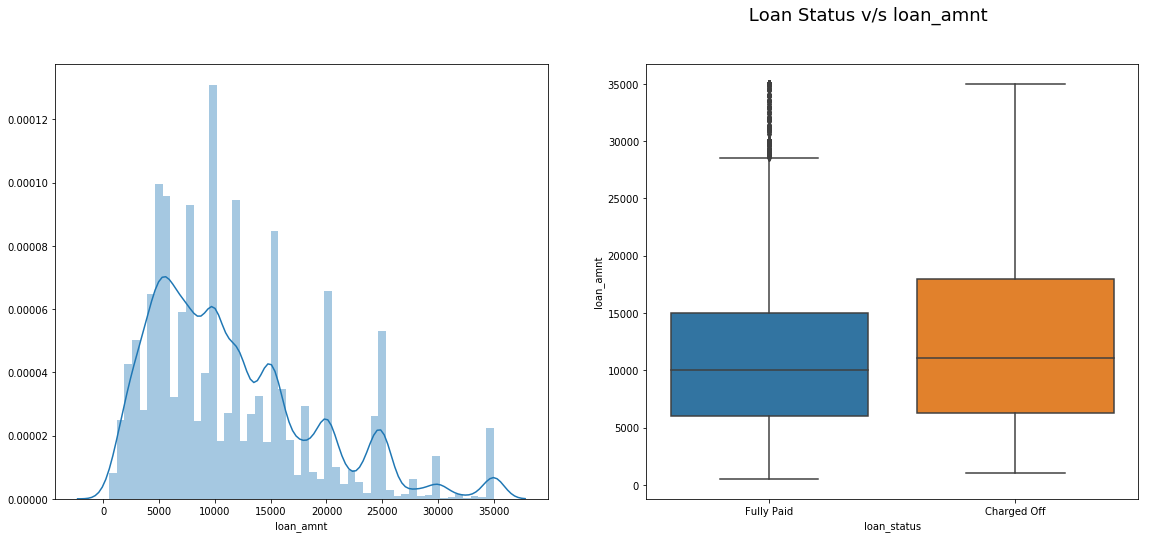

In [46]:
#There seems difference in mean and std of the values. So lets analyze it furthur
plot_loan_status_dist(loan_data,'loan_amnt')

<Figure size 360x504 with 0 Axes>

Text(0.5, 1.0, 'Loan Amount v/s Loan Status')

Text(0.5, 0, 'Loan Status')

Text(0, 0.5, 'Loan Amount')

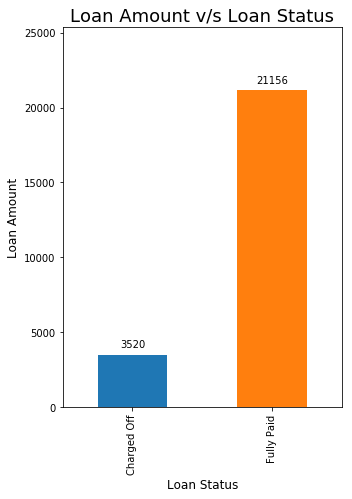

In [47]:
#Count plot for the number of loans with respective status
plt.figure(figsize=(5,7))
ax = loan_data.groupby('loan_status').loan_amnt.count().plot.bar()
plt.title('Loan Amount v/s Loan Status', fontsize=18)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Loan Amount', fontsize=12)
showBarLabels(ax)
plt.show()


<Figure size 360x504 with 0 Axes>

Text(0.5, 0.98, 'Loan Status v/s % of Loan Recovered')

Text(0.5, 1.0, 'Here Bar values are total % of respective loans recovered')

Text(0.5, 0, 'Loan Status')

Text(0, 0.5, '% loan recovered')

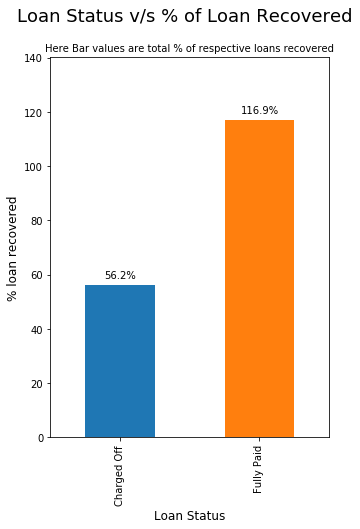

In [48]:
#Plot for loan status v/s Loan Recovered %
plt.figure(figsize=(5,7))
ax = (loan_data.groupby('loan_status').total_pymnt.sum() * 100 / loan_data.groupby('loan_status').loan_amnt.sum()).plot.bar()
plt.suptitle('Loan Status v/s % of Loan Recovered', fontsize=18)
plt.title('Here Bar values are total % of respective loans recovered', fontsize=10)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('% loan recovered', fontsize=12)
plt.margins(0.2, 0.2)
showBarLabels(ax)

As seen from above plot ~57% of loans are charged off while ~117% loans are paid off. 

117% means that they have recovered all the loans plus made 17% profit.

57% means that they were only able to recover 57% of "Charged Off" loans having deficit of 43%.

Also from the boxplot we can see that mean of loan_amnt is slightly inclined towards higher end for Charged Off loans implying higher loan amount are more susceptible to be Charged Off.

Now lets check which loan amounts are more inclined to be charged off?

From distribution plot "Loan Status v/s Loan Amount", we can see clear peaks at the interval of 5000. So lets create bins of 5000 each for Loan Amount to check which Loan Amounts are more likely to be Charged Off or Fully Paid Off

In [49]:
#Create Loan Amount Bins with interval of 5000
loan_data['loan_amnt_bin'] = pd.cut(loan_data['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


In [50]:
#This method plots the total % of data for a variable in dataset 
#And also plots total percent charged off for that variable in dataset
def plotCheckLoanStatus(dataframe, col):
    group_values = dataframe.groupby(['loan_status',col])[col].count()
    colCount = dataframe.groupby(col)[col].count()
    percentages = group_values.unstack() * 100 / colCount.T
    plt.figure(figsize=(20,10))
    plt.suptitle('Loan Amount v/s Loan Status', fontsize=16)
    plt.subplot(1, 2, 1)
    plt.title(col+' against Charged Off Loan %', fontsize=16)
    ax1 = percentages.loc['Charged Off'].plot.bar()
    ax1.set_xlabel(col)
    ax1.set_ylabel('% of loans Charged Off')
    showBarLabels(ax1, group_values['Charged Off'].to_dict())
    plt.subplot(1, 2, 2)
    plt.title('Charged Off Loans Distribution w.r.t to ' + col , fontsize=16)
    ax2 = percentages.loc['Charged Off'].plot.line()
    ax2.set_xlabel(col)
    ax2.set_ylabel('% of loans Charged Off')
    plt.plot()

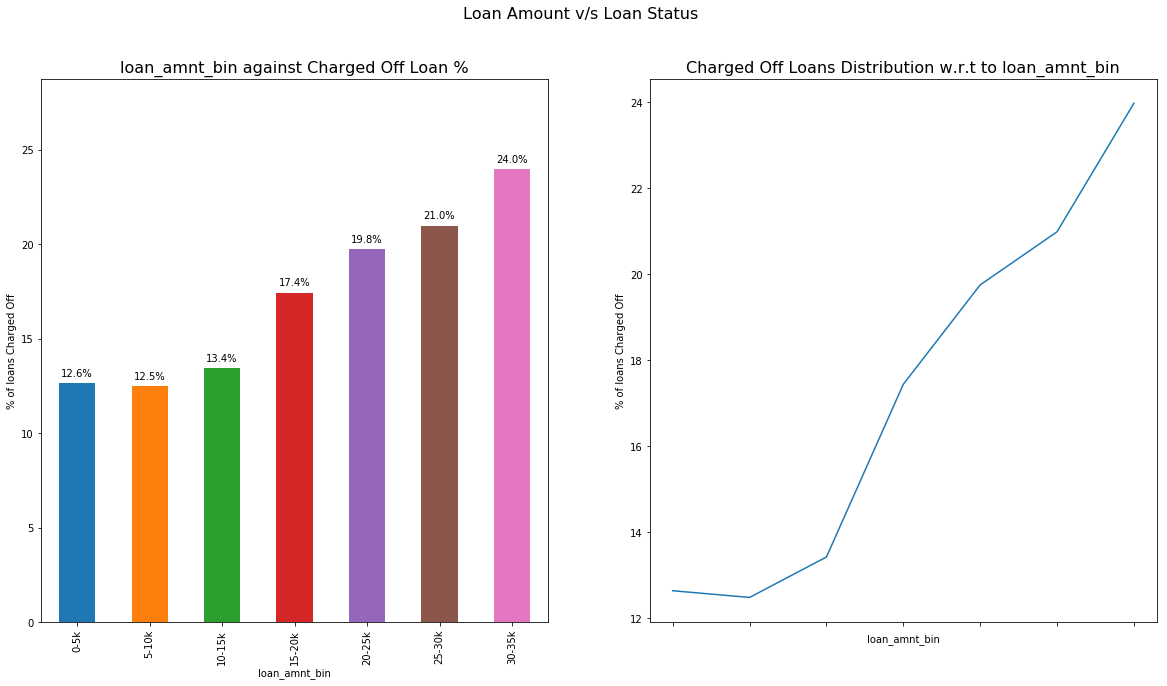

In [51]:
plotCheckLoanStatus(loan_data,'loan_amnt_bin')

From above plot its clear that for less amount the precentage for Charged Off is less (Plot: Loan Amount against Charged Off)  while it increases with the increase in the loan amount.

Similarly for less Loan amount the percentage of Fully Paid Off is more while it decreases as the loan amount Increases.

To find the exact range which can be narrowed down for defaulters in above plots we need to know the average default rate in the whole dataset. Any percent of default above the average can then we considered as a good candidate for default.

In [52]:
#Average default rate from the dataset
"Average Default Rate is: {:.1f}%".format(loan_data.loc[loan_data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_data))

'Average Default Rate is: 14.3%'

Text(0.5, 1.0, 'Number of Loans Approved')

Text(0.5, 0, 'Number of Loans Approved')

Text(0, 0.5, 'Loan Amount')

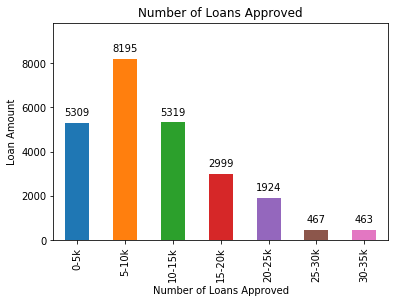

In [53]:
plt.title("Number of Loans Approved")
ax = loan_data.groupby('loan_amnt_bin').loan_status.count().plot.bar()
showBarLabels(ax)
plt.xlabel('Number of Loans Approved')
plt.ylabel('Loan Amount')

### <span style="color:red"> Observation </span>
1) As the loan amount increases so does the chance of defaulting increases.

2) So we could say that <span style="color:blue"> ***LOAN AMOUNT***</span> is a good measurement for identifying the defaulters.

3) As the ***Average Default Rate*** is ***14.2%*** lets say that any variable with default rate above ***17%***  (3% is huge difference in accordance to profits) can be considered good measures for Defaulting.

4) Highest Number of loans are approved for loan amount ***less than 20K*** while less number of loans are approved for higher amounts. (Plot: Number of Loans Approved)

5)  According to the plot above ***loan amount greater than 20K*** (based >17% default rate set as earlier) have more chances of defaulting. (Plot: Loan Amount v/s Loan Status)

<span style="color:purple"> ***Final Observation*** </span> : Though higher amount loans ( > 20K) are less approved, they are more likely to be ***DEFAULTED***

### <span style='color:red'> 2) Variable </span> : <span style='color:blue'> int_rate (Interest Rate) </span>

Check the basic information for interest rate first

In [54]:
loan_data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,13.922668,3.587824,5.42,11.49,13.61,16.45,24.40
Fully Paid,21156.0,11.686179,3.523466,5.42,8.90,11.49,13.98,24.11


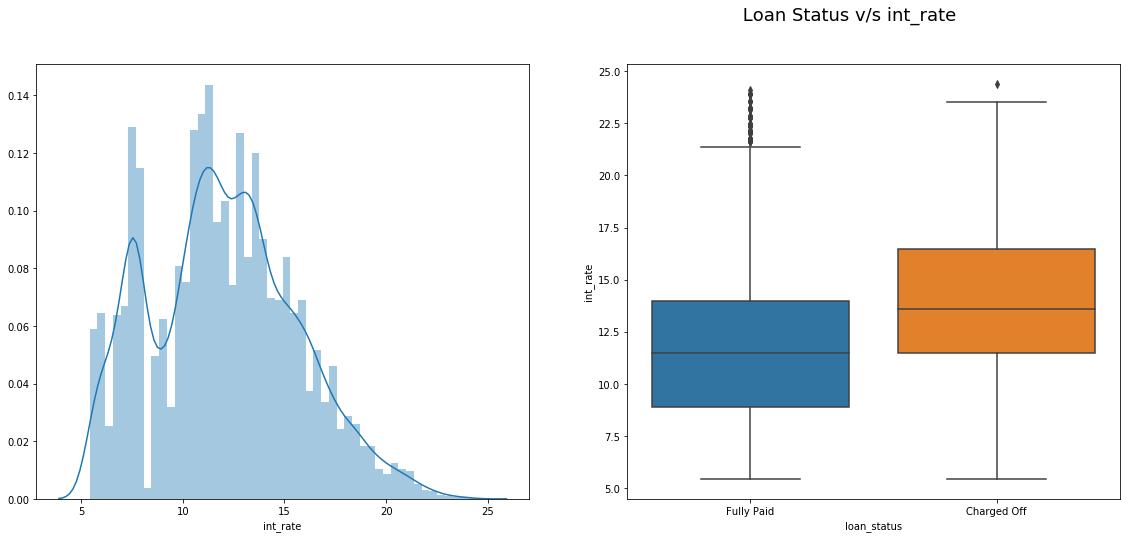

In [55]:
#Check the distribution
plot_loan_status_dist(loan_data,'int_rate')

From above distribution we could see that there are peaks at the interval of 2.5. (Plot 1).

Also we could see from boxplot (plot) that mean of Charged off loans is more inclined towards higher interest rate.

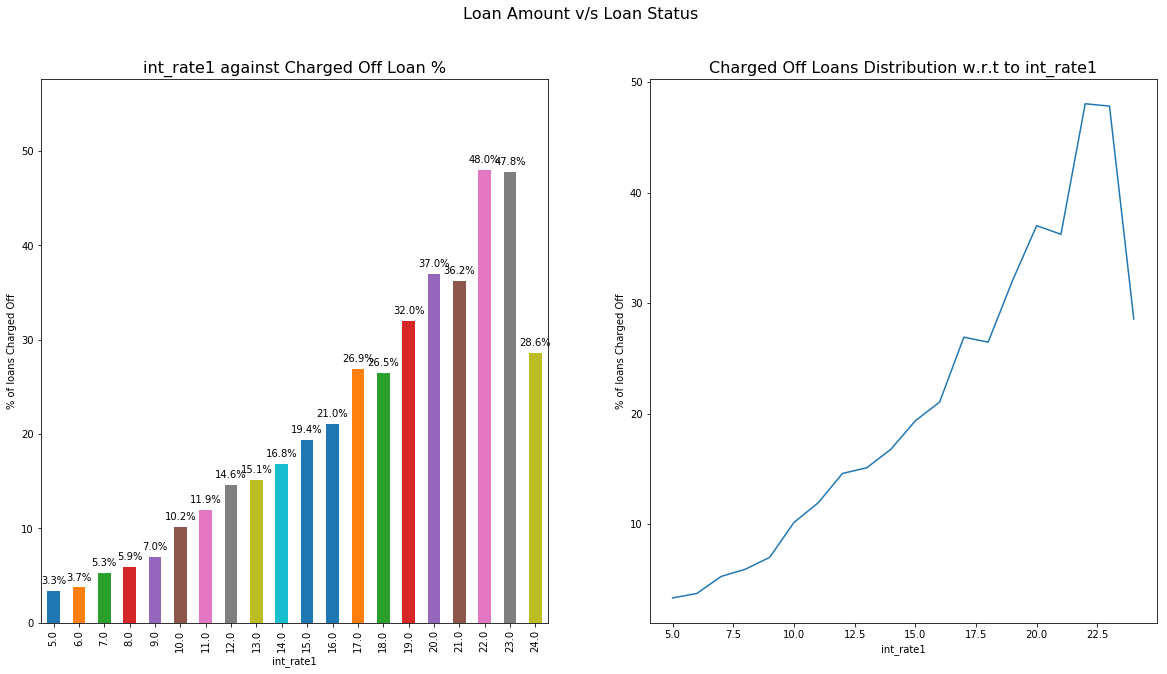

In [56]:
#Since the values of int_rate are in decimal lets round of to nearest values for ease of calculation
loan_data['int_rate1'] = round(loan_data['int_rate'])

#Check the plot data
plotCheckLoanStatus(loan_data,'int_rate1')

### <span style="color:red"> Observation </span>
1) For the higher interest rate the default % (Charged Off %) is more while for less interest rate the Fully Paid percentage is more.

2) Hence we can conclude that **higher the interest rate more is the Charged Off/default percentage**.

3) From the plot above considering the average rate as 17% as calculated above it seems that **loans with interest rate 15% and above are more likely to default or charged off**.

### <span style='color:red'> 3) Variable </span> : <span style='color:blue'> funded_amnt (Funded Amount) </span>

In [57]:
#Check the initial info
loan_data.groupby(['loan_status'])['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,12378.913352,7638.345922,1000.0,6000.0,10625.0,16800.0,35000.0
Fully Paid,21156.0,10966.101815,6890.359424,500.0,6000.0,10000.0,15000.0,35000.0


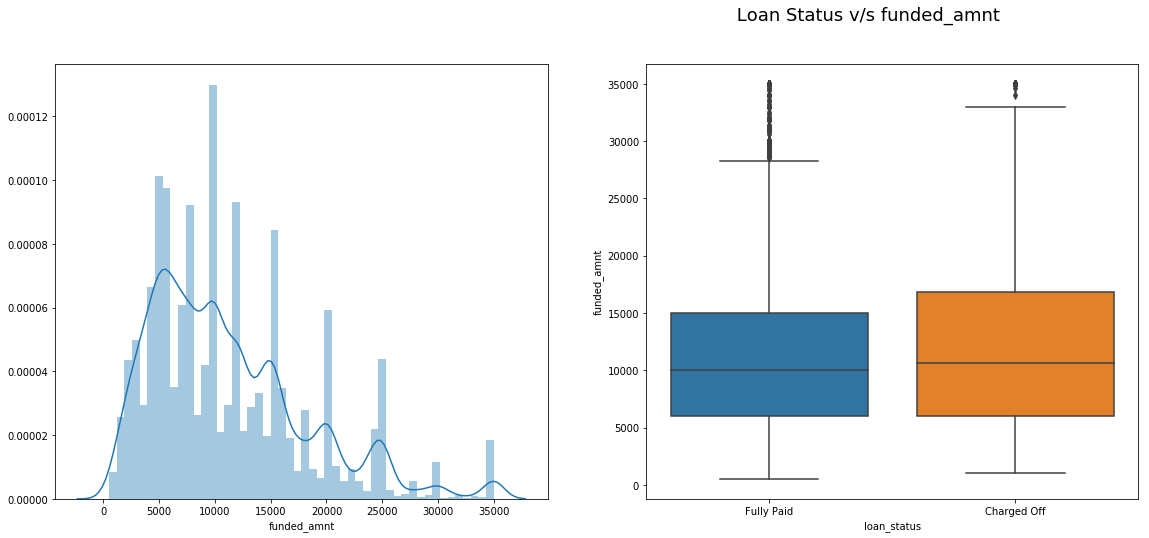

In [58]:
#Plot the distrubition
plot_loan_status_dist(loan_data,'funded_amnt')

From the distribution plot above we can see clear peaks at the interval of 5000. Let's divide the data into bins for furthur analysis. This will also constitute to the 
#### SEGMENTED UNIVARIATE ANALYSIS. ####

In [59]:
#Lets define a method to create bins
#Here df is dataframe, col is column
#low is lowest value and high is highest value
#interval is the bin size
def createBins(df,col,low,high,interval):
    col_bin = pd.cut(df[col], [x for x in range(low, high, interval)], labels=[str(x)+'-'+str(x+interval) for x in range (low, high-interval, interval)])
    return col_bin

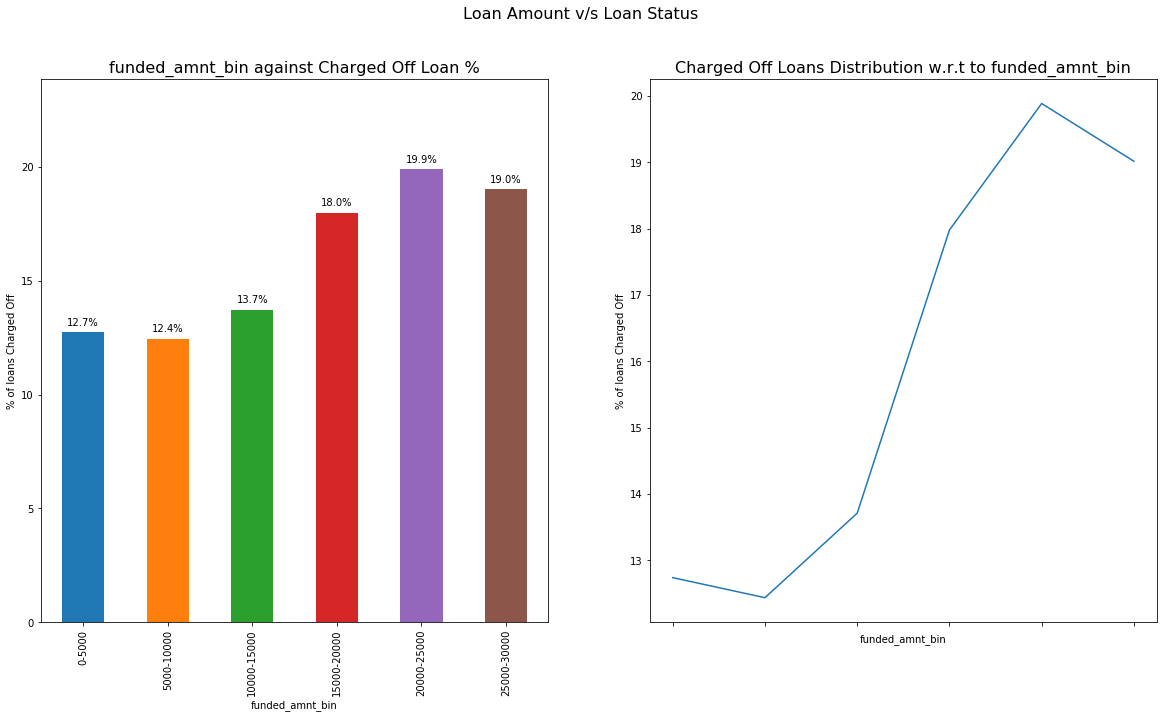

In [60]:
#Create Loan Amount Bins with interval of 5000
loan_data['funded_amnt_bin'] = createBins(loan_data,'funded_amnt',0,35000,5000)

#Check the status of bins
plotCheckLoanStatus(loan_data,'funded_amnt_bin')

### <span style="color:red"> Observation </span>
1) For the higher funded amount the default % (Charged Off %) is more while for less funded amount the Fully Paid percentage is more.

2) Hence we can conclude that **higher the funded amount more is the Charged Off/default percentage**.

3) From the plot above considering the average rate as 17% as calculated earlier it seems that **funded amount of 20 and above are more likely to default or charged off**.

### <span style='color:red'> 4) Variable </span> : <span style='color:blue'> funded_amnt_inv (Funded Amount by Investor) </span>

In [61]:
#Check initial info
print('Funded Amount By Investor Info')
loan_data.groupby(['loan_status'])['funded_amnt_inv'].describe()

print('Funded Amount Info')
loan_data.groupby(['loan_status'])['funded_amnt'].describe()

Funded Amount By Investor Info


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,11486.500667,7582.937409,0.0,5475.0,9975.000000,15853.8875,35000.0
Fully Paid,21156.0,10443.649502,6833.322683,0.0,5175.0,9078.587982,14250.0000,35000.0


Funded Amount Info


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,12378.913352,7638.345922,1000.0,6000.0,10625.0,16800.0,35000.0
Fully Paid,21156.0,10966.101815,6890.359424,500.0,6000.0,10000.0,15000.0,35000.0


The mean and standard deviation along with quartile percentages for funded_amnt and funded_amnt_inv is almost similar with very little variance so we can assume that observations for funded_amnt are valid for funded_amnt_inv.

### <span style="color:red"> Observation </span>
**The mean and standard deviation along with quartile percentages for funded_amnt and funded_amnt_inv is almost similar with very little variance so we can assume that observations for funded_amnt are valid for funded_amnt_inv.**

### <span style='color:red'> 5) Variable </span> : <span style='color:blue'> Term (Loan Term)</span>

In [62]:
#Check the basic info
loan_data.groupby(['loan_status'])['term'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,46.500000,11.907572,36.0,36.0,36.0,60.0,60.0
Fully Paid,21156.0,41.112876,9.827110,36.0,36.0,36.0,36.0,60.0


Now lets check the number of status of loans for term they are issued

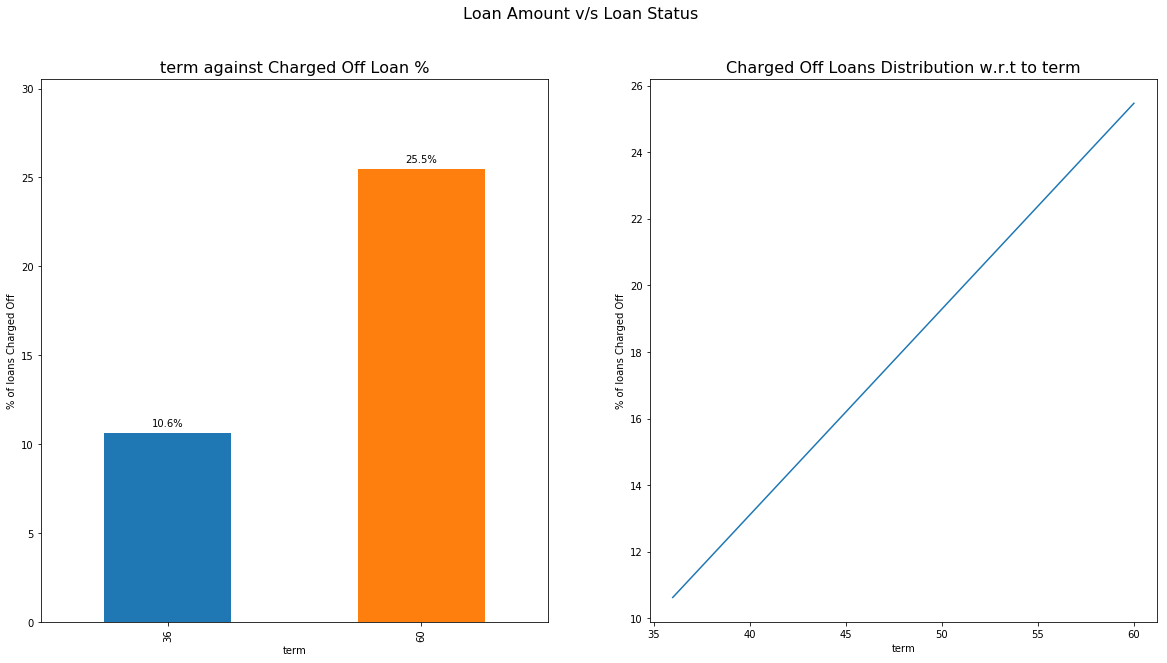

In [63]:
#Check Status of Loan for term issued
plotCheckLoanStatus(loan_data,'term')

From the observation above its clear that longer term loans are more likely to default than shorter term loans.
But this again has some implications, what if less number of loans were approved for shorter term as against more number of loans for longer terms. That can affect the % calculation. Lets check the number of loans approved for the term.

Text(0.5, 1.0, 'Number of loans approved')

Text(0.5, 0, 'Loan Term')

Text(0, 0.5, 'Number of Loans Approved')

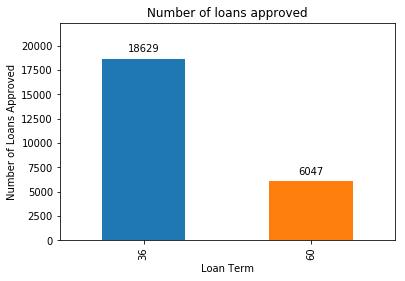

In [64]:
#Count of total loans approved
plt.title('Number of loans approved')
ax = loan_data['term'].value_counts().sort_index().plot.bar()
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans Approved')
showBarLabels(ax)

From the plot above its clear that more loans were approved for 36 months as opposed to 60 months.

### <span style="color:red"> Observation </span>
1) Number of loans applied and approved for 36 months or 3 years is more than number of loans applied and approved for 60 months or 5 years.

2) According to the plots above it seems that 25% loans were Charged Off for the loans where term was 60 or 5 years while only 10.5% loans were charged off for loan term 36 or 3 years.

3) So from the observation above its clear that longer term loans are more likely to default than shorter term loans.

### <span style='color:red'> 6) Variable </span> : <span style='color:blue'> Installment (Loan Installment)</span>

In [65]:
#Check tha basic info first
loan_data.groupby('loan_status')['installment'].describe()
loan_data['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,353.959648,214.372101,24.32,190.63,313.905,479.015,1302.69
Fully Paid,21156.0,331.591661,206.048524,16.08,175.77,291.470,438.710,1288.10


count    24676.000000
mean       334.782426
std        207.399445
min         16.080000
25%        178.037500
50%        295.260000
75%        445.130000
max       1302.690000
Name: installment, dtype: float64

Check the loan status as agianst the installment amount.

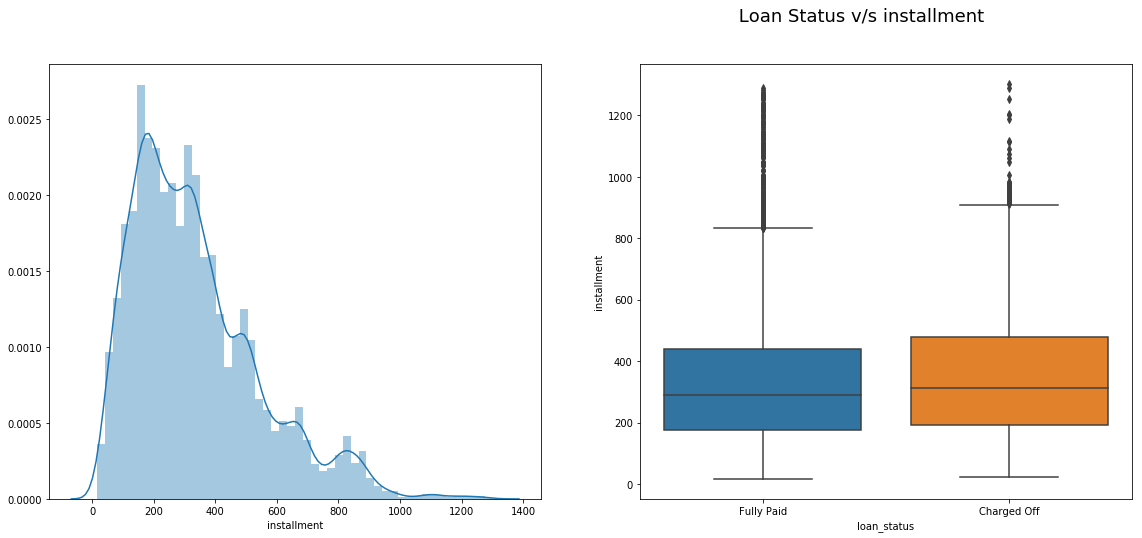

In [66]:
#Plot distribution
plot_loan_status_dist(loan_data,'installment')

From plot 2 above it seems that Charged Off mean is bit inclined towards the higher installment values. Lets analyze this furthur. 

For this lets create installment amount bins and check there status against the loan status just to check which values are more inclined to be defaulted. This is part of 
#### SEGMENTED UNIVARIATE ANALYSIS ####

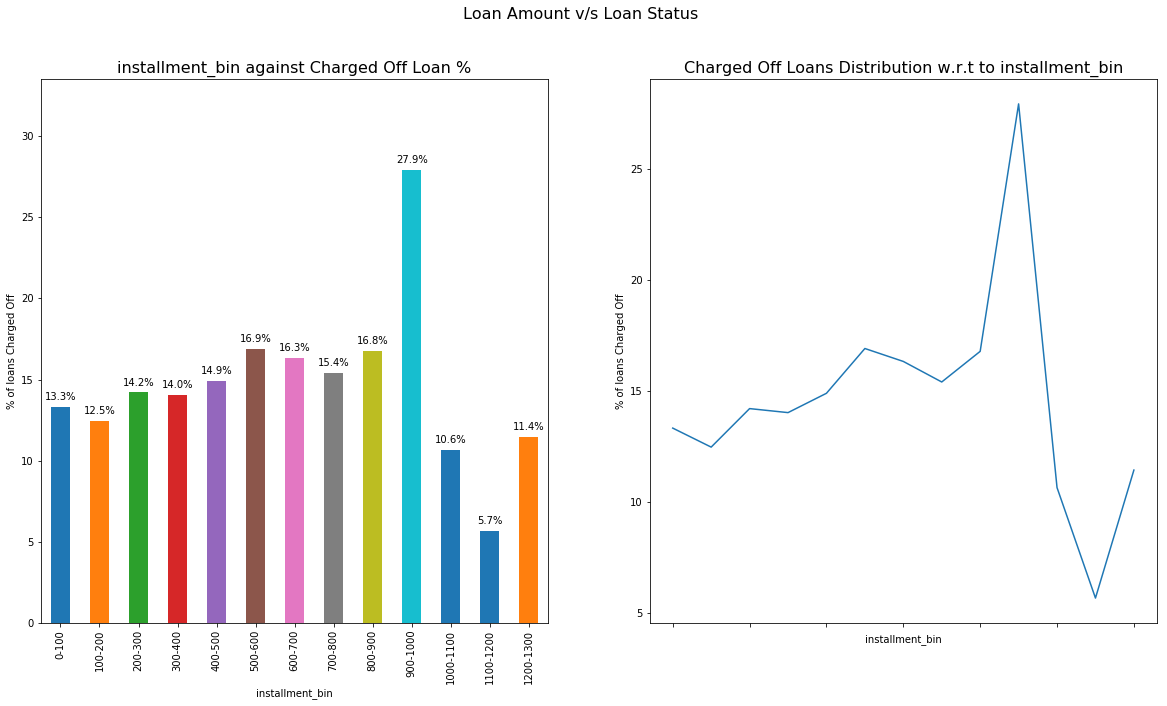

In [67]:
#Create Loan Amount Bins with interval of 100
loan_data['installment_bin'] = createBins(loan_data,'installment',0,1400,100)

plotCheckLoanStatus(loan_data,'installment_bin')

The above chart contradicts to our earlier assumption since it looks like lower installment amounts are more inclined to be defaulted. But thats not true since higher installment should be highly inclined to be charged off. One reason could be the amount of loans approved for these values. If the number of loans for which the installments are less are more approved, its true that the default rate should increase with it.

So lets check the total amount of loans approved for installment amounts (bins created earlier) in the dataset as against the number of charged off/defaulted loans in dataset. 

This is common thing we will require in futhur variable analysis too. So lets define a function and check.

In [68]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plotTotalDataPercent(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    #Plot the total count in the dataset
    values = (loan_data[col].value_counts(normalize=True)*100).sort_index()
    ax1 = values.plot.bar()
    ax1.set_ylabel('Total % in dataset', fontsize=16)
    ax1.set_xlabel(col, fontsize=12)
    showBarLabels(ax1)
    plt.subplot(1, 2, 2)
    #Plot only the charged off % from total dataset
    values = (loan_data.loc[loan_data['loan_status']=='Charged Off'][col].value_counts(normalize=True)*100).sort_index()
    ax2 = values.plot.bar()
    ax2.set_xlabel(col, fontsize=12)
    ax2.set_ylabel('% in Charged Off loans', fontsize=12)
    showBarLabels(ax2)

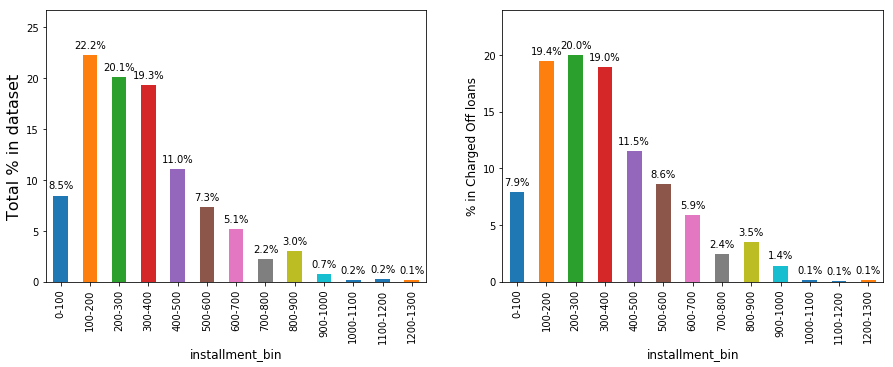

In [69]:
plotTotalDataPercent(loan_data,'installment_bin')

As seen from the plots above maximum loans are approved with lower installment amount and hence the charge off rate is plotted as high. But if we check the ratio of approved loans to the charged off loans for the installment amount it is clear that higher installment amounts are more likely to be charged off or defaulted.

### <span style="color:red"> Observation </span>

Though the variance between charged off and fully paid loans for installment amount is very less following are the things we observed:

1) Number of loans approved where the installment amount is low are more as compared to number of loans where installment amount is high.

2) Installment with higher amount are more likely to default than installment with lower amount.

3) The installment default will also be based on annual income we will keep this for our bivariate analysis part.

### <span style='color:red'> 7) Variable </span> : <span style='color:blue'> emp_length (Employment Length)</span>

In [70]:
#Check the basic info
loan_data.groupby(['loan_status'])['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,5.034091,3.617076,0.0,2.0,4.0,9.0,10.0
Fully Paid,21156.0,4.791974,3.538354,0.0,2.0,4.0,8.0,10.0


There is very less difference between the standard deviation and mean of the Charged Off and Fully Paid loans based on the emplyment length suggesting there is no co-relation between loan_status and emp_length. 

But lets verify with some visualizations.

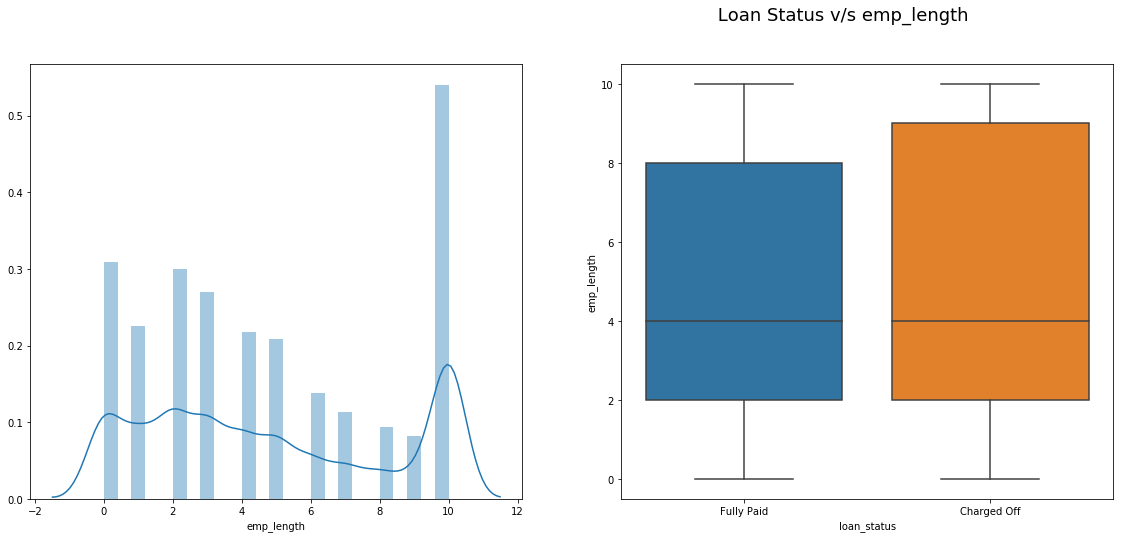

In [71]:
plot_loan_status_dist(loan_data,'emp_length')

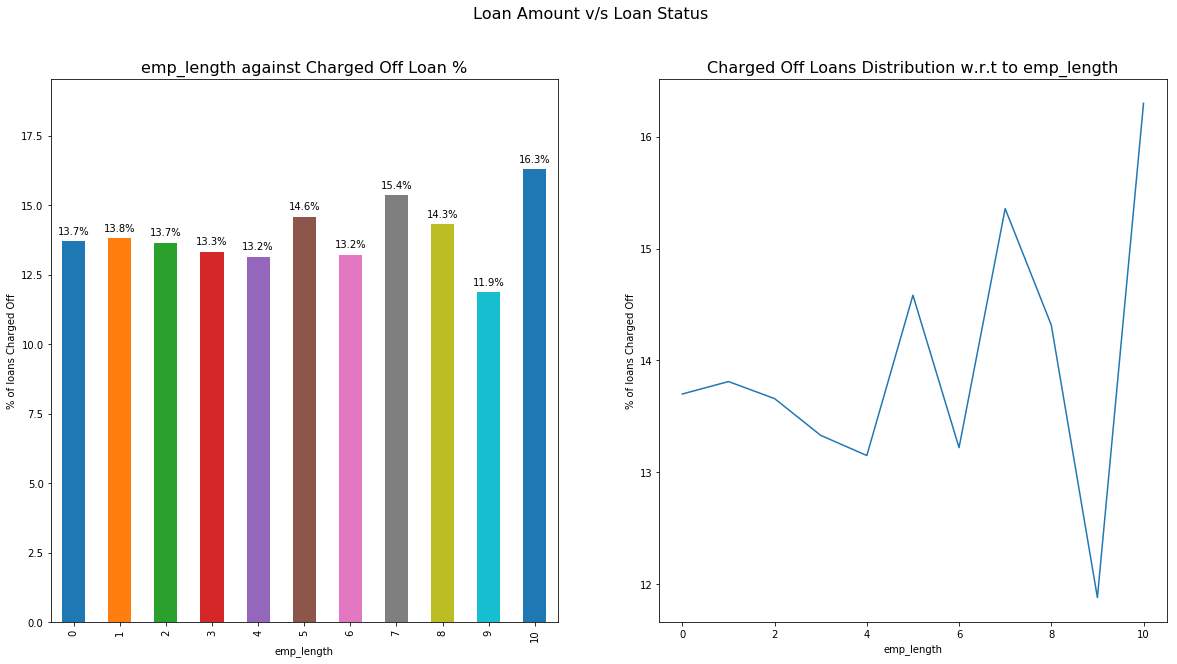

In [72]:
plotCheckLoanStatus(loan_data,'emp_length')

Seems all the default values % lie between ~13% to ~15%. No one seems to be crossing the 17% default rate as calculated earlier. There doesnt seem to be much correlation. But still lets verify the default rate in terms of actual % for whole dataset just to verify that loans are not concentrated on any single value or so.

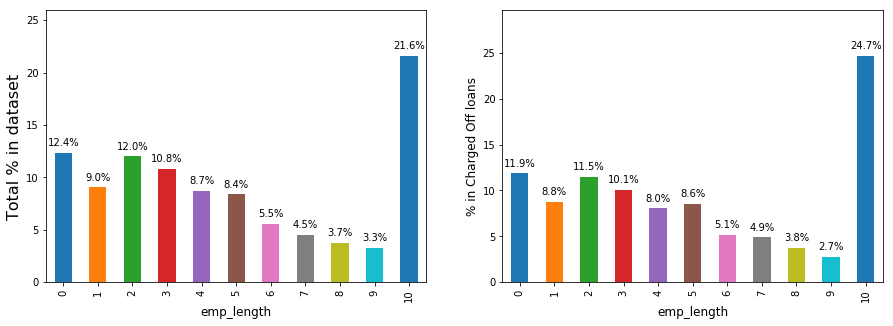

In [73]:
plotTotalDataPercent(loan_data,'emp_length')

As seen from the plot above there is little to no significance of the employment length on loan default.


### <span style="color:red"> Observation </span>

1) There are ~22% loans approved where the loan applicant has employment length of 10 years or more.

2) There is **little to no significance of employment length over the loan default**. We will analyzie this furthur in Bivariate analysis too.

### <span style='color:red'> 8) Variable </span> : <span style='color:blue'> annual_inc (Annual Income)</span>

In [74]:
#Check the basic info
loan_data.groupby(['loan_status'])['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,63931.453463,44288.878234,4080.0,39000.0,54900.5,75000.0,700053.85
Fully Paid,21156.0,70354.392338,60244.351681,4000.0,42000.0,60000.0,84996.0,3900000.00


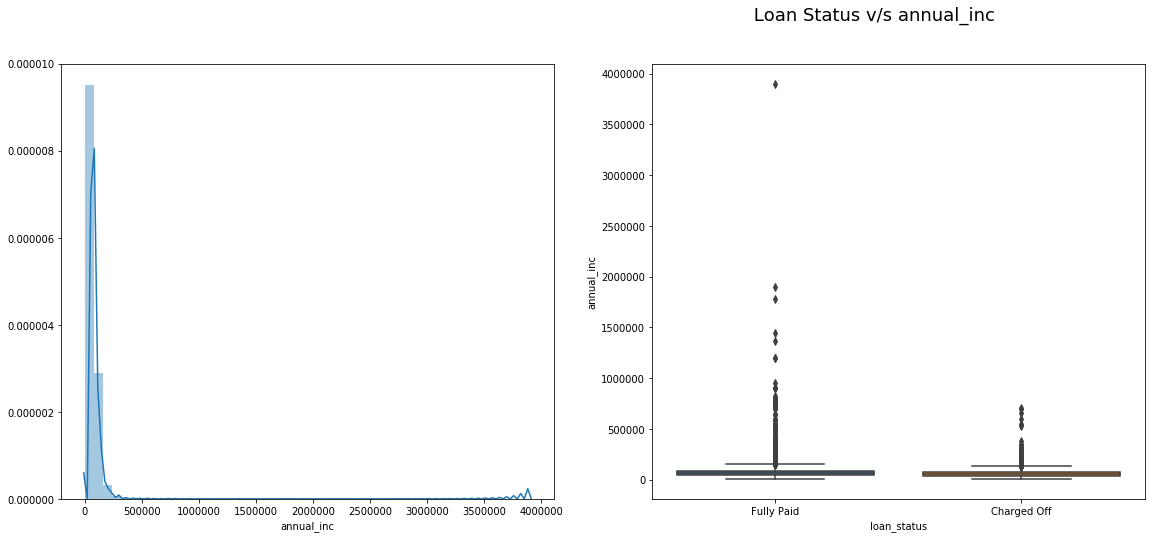

In [75]:
plot_loan_status_dist(loan_data,'annual_inc')

From the above plots we can see that data is consolidated to one particular region. There are clearly outliers in the data. We will need to remove these outliers because they will mess up the mean and variance values thereby messing our analysis.

Lets check what's the annual income of the loan applicants is like in the dataset.

Text(0.5, 1.0, 'Annual Income of Loan Applicants')

Text(0.5, 0, 'Member ID')

Text(0, 0.5, 'Annual Income')

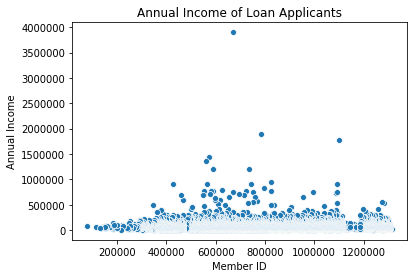

In [76]:
#Plot to show annual income of members/loan applicants
plt.title('Annual Income of Loan Applicants')
ax = sns.scatterplot(x="member_id", y="annual_inc", data=loan_data)
plt.xlabel('Member ID')
plt.ylabel('Annual Income')

From above plot its clear that there are clearly 2 outliers whose annual income is 400K and above while most of the data is concentrated in the range below 200K. We will need to get rid of these outliers

In [77]:
#Define a method to remove the outliers
#Stackoverflow: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame 
def removeOutliers(df,col,z):
    # keep only the ones that are within +z to -z standard deviations in the column 'Data'.
    #This is as per z value calculations of normal distribution
    #Based on the z value specified the analysis can range from +/-1 to +/-3
    df1 = df[np.abs(df[col] - df[col].mean()) <= (z * df[col].std())]
    return df1

In [78]:
loan_data.annual_inc.describe()

count    2.467600e+04
mean     6.943817e+04
std      5.827879e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300400e+04
max      3.900000e+06
Name: annual_inc, dtype: float64

In [79]:
#Here tried with values 1,2 and 3 for z-value
#And 2 seems optimal since for 1 and 3 either non-outliers values were dropped 
#or outlier values were considered respectively
outlier_loan_data = removeOutliers(loan_data,'annual_inc',2)
outlier_loan_data.annual_inc.describe()

count     24174.000000
mean      64603.028956
std       31853.786582
min        4000.000000
25%       41004.000000
50%       59000.000000
75%       80000.000000
max      185004.000000
Name: annual_inc, dtype: float64

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution for Annual Income with z = 2')

([<matplotlib.axis.XTick at 0x2bce45868d0>,
 <a list of 18 Text xticklabel objects>)

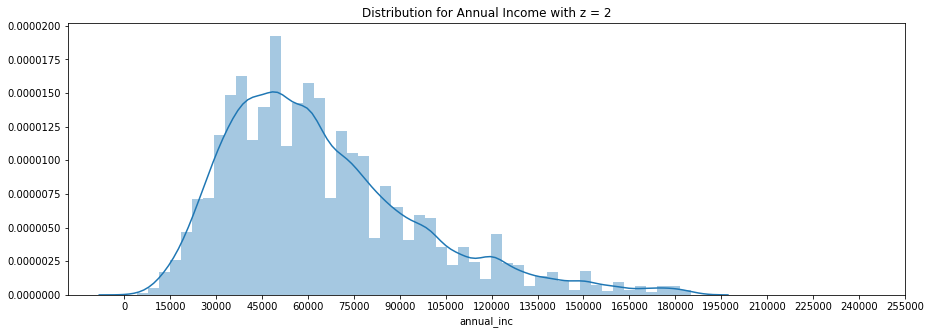

In [80]:
plt.figure(figsize=(15, 5))
plt.title('Distribution for Annual Income with z = 2')
sns.distplot(outlier_loan_data['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 15000))
plt.show()

From above plot 15000 seems like good measure for bin creation.

In [81]:
#create the bins
loan_data['annual_inc_bin'] = createBins(loan_data,'annual_inc',0,210000,15000)

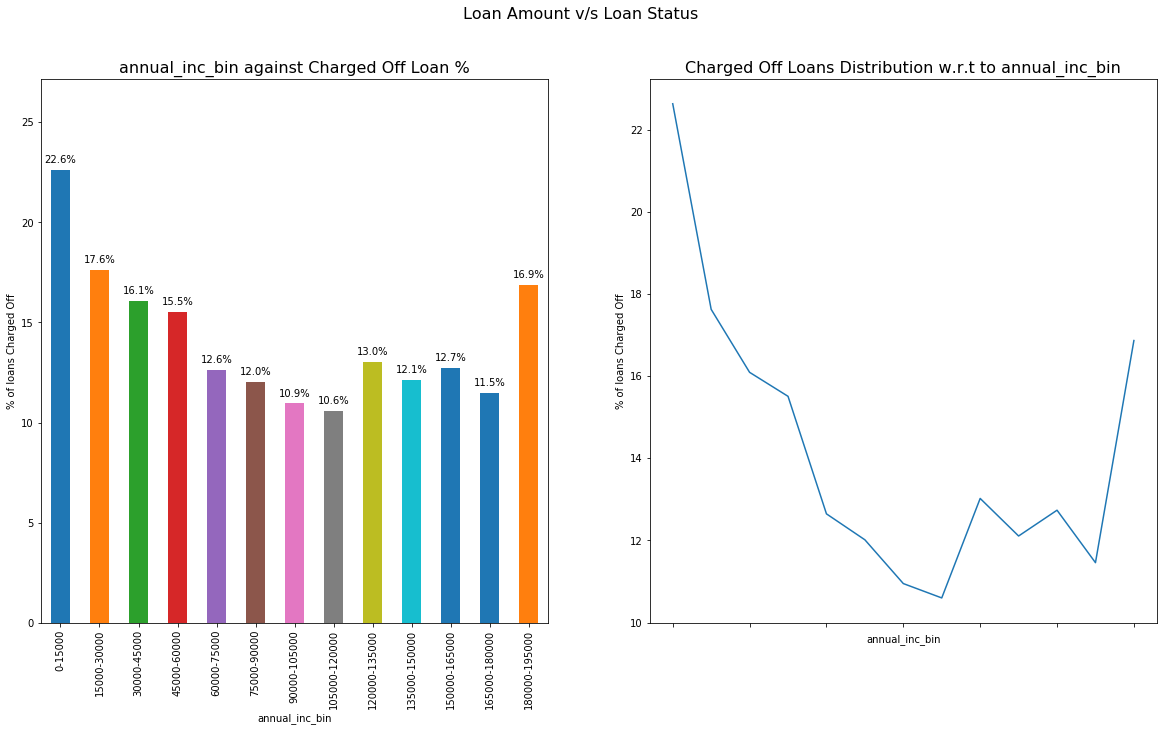

In [82]:
plotCheckLoanStatus(loan_data,'annual_inc_bin')

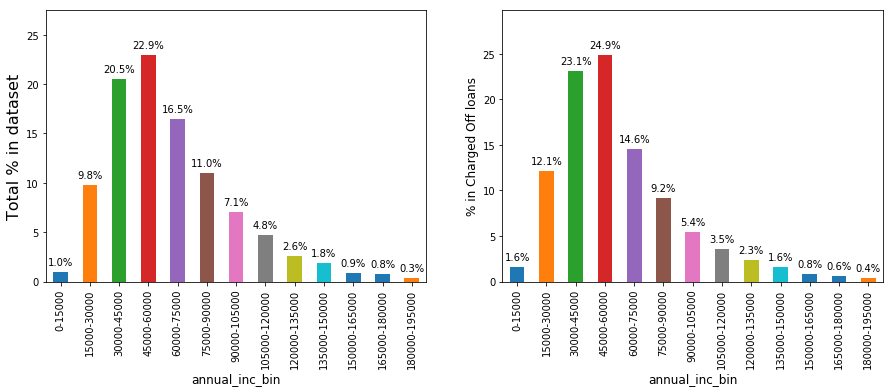

In [83]:
plotTotalDataPercent(loan_data,'annual_inc_bin')

From the above plots is clear that the chances of default are high if the annual income is less (less than 45-60K)

### <span style="color:red"> Observation </span>

1) There are few outliers in the dataset with annual income greater than 200K.

2) Most of the loan applicants have annual income less than 200K.

3) The chances to **default are high if the annual income is low.**

4) Considering the average default rate as 17% as calculated earlier the **loan applicants with annual income less than 60K are more likely to default.**

### <span style='color:red'> 9) Variable </span> : <span style='color:blue'> dti (monthly debt payments / monthly income.)</span> 

In [84]:
#Check basic info
loan_data.dti.describe()

count    24676.000000
mean        13.357686
std          6.636713
min          0.000000
25%          8.270000
50%         13.500000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [85]:
loan_data.groupby(['loan_status']).dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,14.065364,6.559222,0.0,9.1275,14.42,19.2800,29.85
Fully Paid,21156.0,13.239941,6.642360,0.0,8.1300,13.33,18.4625,29.99


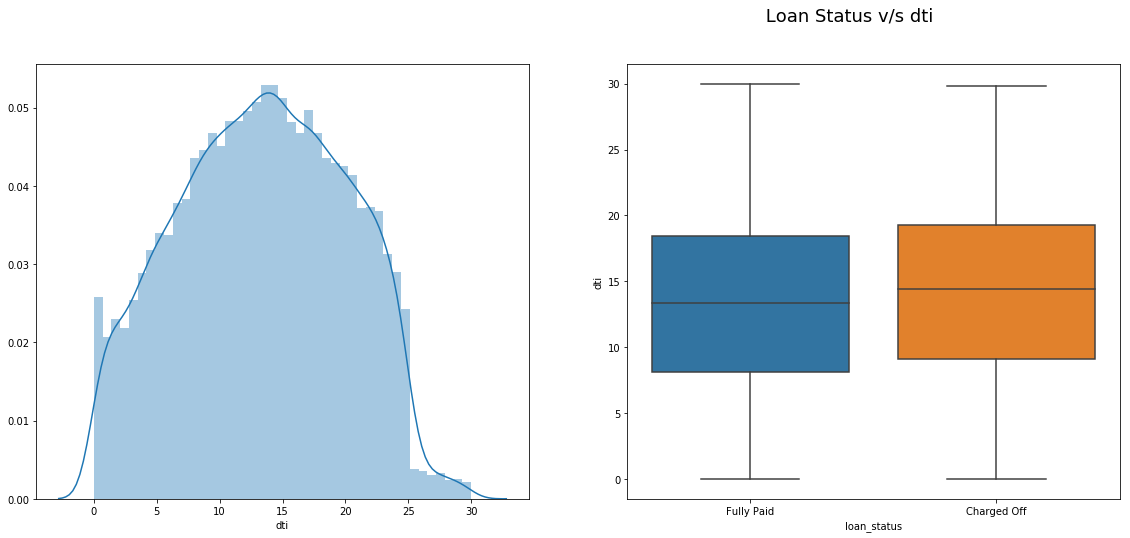

In [86]:
plot_loan_status_dist(loan_data,'dti')

From initial analysis it seems that most of the data is concentrated in between 0 to 30. We can create the bins of interval 5 to furthur analyze the data.

From boxplot it seems that higher the dti higher are the chances of loan to default/charged off.

Lets analyze this furthur by dividing the data into bins to get exact dti measures.

In [87]:
#Create bins of interval 5
loan_data['dti_bin'] = pd.cut(loan_data['dti'], 
                              [x for x in range(0, 30, 5)], labels=[str(x)+'-'+str(x+5) for x in range (0, 25, 5)])

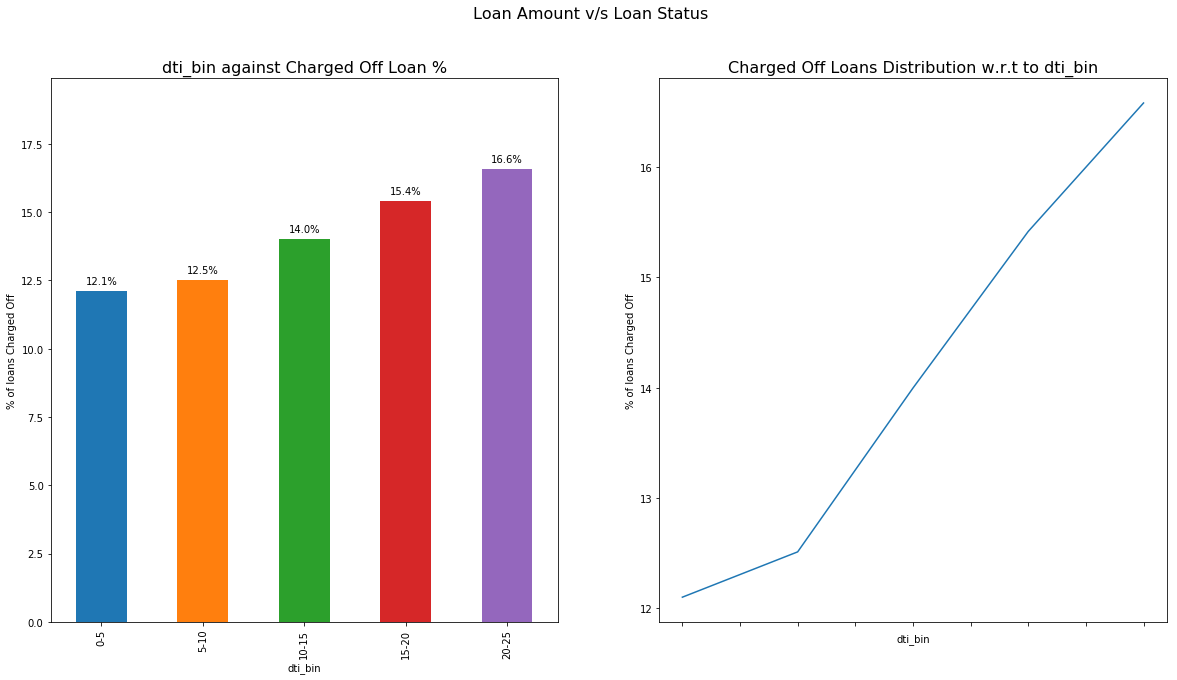

In [88]:
plotCheckLoanStatus(loan_data,'dti_bin')

As seen from the above plots the default rate linearly increases with the increase in dti. Its lowest for 0-5 and highest for 20-25. So we can safely assume that higher the dti higher are the changes to default.

### <span style="color:red"> Observation </span>

1) Most of the dti values for applcants lie between 0 - 30.

2) Loan applicants with **low dti have low chances to default** while the loan applicants with **higher dti has higher chances to default.**

### <span style='color:red'> 10) Variable </span> : <span style='color:blue'> delinq_2yrs (30+ days past-due incidences of delinquency  in past 2 years)</span> 

In [89]:
#Check basic info
loan_data.delinq_2yrs.describe()

count    24676.000000
mean         0.141068
std          0.472890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [90]:
#Check basic info
loan_data.groupby(['loan_status']).delinq_2yrs.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,0.151420,0.480448,0.0,0.0,0.0,0.0,6.0
Fully Paid,21156.0,0.139346,0.471610,0.0,0.0,0.0,0.0,11.0


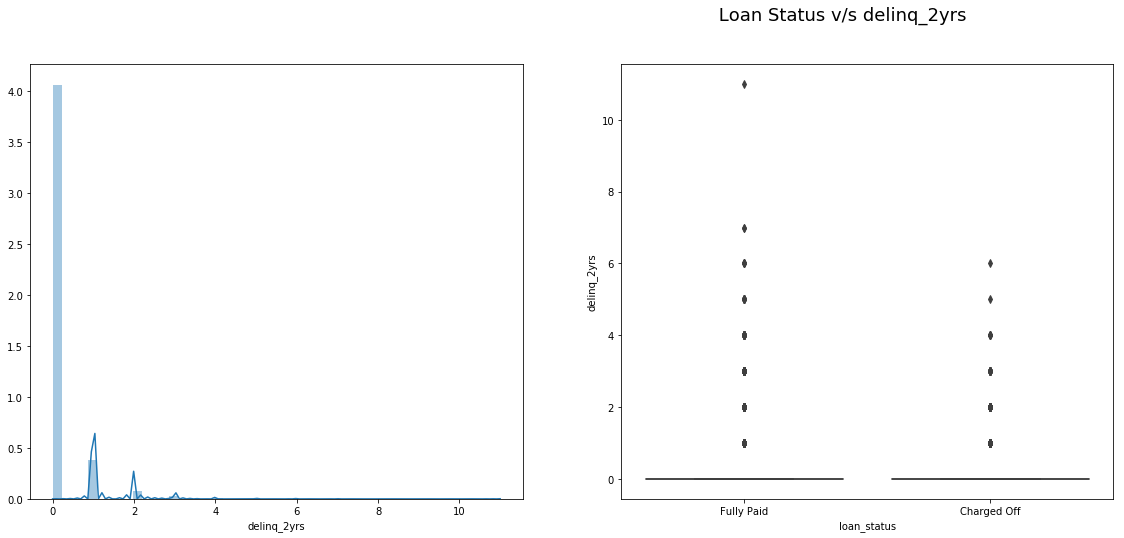

In [91]:
plot_loan_status_dist(loan_data,'delinq_2yrs')

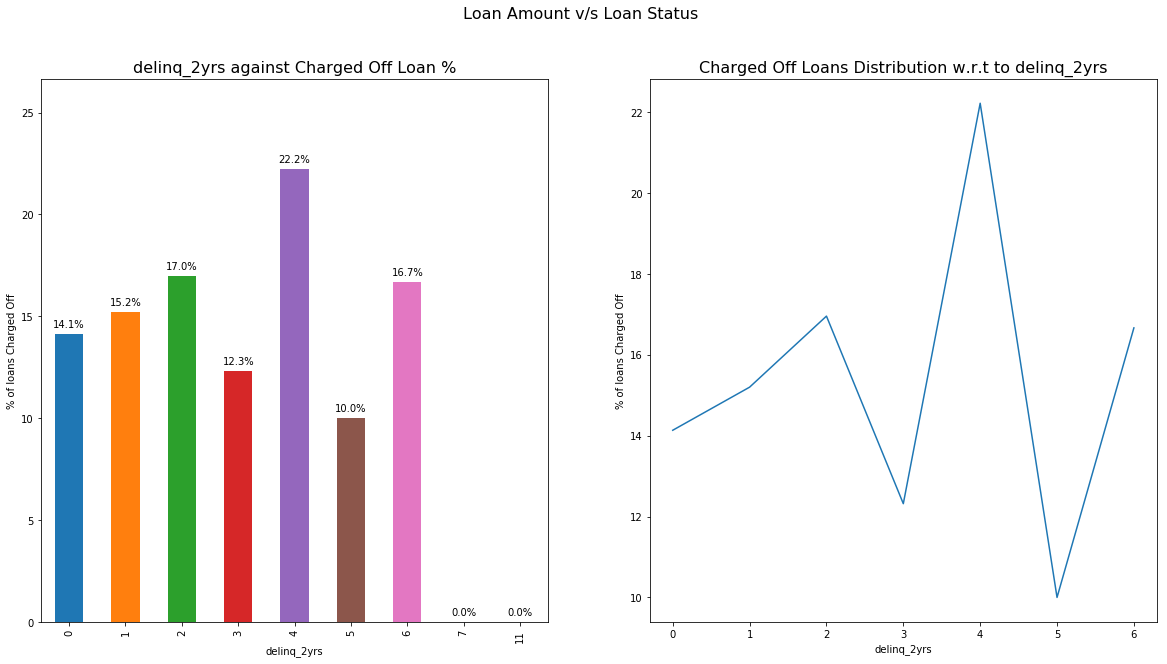

In [92]:
plotCheckLoanStatus(loan_data,'delinq_2yrs')

From the above plots it seems that data is scatterred uniformly across the dataset for delinq_2yrs. Although it seems that for higher delinq_2yrs the rate of default is high (as in case of 4) but it doesnt hold true for few values.

e.g: For 5 the default rate is 10% while for 2 is 17%. We will hold are analysis for this variable for now and see if this can be explored more in bivariate analysis.

### <span style="color:red"> Observation </span>

1) delinq_2yrs values vary in between 0 -11.

2) Although it seems that for higher delinq_2yrs the rate of default is high (as in case of 4) but it doesnt hold true for few values.

e.g: For 5 the default rate is 10% while for 2 is 17%. We will hold are analysis for this variable for now and see if this can be explored more in bivariate analysis.

### <span style='color:red'> 11) Variable </span> : <span style='color:blue'> inq_last_6mths (number of inquiries in past 6 months)</span> 

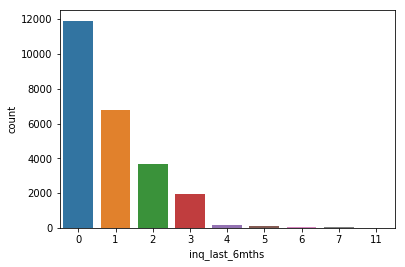

In [93]:
sns.countplot(loan_data['inq_last_6mths'], order=sorted(loan_data.delinq_2yrs.unique()))

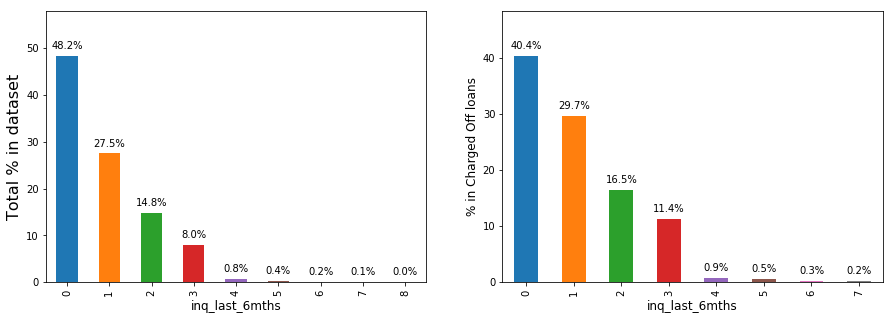

In [94]:
plotTotalDataPercent(loan_data,'inq_last_6mths')

From above plot its clear that there are many loan approvals without any verification (inq_last_6mth = 0) and this constitutes to about ~47% of the total loans in the dataset.

From the visualizations it seems that there isnt much significance of the inq_last_6mth variable on the loan default although it seems that the loans with no inquiries are more prone to default but the data is scatterred almost uniformaly across the dataset.

So for now we will hold on the analysis of inq_last_6mth variable and assume that it doesnt have nay effect on the loan default.

### <span style="color:red"> Observation </span>

1) Loan approvals without any verification (inq_last_6mth = 0) constitutes to about ~47% of the total loans in the dataset.

2) From inital analysis it seems that there isnt much significance of the inq_last_6mth variable on the loan default although it seems that the loans with no inquiries are more prone to default but the data is scatterred almost uniformaly across the dataset.

3) So for now we will hold on the analysis of inq_last_6mth variable and **assume that it doesnt have any effect on the loan default.**

### <span style='color:red'> 12) Variable </span> : <span style='color:blue'> open_acc (number of open credit lines)</span> 

In [95]:
loan_data.open_acc.describe()

count    24676.000000
mean         9.366956
std          4.347612
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [96]:
loan_data.groupby(['loan_status'])['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,9.416477,4.503084,2.0,6.0,9.0,12.0,38.0
Fully Paid,21156.0,9.358716,4.321256,2.0,6.0,9.0,12.0,44.0


From initial analysis there doesnt seem much difference in mean and standard deviation to the Charged Off and Fully Paid loans for the open_acc data in the dataset suggesting little to no significance in the loan default.

Lets analyze it a bit visually.

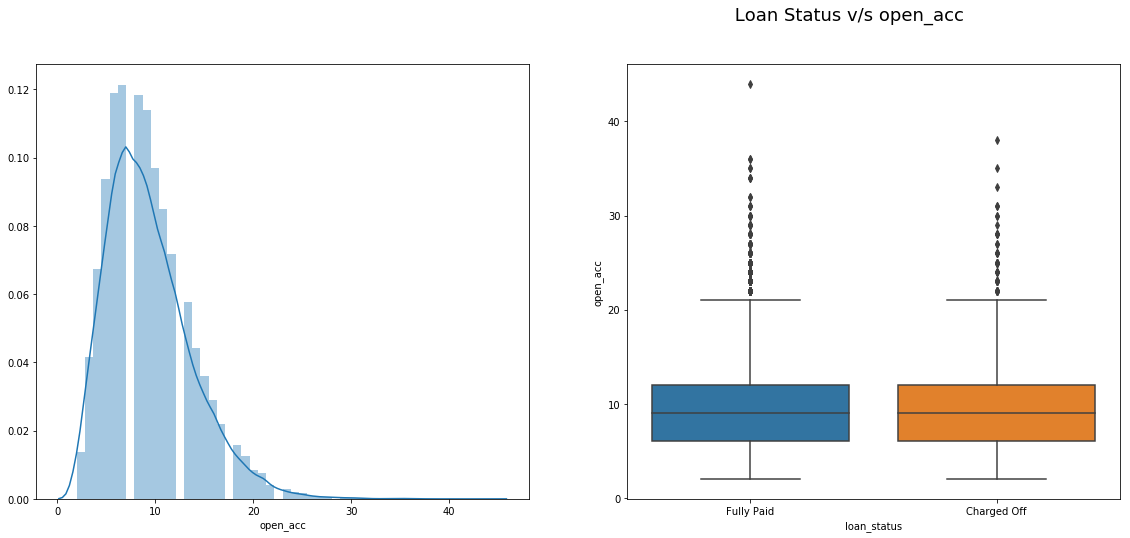

In [97]:
plot_loan_status_dist(loan_data,'open_acc')

### <span style="color:red"> Observation </span>

The distrubution plot is uniform while the box plot for the fully paid and charged off loans data is almost similar suggesting no significance of open_acc variable on loan default.

### <span style='color:red'> 13) Variable </span> : <span style='color:blue'> pub_rec (Number of derogatory public records) </span> 

In [98]:
loan_data.pub_rec.describe()

count    24676.000000
mean         0.055074
std          0.236674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: pub_rec, dtype: float64

In [99]:
loan_data.groupby(['loan_status'])['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,0.084091,0.283640,0.0,0.0,0.0,0.0,2.0
Fully Paid,21156.0,0.050246,0.227571,0.0,0.0,0.0,0.0,3.0


There seems slight variation in the mean and standard deviation values for charged off and fully paid loans for pub_rec data. Lets analyze it furthur.

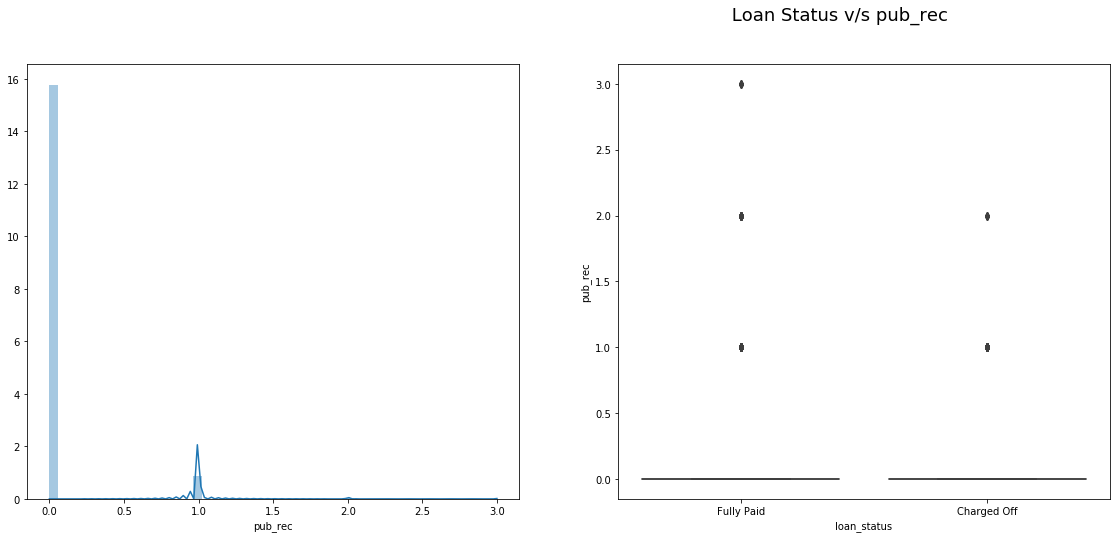

In [100]:
plot_loan_status_dist(loan_data,'pub_rec')

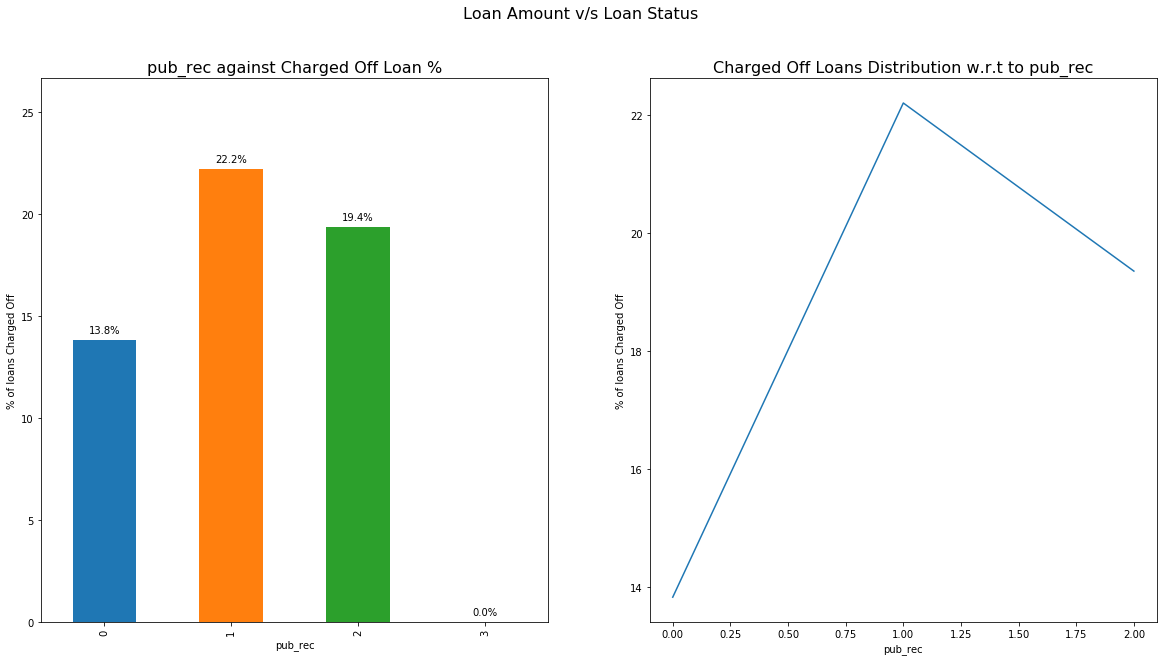

In [101]:
plotCheckLoanStatus(loan_data,'pub_rec')

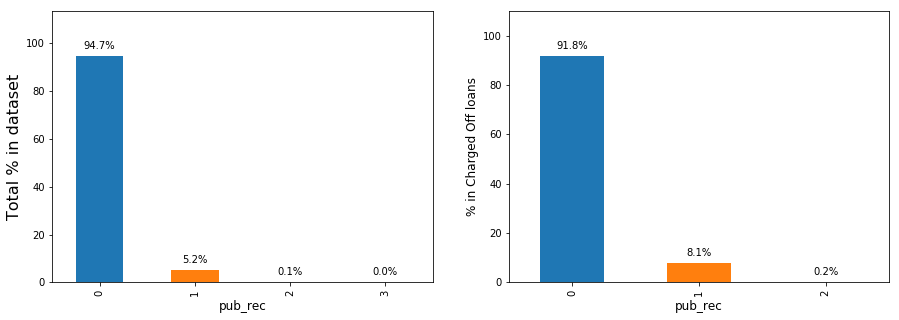

In [102]:
plotTotalDataPercent(loan_data,'pub_rec')

From the observation it seems there are almost ~95% who have 0 record of derogatory public records. With 5.2% people having 1 record and 0.1% having 2 records. If compare the plots it seems that even with 1 derogatory public record the chances of charged off increases exponentially.
As seen from the plot  pub_rec v/s charged off %, 5.3% (5.2 with 1 record  + 0.1 with 2 records) people having 1 or more than 1 derogatory public record(s) have > 20% chances of defaulting.

### <span style="color:red"> Observation </span>

1) ~95% poeple have 0 derogatory public record rest ~5% people have 1 or more derogatory public records.

2) With even 1 derogatory public record the chances of defaulting loan increases significantly. **So we could say that having atleast 1 derogatory public record is strong indication of defaulting on loan**

### <span style='color:red'> 14) Variable </span> : <span style='color:blue'> revol_bal (Total credit revolving balance) </span> 

In [103]:
#Check the basic info
loan_data.revol_bal.describe()

count     24676.000000
mean      13583.920044
std       15833.227164
min           0.000000
25%        3881.750000
50%        9100.000000
75%       17291.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [104]:
loan_data.groupby(['loan_status'])['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,14093.059943,15534.157375,0.0,4357.75,9774.0,17868.00,141165.0
Fully Paid,21156.0,13499.207790,15881.218457,0.0,3803.00,8999.0,17150.75,149588.0


From the initial analysis there doesn't seem any significant difference in the mean and standard deviation between the charged off and fully paid loans indicating no significance of the variable in loan default.

Still lets visualize it to confirm.

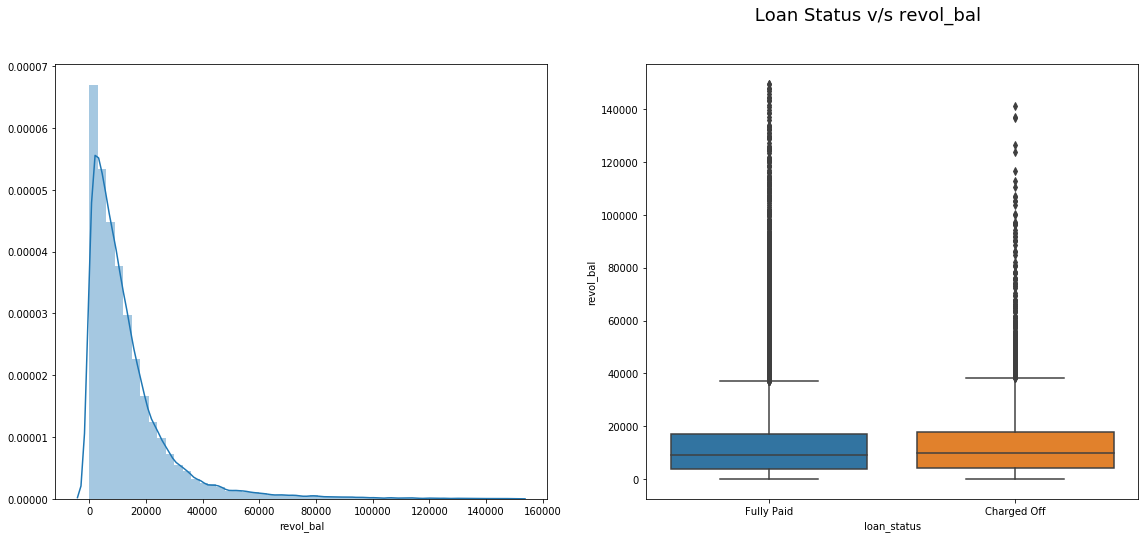

In [105]:
plot_loan_status_dist(loan_data,'revol_bal')

The plot shows uniform distribution of the values for revol_bal indicating no significance on loan default.

### <span style="color:red"> Observation </span>

There is little to no difference in the mean and standard deviation for the charged off and fully paid loans for revol_bal variable indicating no significance of this variable for deciding the loan default.

### <span style='color:red'> 15) Variable </span> : <span style='color:blue'> revol_util (amount of credit the borrower is using relative to all available revolving credit.) </span> 

In [106]:
#Check the initial info
loan_data.revol_util.describe()

count    24676.000000
mean        48.758120
std         28.184721
min          0.000000
25%         25.500000
50%         49.100000
75%         72.000000
max         99.900000
Name: revol_util, dtype: float64

In [107]:
loan_data.groupby(['loan_status'])['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3520.0,55.352315,27.643596,0.0,34.4,58.1,78.525,99.9
Fully Paid,21156.0,47.660958,28.124762,0.0,24.2,47.6,70.700,99.9


There is significant difference in the mean and variance lets analyze this furthur

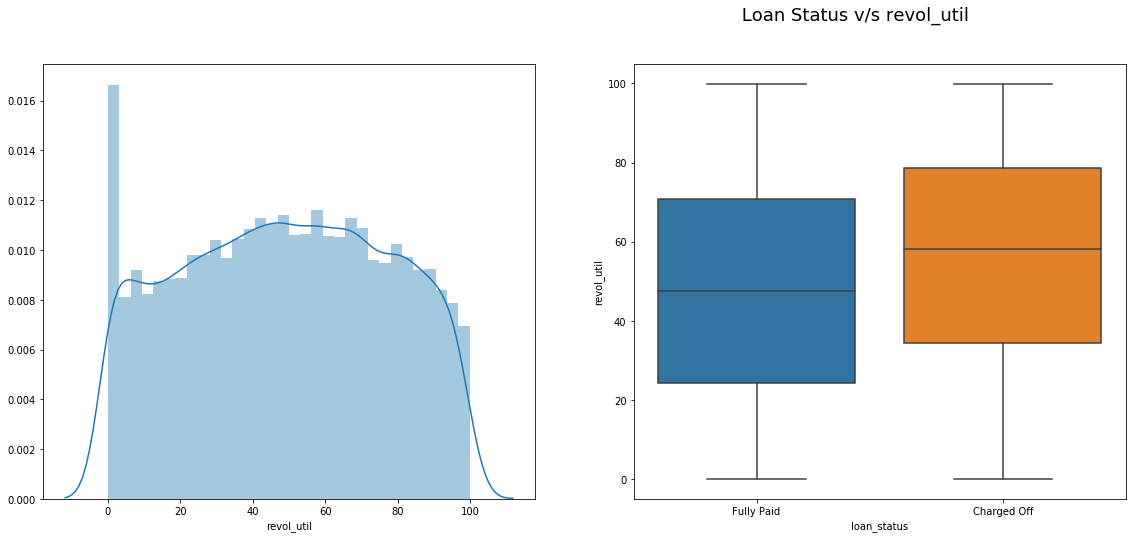

In [108]:
plot_loan_status_dist(loan_data,'revol_util')

From the plot above it seems that loan applicants with higher revol_util rate are more prone to loan default. Lets analyze this furthur and check what revol_util rate are more prone to loan default.

From above distribtuion plot seems like dividing data into bins of interval 5 would be good for analysis. Lets break down the data into bins of interval 5

In [109]:
loan_data['revol_util_bin'] = createBins(loan_data,'revol_util',0,100,5)
loan_data.revol_util_bin.head()

0    80-85
1     5-10
3    20-25
6    85-90
7    85-90
Name: revol_util_bin, dtype: category
Categories (19, object): [0-5 < 5-10 < 10-15 < 15-20 ... 75-80 < 80-85 < 85-90 < 90-95]

In [110]:
#remove null values
loan_data=loan_data[~loan_data.revol_util_bin.isnull()]

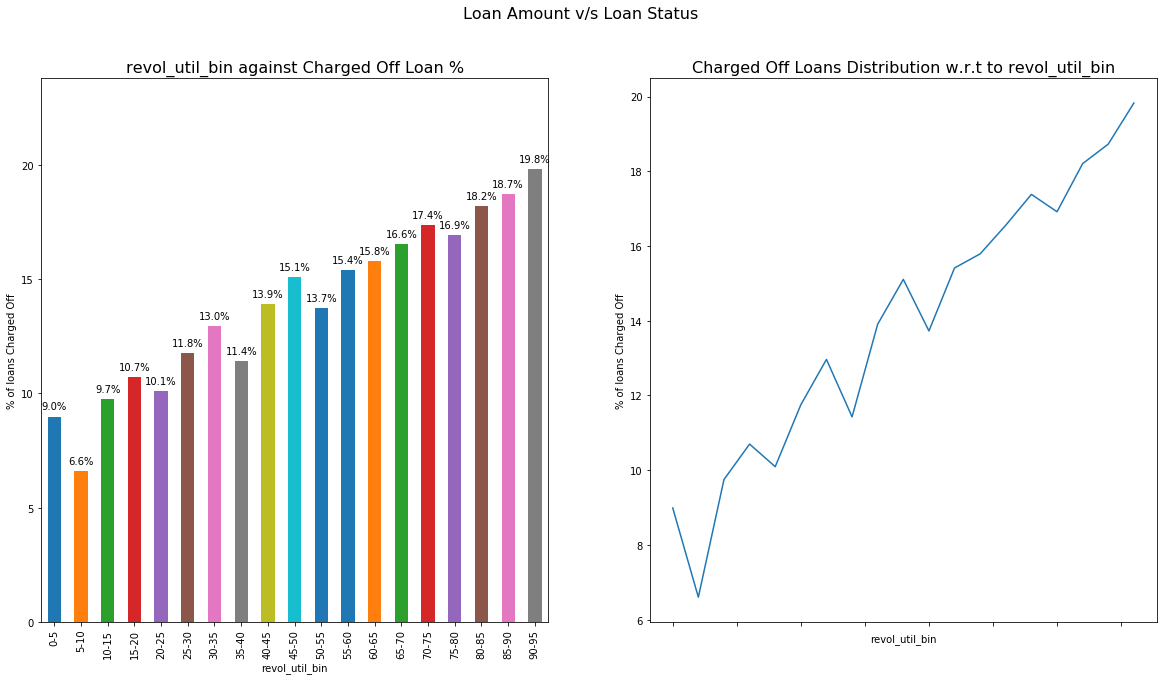

In [111]:
#Now check the values by plotting
plotCheckLoanStatus(loan_data,'revol_util_bin')

From the above plot it seems like for higher revolving utility rate the default rate is higher.

### <span style="color:red"> Observation </span>

1) From the above plot it seems like for higher revolving utility rate the default rate is higher. 

2) Considering the default rate as per earlier calculation as 17% it seems people with revol_util rate of 70% and more are more likely to default.

### <span style='color:red'> 16) Variable </span> : <span style='color:blue'> total_acc (number of credit lines currently in the borrower's credit file) </span> 

In [112]:
#Check  basic info
loan_data.total_acc.describe()

count    23227.000000
mean        22.494080
std         11.375582
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [113]:
loan_data.groupby(['loan_status'])['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3247.0,22.317524,11.437548,2.0,14.0,21.0,29.0,70.0
Fully Paid,19980.0,22.522773,11.365508,3.0,14.0,21.0,29.0,90.0


There isnt any significant different in between meand and standard deviation for Charged Off and Fully Paid loans for total_acc. So seems there is no significance of total_acc variable on loan default.

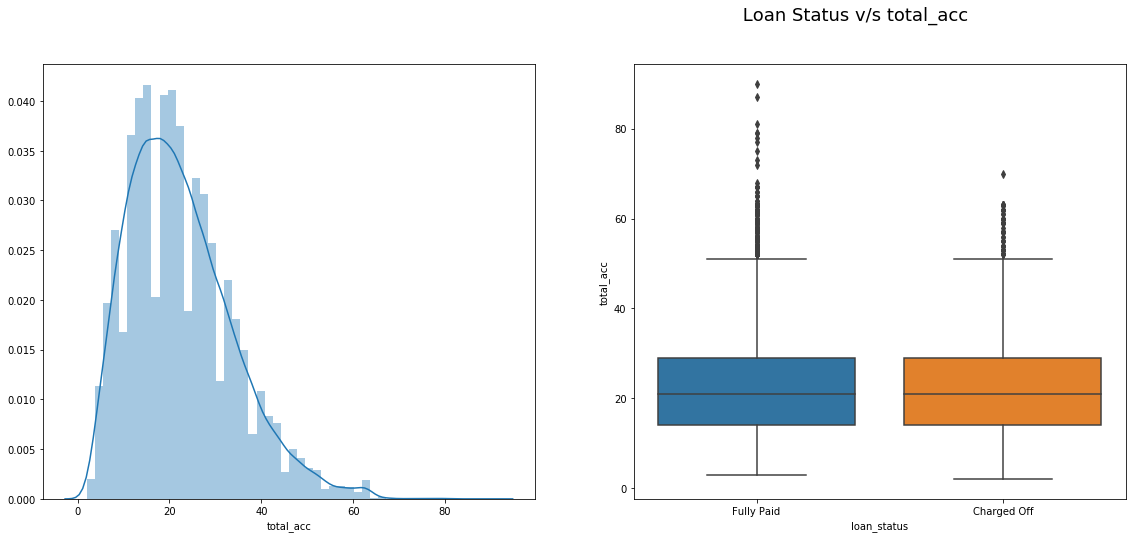

In [114]:
plot_loan_status_dist(loan_data,'total_acc')

The data is uniformly distributed for total_acc variable in the dataset also the box plots are almost similar indicating no significance of total_acc variable on loan default.

### <span style="color:red"> Observation </span>

There is no significance of total_acc variable for loan default analysis.

### <span style='color:red'> 17) Variable </span> : <span style='color:blue'> out_prncp (Remaining outstanding principal for total amount funded) </span> 

**Since we are interested in analyzing the variables leading to loan default, out_prncp variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**

### <span style='color:red'> 18) Variable </span> : <span style='color:blue'> out_prncp_inv (Remaining outstanding principal for portion of total amount funded by investors) </span> 

**Since we are interested in analyzing the variables leading to loan default, out_prncp_inv variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**

### <span style='color:red'> 19) Variable </span> : <span style='color:blue'> total_pymnt (Payments received to date for total amount funded) </span> 

**Since we are interested in analyzing the variables leading to loan default, total_pymnt variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**

### <span style='color:red'> 20) Variable </span> : <span style='color:blue'> total_pymnt_inv (Payments received to date for portion of total amount funded by investors) </span> 

**Since we are interested in analyzing the variables leading to loan default, total_pymnt variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**

### <span style='color:red'> 21) Variable </span> : <span style='color:blue'> total_rec_prncp (Principal received to date) </span> 

**Since we are interested in analyzing the variables leading to loan default, total_pymnt variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**


### <span style='color:red'> 22) Variable </span> : <span style='color:blue'> total_rec_int (Interest received to date) </span> 

**Since we are interested in analyzing the variables leading to loan default, total_pymnt variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**


### <span style='color:red'> 23) Variable </span> : <span style='color:blue'> total_rec_late_fee (Late fees received to date) </span> 

**Since we are interested in analyzing the variables leading to loan default, total_pymnt variable is of no interest for us since its more related to the current loans rather than Charged off or Fully Paid Loans.**


### <span style='color:red'> 24) Variable </span> : <span style='color:blue'> recoveries (post charge off gross recovery) </span> 

**This variable comes into effect after the loan has been charged off. So its not required for analysis or determining if the loan will be charged off since the loan is already charged off**


### <span style='color:red'> 25) Variable </span> : <span style='color:blue'> collection_recovery_fee (post charge off collection fee) </span> 

**This variable comes into effect after the loan has been charged off. So its not required for analysis or determining if the loan will be charged off since the loan is already charged off**


### <span style='color:red'> 26) Variable </span> : <span style='color:blue'> last_pymnt_amnt (Last total payment amount received) </span> 

In [115]:
#Check the basic info
loan_data.last_pymnt_amnt.describe()

count    23227.000000
mean      2826.293577
std       4498.348985
min          0.010000
25%        234.950000
50%        612.830000
75%       3647.575000
max      35479.890000
Name: last_pymnt_amnt, dtype: float64

In [116]:
loan_data.groupby(['loan_status'])['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3247.0,352.873126,582.476543,0.01,128.945,260.66,432.680,12390.99
Fully Paid,19980.0,3228.255349,4723.642428,0.16,273.085,901.23,4426.195,35479.89


There is huge variation in mean and standard deviation of the values for charged off and fully paid loans. Lets analyze this furthur.

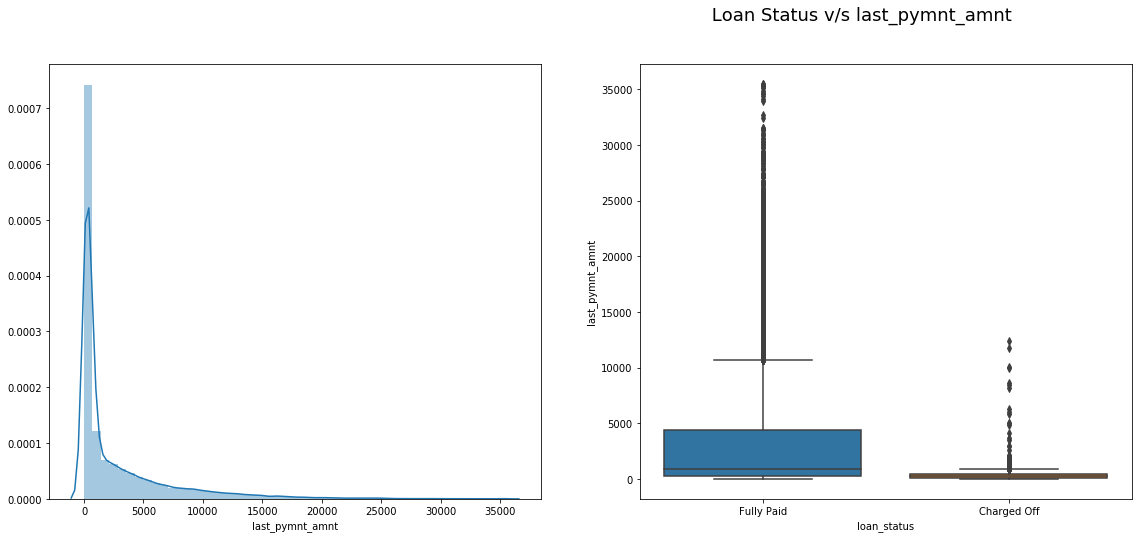

In [117]:
plot_loan_status_dist(loan_data,'last_pymnt_amnt')

The values are huge and plotting them with actual scale doesnt revel much so lets convert the data into log scale so that actual patterns are visible

In [118]:
#Convert the values to log scale
loan_data['last_pymnt_amnt1'] = loan_data['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

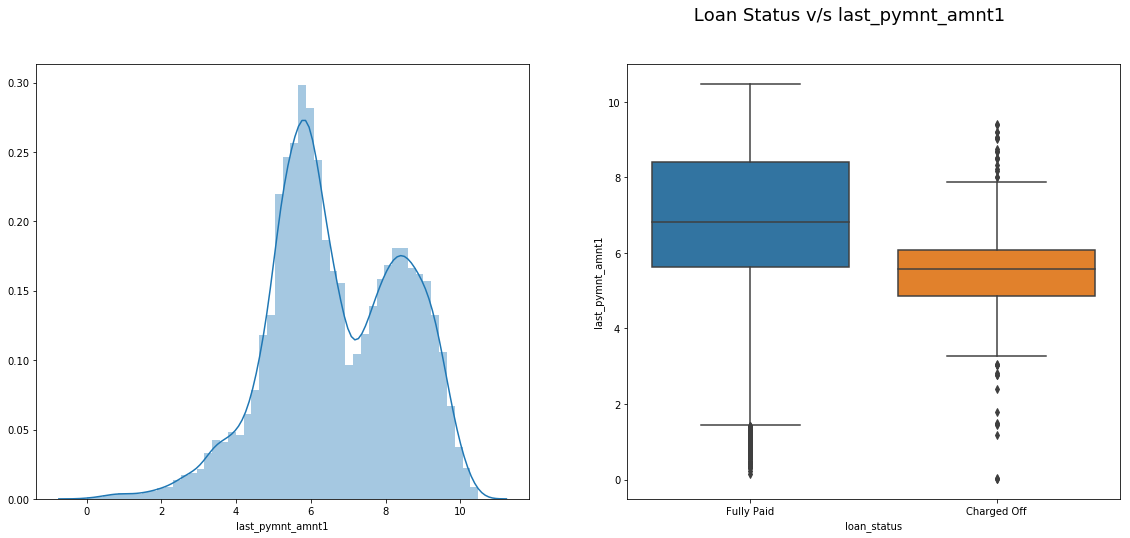

In [119]:
plot_loan_status_dist(loan_data,'last_pymnt_amnt1')

Now the data seems to be more appealing. 

In [120]:
loan_data['last_pymnt_amnt_bin'] = createBins(loan_data,'last_pymnt_amnt1',0,10,4)

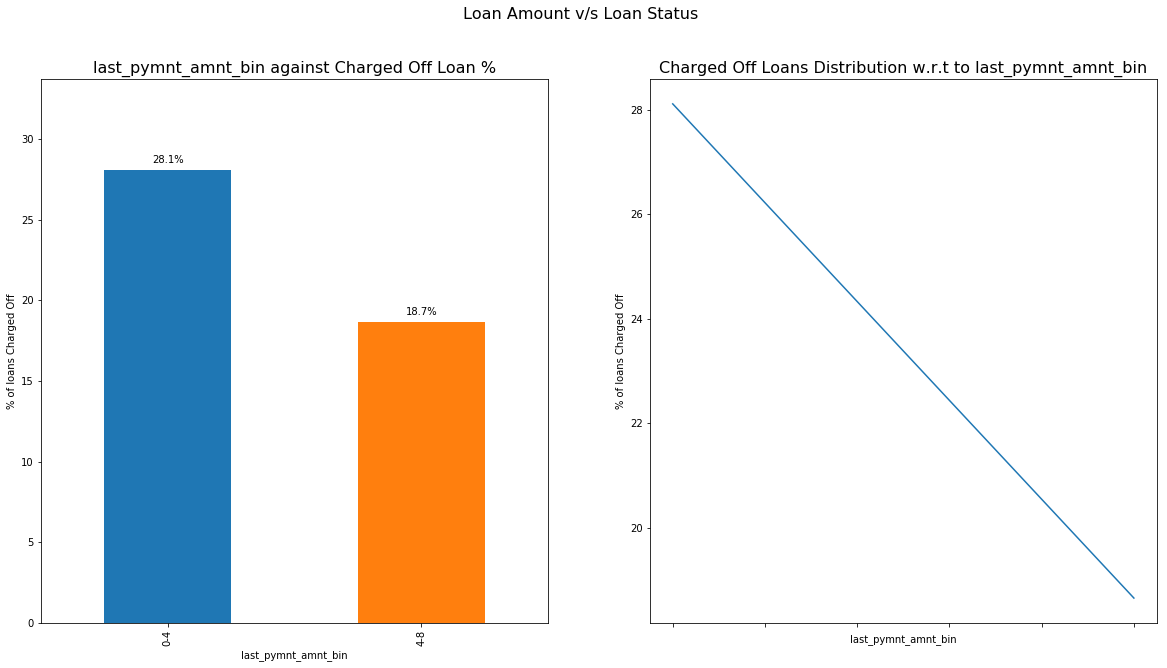

In [121]:
plotCheckLoanStatus(loan_data,'last_pymnt_amnt_bin')


From the plots above it seems like for the lower values of the last_pymnt_amnt the probability for a loan to default is high. Its quite obvious in real scenario too that if the amount of last payment goes on decreasing the loan applicant is probably going bankrupt and hence unable to pay the amount.

### <span style="color:red"> Observation </span>

**For lower last payment amount the probability of defaulting on loan is quite high.**

### <span style='color:red'> 27) Variable </span> : <span style='color:blue'> pub_rec_bankruptcies (Number of public record bankruptcies) </span> 

In [122]:
#Lets check for initial info
loan_data.pub_rec_bankruptcies.describe()

count    23227.000000
mean         0.041460
std          0.199788
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [123]:
#Check w.r.t to loan_status
loan_data.groupby(['loan_status'])['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3247.0,0.065291,0.249558,0.0,0.0,0.0,0.0,2.0
Fully Paid,19980.0,0.037588,0.190201,0.0,0.0,0.0,0.0,1.0


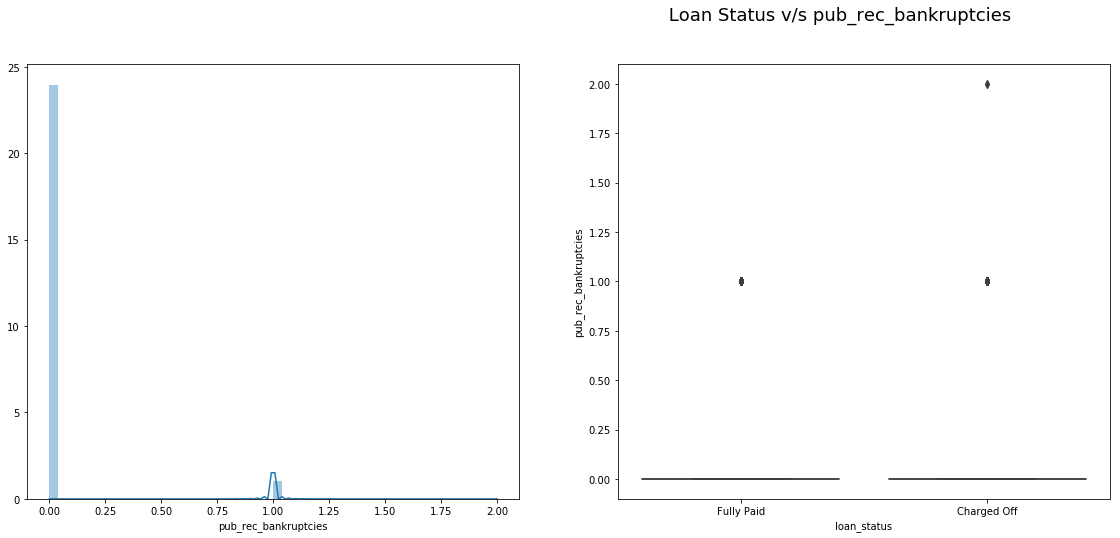

In [124]:
plot_loan_status_dist(loan_data,'pub_rec_bankruptcies')

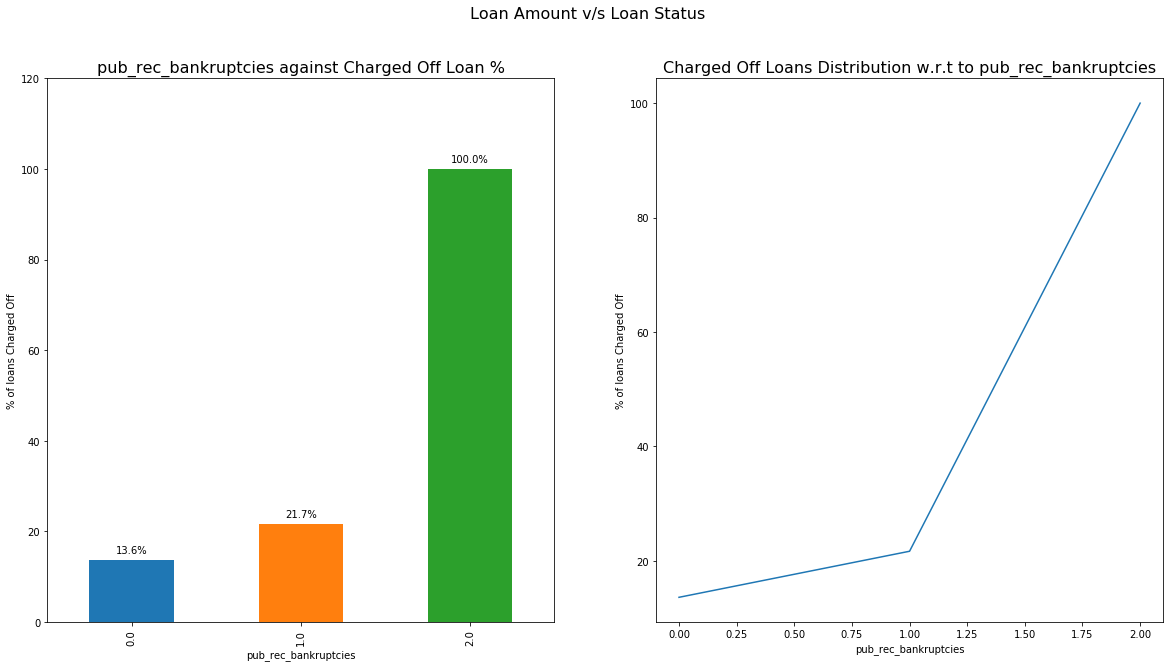

In [125]:
plotCheckLoanStatus(loan_data,'pub_rec_bankruptcies')

Analyzing the above plots, the charged off rate significantly increases from 1. Its clear that applicants having atleast 1 pub_rec_bankruptcies record are more likely to default on the loan. 

### <span style="color:red"> Observation </span>

1) The charged off rate significantly increases from 1. 

2) The applicants having atleast 1 pub_rec_bankruptcies record are more likely to default on the loan. 

### <span style='color:green'> Categorical Variables Analysis </span>

We have already identified the categorical variables earlier. Lets list them here

In [126]:
categorical_data.columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

We can exclude the column loan_status from the analysis since this the variable we are trying to analyze or find.
Also we can exclude the colums issue_d, last_payment_d and last_credit_pull_d since these are date columns and we can use them for analysis during the ***DERIVED METRIC ANALYSIS*** part.

So for now lets concentrate on the other variables:

1) grade

2) sub_grade

3) emp_title

4) home_ownership

5) verification_status

6) purpose

### <span style='color:red'> 1) Variable </span> : <span style='color:blue'> grade (LC assigned loan grade) </span> 

For analyzing the categorical variables we will need to plot these variables. Lets define a common method to plot these variables.

In [127]:
def plotCategory(df,col):
        plt.figure(figsize=(15,25))
        plt.subplot(2,2,1)
        plt.title('Plot for entire dataset',fontsize=22)
        ax = df.groupby(col).loan_amnt.count().plot.bar()
        showBarLabels(ax)
        plt.subplot(2,2,2)
        plt.title('Plot for filtered dataset',fontsize=22)
        ax = loan_data1.groupby(col).loan_amnt.count().plot.bar()
        showBarLabels(ax)
        plt.subplot(2,2,3)
        df.groupby(col).loan_amnt.count().sort_values(ascending=False).plot(kind='line')
        plt.subplot(2,2,4)
        loan_data1.groupby(col).loan_amnt.count().sort_values(ascending=False).plot(kind='line')

Since we are more interested in analyzing these variables against the Charged Off loans lets filter out the data for Charged Off loans and see how these behave.

In [128]:
loan_data1 = loan_data[loan_data['loan_status'].isin(['Charged Off'])]
loan_data1.shape

(3247, 57)

In [129]:
#Initial Analysis
loan_data.groupby(['loan_status'])['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,3247,7,B,848
Fully Paid,19980,7,B,6389


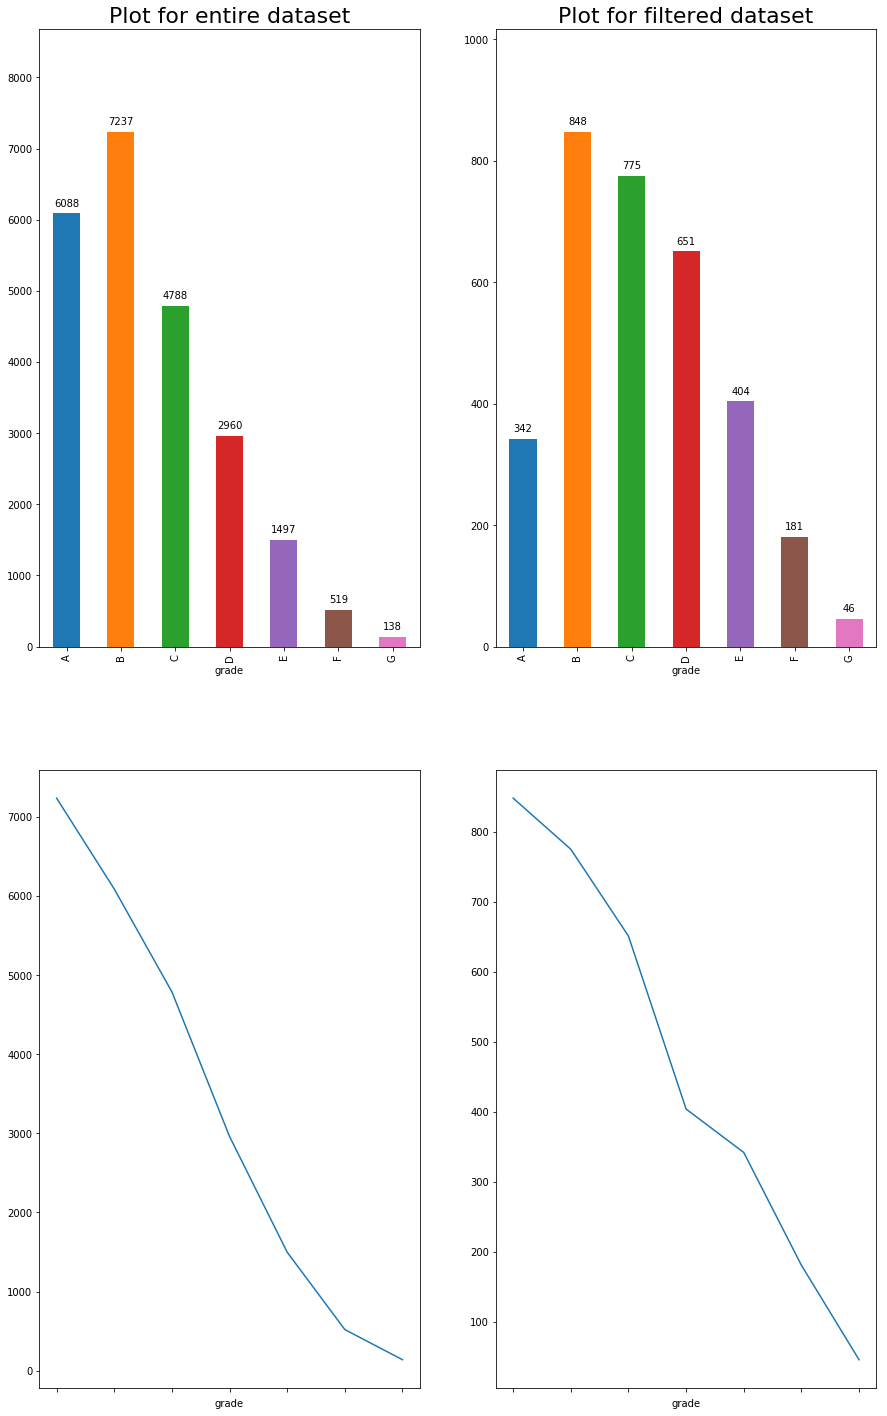

In [130]:
plotCategory(loan_data,'grade')

From the above plot it seems like loan grades A and B are most approved loans also these are the loans which are most charged off.

From the definition of loan grading from Lending Club:

*"Lending Club grades loans based on risk A-G. The higher the grade, the lower the risk and the lower the borrower’s interest rate. An A loan has an interest rate as low as 6.16 percent, a G loan has an interest rate as high as 35.89 percent".*

As per our earlier analysis the loans with higher interest rates are more likely to be charged off. So lets check the total charged off percentage of loans according to the grades.

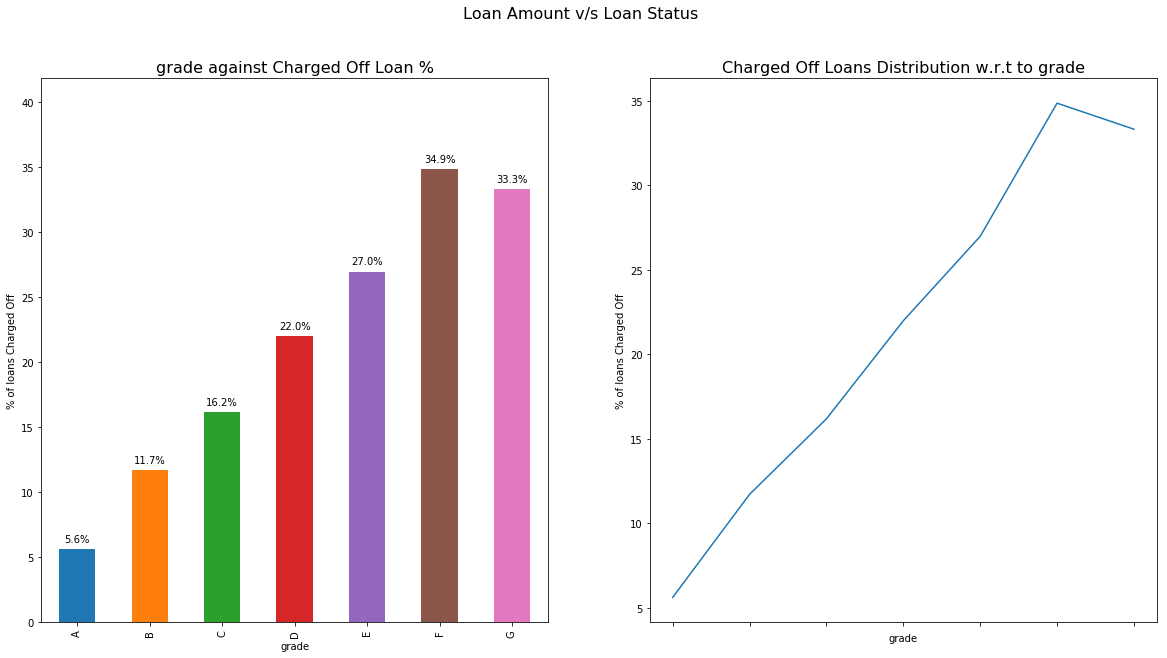

In [131]:
#Total % of charged off loans based on grade in the dataset.
plotCheckLoanStatus(loan_data,'grade')

The above plot seconds our analysis that higher interest loans are more likely to be charged off. Loans A,B and C have charged off percent of 17% while D,E,F,G have greater than 17% charged off rate. This seems to be true since higher the grade higher will be the ineterest rate.

### <span style="color:red"> Observation </span>

1) The interest rate is higher for the higher loan grades while its lower for lower loan grades. i.e: Loan grade A has lowest interest rate while G has the highest interest rate.

2) **As the loan grade increases, so are the chances for default. Loan grade A has lowest chances to default while loan grade G has highest chance to default.**

### <span style='color:red'> 2) Variable </span> : <span style='color:blue'> sub_grade (LC assigned loan subgrade) </span> 

In [132]:
#Initail info
loan_data.sub_grade.describe()

count     23227
unique       35
top          A4
freq       1778
Name: sub_grade, dtype: object

In [133]:
loan_data.groupby(['loan_status'])['sub_grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,3247,35,B5,216
Fully Paid,19980,35,A4,1682


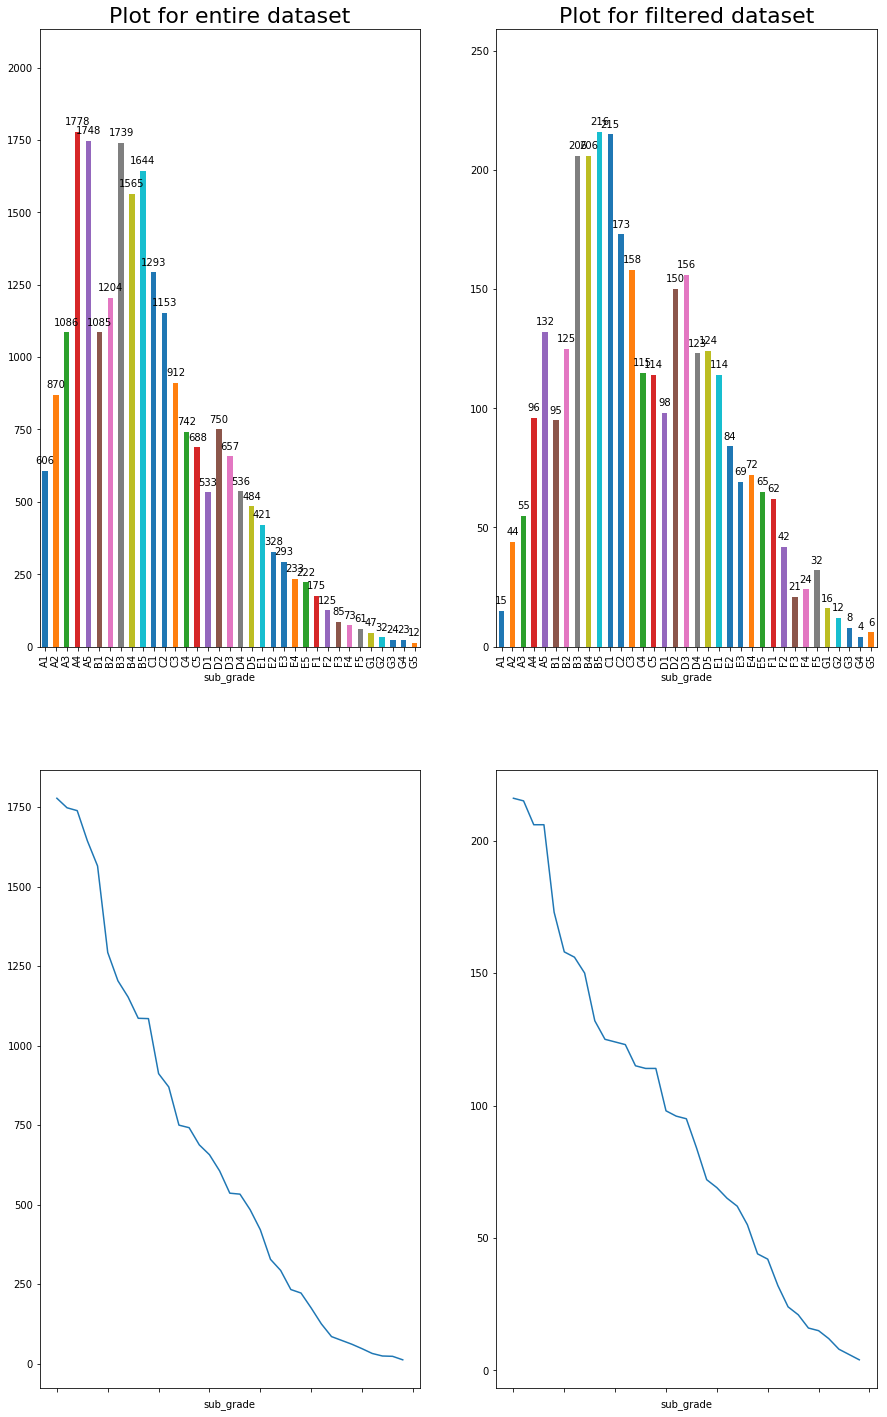

In [134]:
#Check the initial plots
plotCategory(loan_data,'sub_grade')

From the initial analysis it seems like loans A to C are most approved loans also the most charged off loans. Lets check the percentage of charged off loans for these sub grades in the entire dataset.

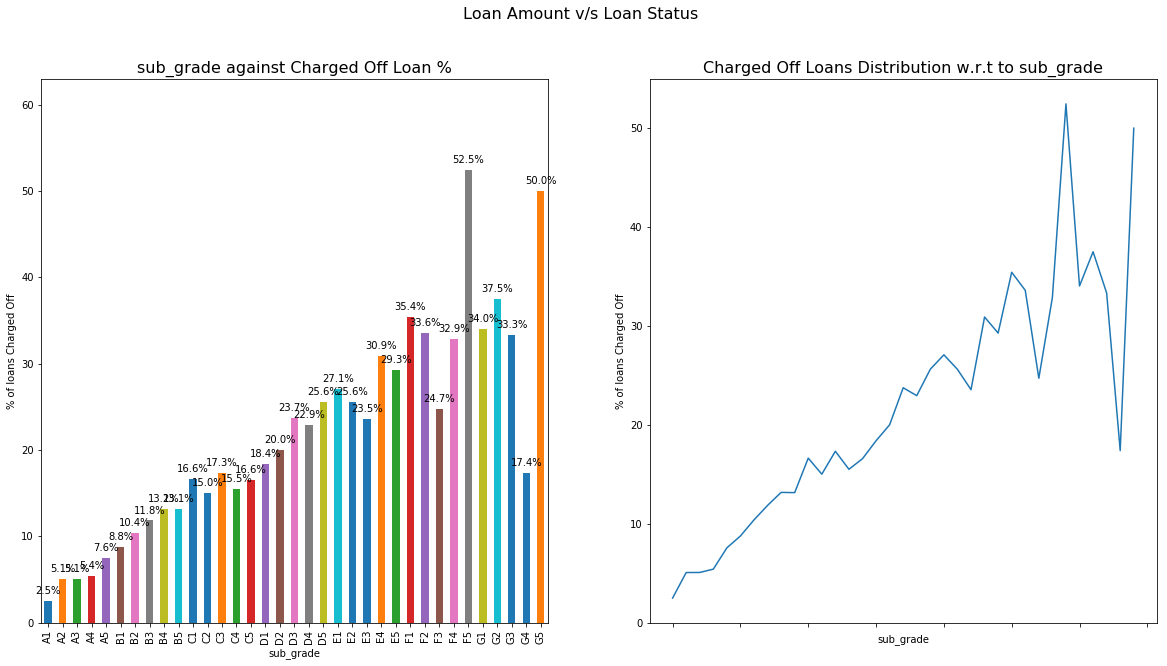

In [135]:
#Total % of charged off loans based on grade in the dataset.
plotCheckLoanStatus(loan_data,'sub_grade')

From the plot above it seems like loans A1 are the least charged off loans or safer loans while loans G5 are highest charged off loans or at higher risk to default.

From the lending club website as mentioned here (https://www.lendingclub.com/foliofn/rateDetail.action) its clear that interest rate increases as the grade increases A -> G, also the interest rate increases as the sub_grade within the grades increases i.e: sub_grade 1 has lowest interest rate while sub_grade 5 has highest interest rate within the grades.

A1 has interest rate of ~6% while A5 has interest rate of ~8% and so and so forth G5 has highest interest rate of ~31%.

As per our earlier analysis, its true that loans with highest interest rate are more likely to default. Hence proved.

### <span style="color:red"> Observation </span>

1) The interest rate is higher for the higher sub_grade loans while its lower for lower sub_grade loans. i.e: Loan grade A1 has lowest interest rate while A5 has the highest interest rate within the grade A.

2) A1 has lowest interest rate so its less likely to deafult while G5 has interest rate and hence more likely to default.

3) So we can say that, **As the loan sub_grade increases, so are the chances for default. Loan grade A1 has lowest chances to default while loan grade G5 has highest chance to default.**

### <span style='color:red'> 3) Variable </span> : <span style='color:blue'> emp_title (Employment Title) </span> 

In [136]:
#Check the basic info
loan_data.emp_title.describe()

count             23227
unique            18037
top       self_employed
freq                872
Name: emp_title, dtype: object

There seem to be 25933 unique emp_titles in the dataset. Plotting them would take long time for processing. So lets consider the top 15 emp_titles for analysis. A important thing to note is employee title entries in the dataset are the organization names to which the loan applicant belongs.

In [137]:
#Take into consideration top 15 emp_title based on counts in the dataset.
emp_title_top15 = loan_data.emp_title.value_counts(normalize=False).head(15)
emp_title_top15

self_employed              872
US Army                     68
Bank of America             59
IBM                         39
AT&T                        38
UPS                         37
US Air Force                36
Kaiser Permanente           34
Wells Fargo                 33
USAF                        31
United States Air Force     29
Self Employed               29
State of California         28
Lockheed Martin             25
Walgreens                   25
Name: emp_title, dtype: int64

Note we had populated the null values as self employed earlier considering that if the applicant hasnt given any data about its employer then he must be self employed. Lets do the analysis now.

As we can see frpm above the self_employed people are the ones who have most applied for loans followed by US Army, Bank of America, IBM and so on. Also lets note that the number of employees or the frequency on the data per entry is very low. Hence concluding based on this data wont hold true for such a large dataset. But still lets check the Charged Off loan % for these top employers loan applicants.

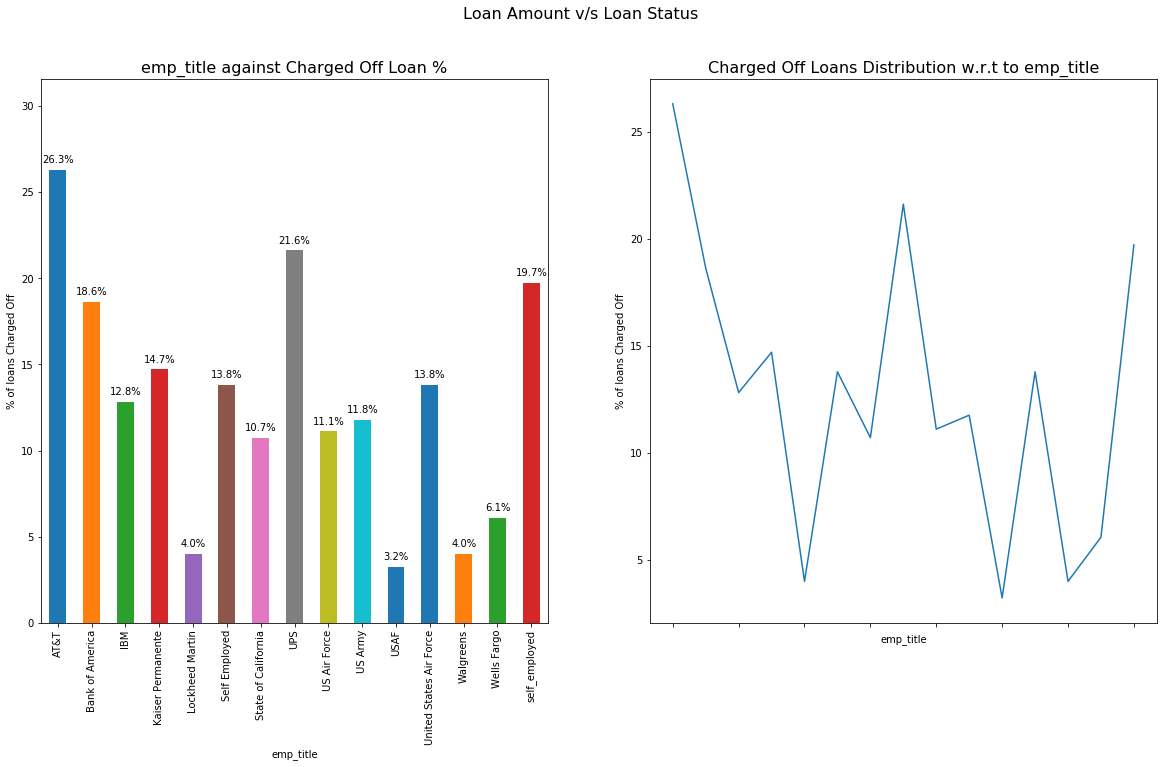

In [138]:
plotCheckLoanStatus(loan_data[loan_data['emp_title'].isin(emp_title_top15.index.values)], 'emp_title')

It seems like UPS, AT&T and Bank of America are the employers whose employees/loan applicants are more prone to loan default. But as said earlier the ratio of dataset per entry as compared to dataset on whole is very less and hence this analysis cant hold true. For now lets assume emp_title has no effect on loan default.

### <span style="color:red"> Observation </span>

1) Walmart, UPS, AT&T and Bank of America are the employers whose employees/loan applicants are more prone to loan default.

2) Since the ratio of dataset per entry as compared to dataset on whole is very less and hence this analysis cant hold true. 

3) Lets assume emp_title has no effect on loan default.

### <span style='color:red'> 4) Variable </span> : <span style='color:blue'> home_ownership (home ownership status provided by the borrower) </span> 

In [139]:
#Check the basic info
loan_data.home_ownership.describe()

count     23227
unique        4
top        RENT
freq      11156
Name: home_ownership, dtype: object

In [140]:
loan_data.groupby(['loan_status'])['home_ownership'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,3247,4,RENT,1585
Fully Paid,19980,4,RENT,9571


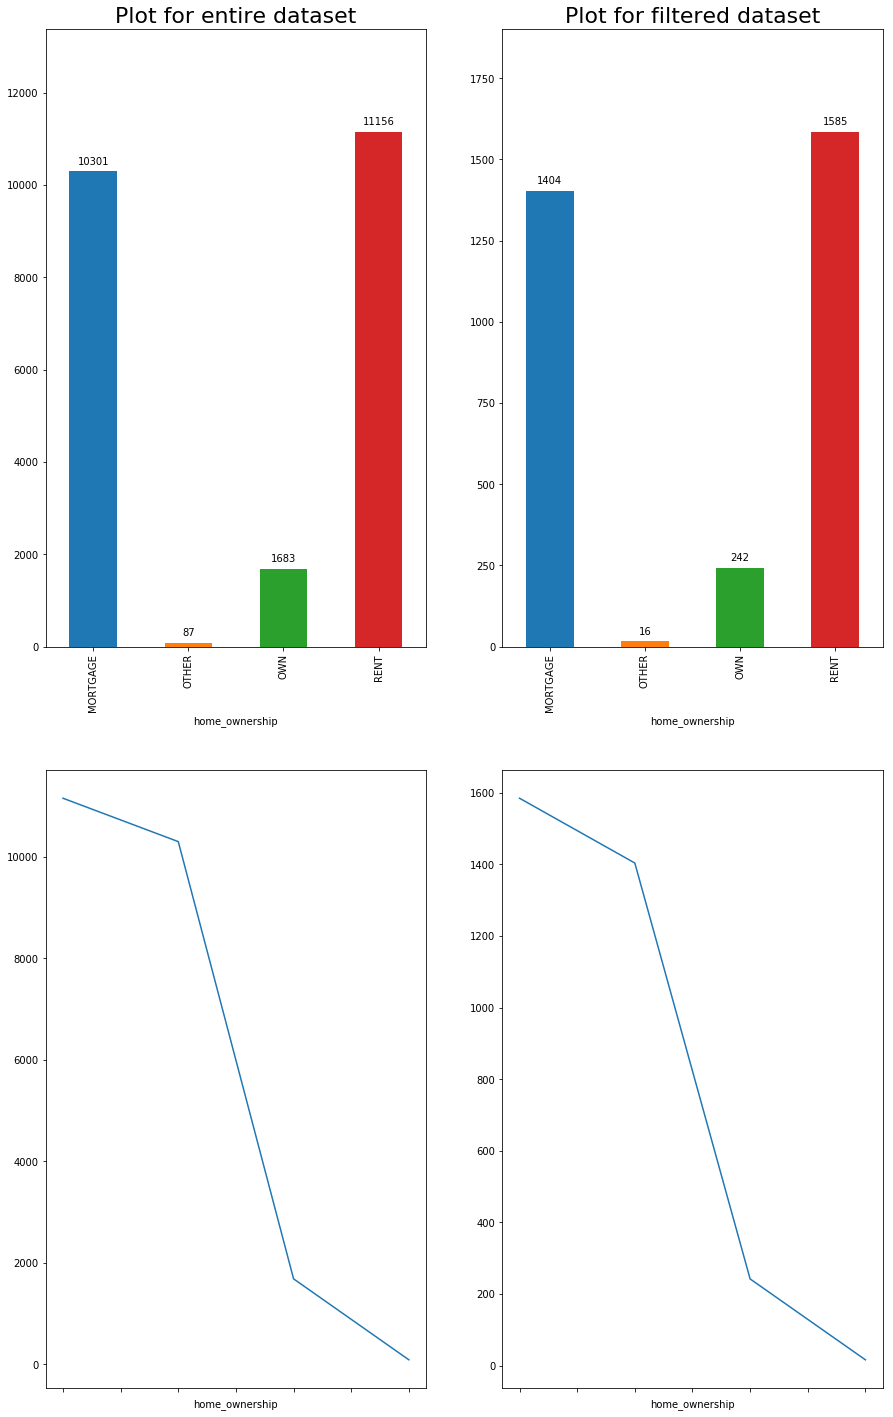

In [141]:
plotCategory(loan_data,'home_ownership')

At the first analysis it would seem like mortage and rent loan applicants are more tilted towards the loan default but lets check whats the total % of default for the home_ownership in the entire dataset against the loan_status.

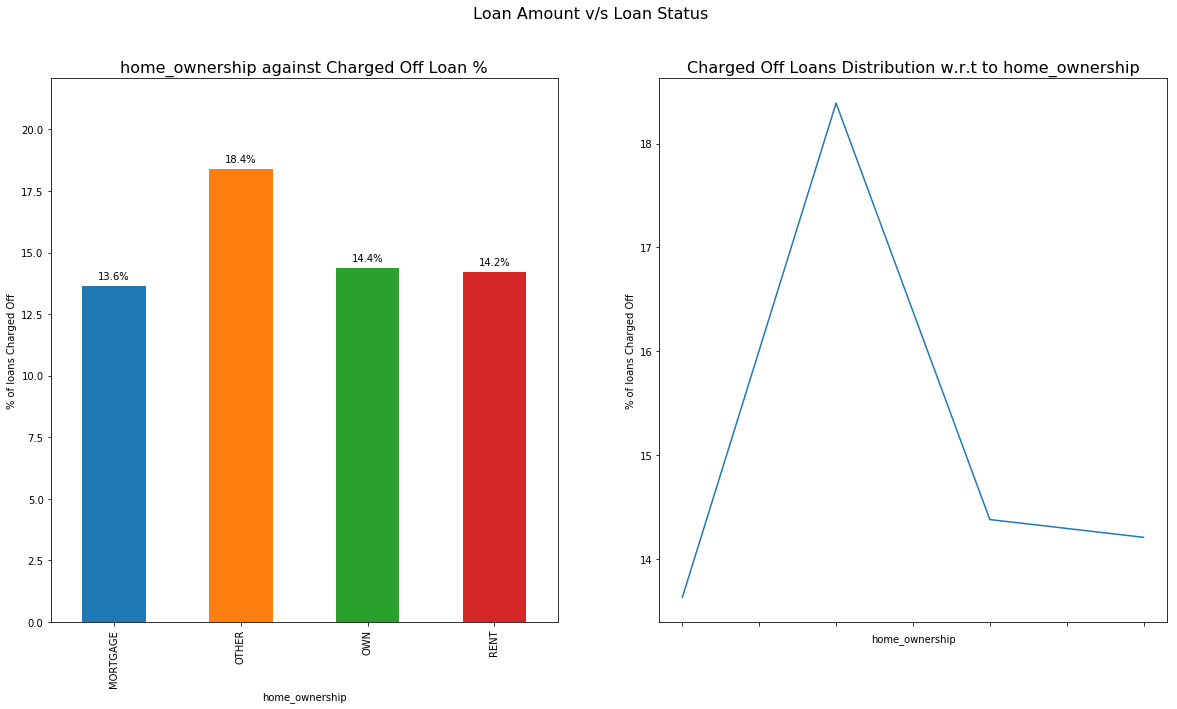

In [142]:
#Total % of charged off loans based on home_ownership in the dataset.
plotCheckLoanStatus(loan_data,'home_ownership')

This contradicts to our earlier assumption. From the plot above it seems that the charged off % is uniformly distrubuted across all the home ownership types be is mortage, own or rent. It seems slightly higher for the other category but for now we have no idea on what that category resembles too. So we will hold on the analysis for this variable for now and check if it affects any other variable during the bivariate analysis affecting the loan_status in return. For now lets assume home_ownership has no effect on loan default

### <span style="color:red"> Observation </span>

1) The loan charged off % is uniformly distributed across all the known home ownership categories like own, rent or mortage.

2) Its slightly higher for the others category but for now we have no idea what that category is. So we will hold our analysis for this variable for now and check if we can get some other information during bivariate analysis.

3) For now lets assume that there is **no significance of home_ownsership on loan default.**

### <span style='color:red'> 5) Variable </span> : <span style='color:blue'> verification_status (income was verified or not by LC) </span> 

In [143]:
#Start with basic info
loan_data.verification_status.describe()

count            23227
unique               3
top       Not Verified
freq             10248
Name: verification_status, dtype: object

In [144]:
loan_data.groupby(['loan_status'])['verification_status'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,3247,3,Verified,1273
Fully Paid,19980,3,Not Verified,9037


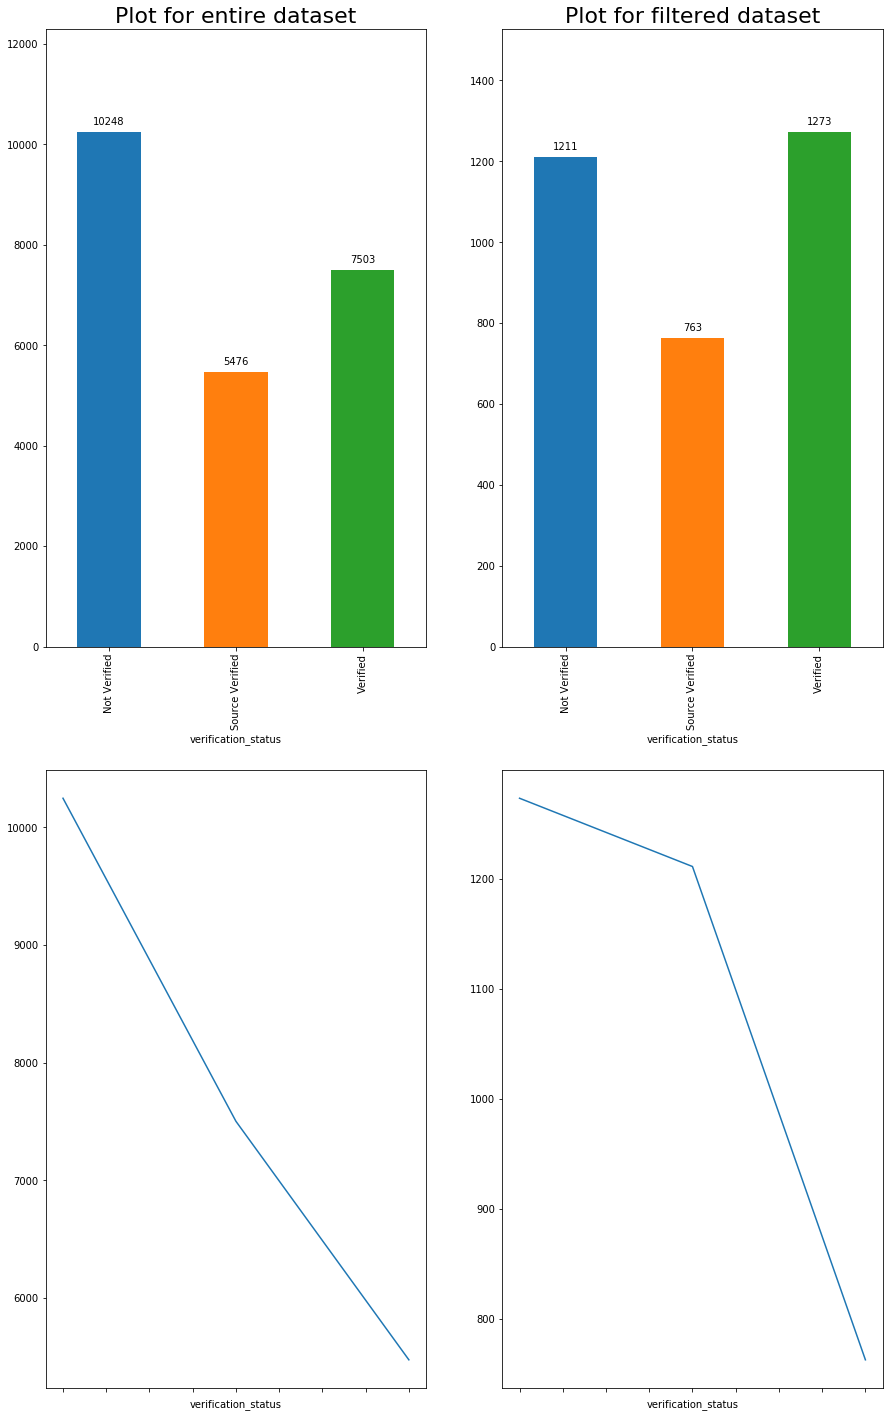

In [145]:
plotCategory(loan_data,'verification_status')

From the initial analysis it seems like there are more non-verified income source loans then verified ones. Also it seems that the verified loans are more prone to charged off then the non verified loans. Lets check the total % of verified income charged off loans in the entrie dataset. 

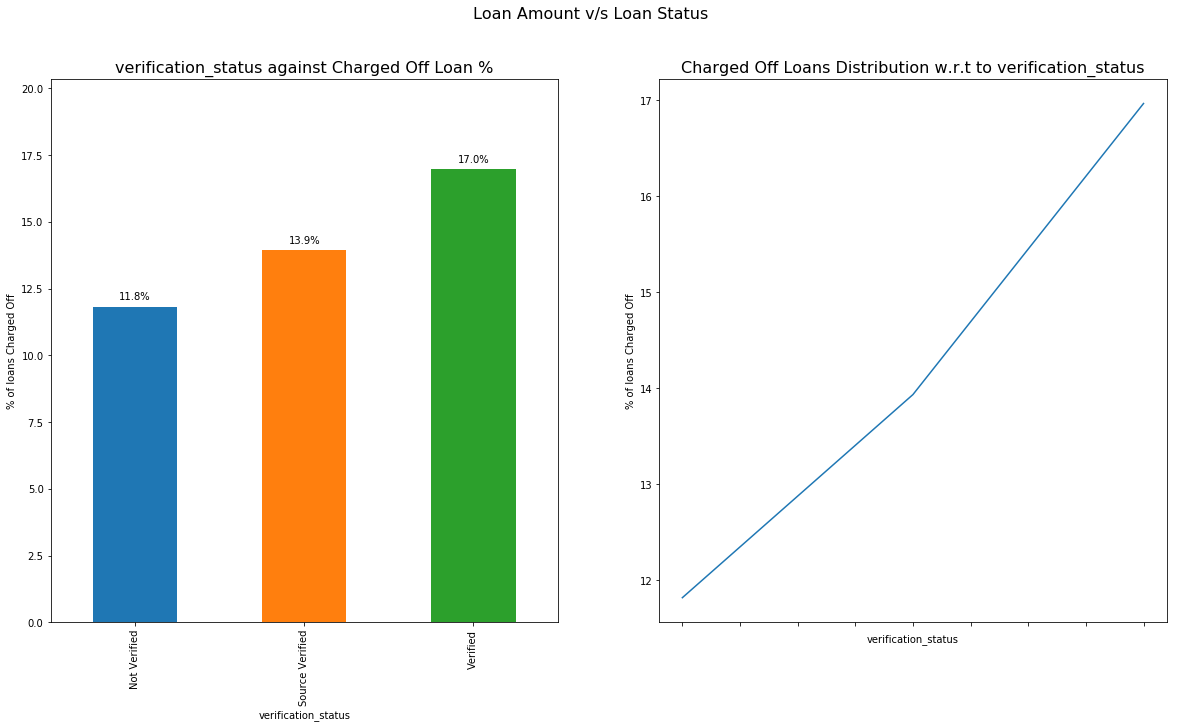

In [146]:
#Total % of charged off loans based on verification_status in the dataset.
plotCheckLoanStatus(loan_data,'verification_status')

The above plot confirms are earlier assumption that verified loans are prone to charged off then the non-verified loans. We will hold our analysis for now since this is unusual in real life scenario. The verified income loans must be less prone to default than the non-verfied once in actual scenario. Lets hold our analysis and verify this later in the bi-variate analysis.

### <span style="color:red"> Observation </span>

1) Our initial analysis shows that Verified loans are more prone to be defaulted than the non-verified once.

2) This is highly unlikely so we will hold are analysis until later.

### <span style='color:red'> 6) Variable </span> : <span style='color:blue'> purpose (category provided by the borrower for the loan request) </span> 

In [147]:
#check initial analysis
loan_data.purpose.describe()

count                  23227
unique                    14
top       debt_consolidation
freq                   11084
Name: purpose, dtype: object

In [148]:
loan_data.groupby(['loan_status'])['purpose'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,3247,14,debt_consolidation,1624
Fully Paid,19980,14,debt_consolidation,9460


Seems debt consolidation is larger prone to loan default from the initial analysis. Lets verify it?

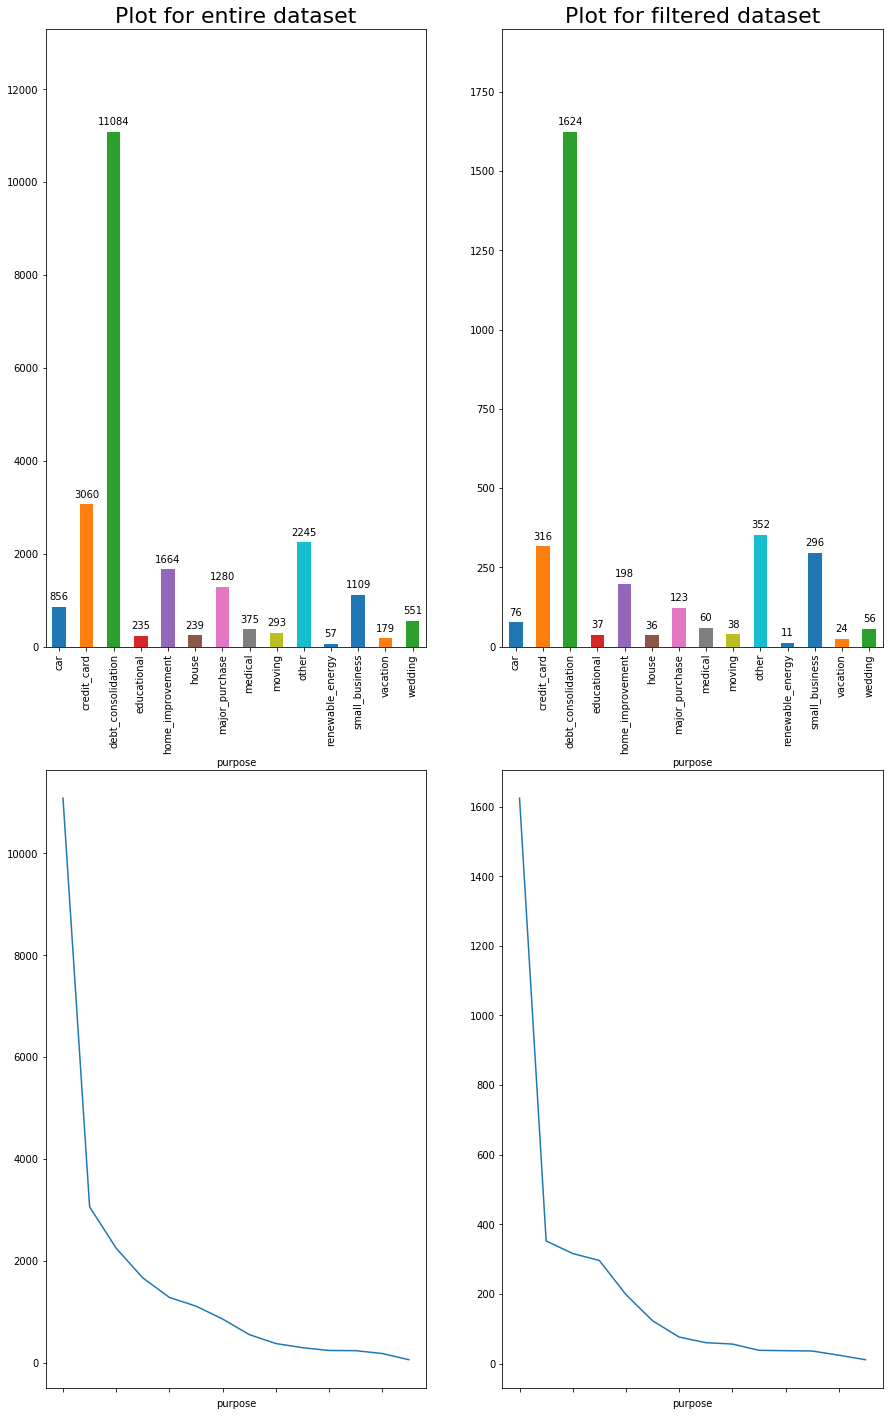

In [149]:
#Plot Category
plotCategory(loan_data,'purpose')

From the above plot that seems to be true. But lets confirm with the total charged off % in the entire dataset against the purpose.

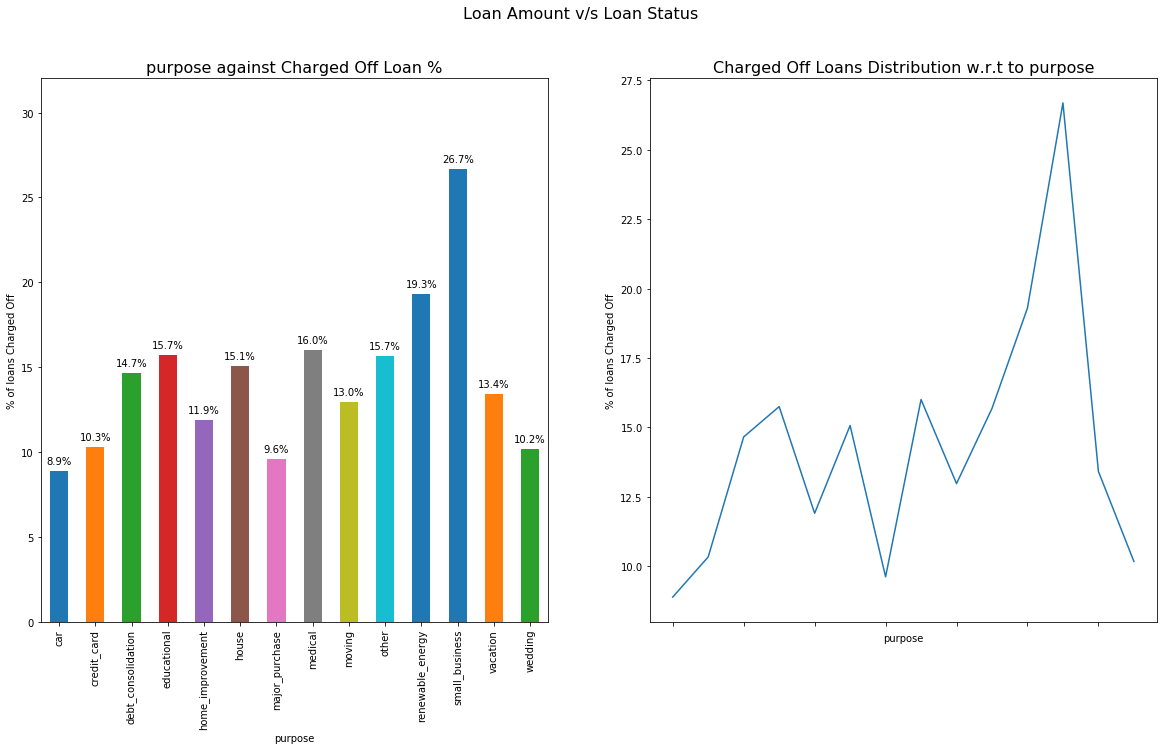

In [150]:
#Total % of charged off loans based on purpose in the dataset.
plotCheckLoanStatus(loan_data,'purpose')

From the above plot, its true that debt_consolidation contributes to major charged off loan % but seems like small_business with ~27% charged off rate are higher than any other purpose making them best candidate to filter out which are more prone to loan default. Considering the 17% default rate as per earlier calculation seems like renewable_energy is also more likely candidate for the loan default with ~17% default rate. Then comes medical, house and debt_consolidation with ~16%, 15% respectively.

### <span style="color:red"> Observation </span>

1) Small business with default rate of ~27% are the highest and more prone to loan default

2) Renewable energy with ~19% is close second to be more prone to loan default. Although just small amount of loans are approved for this purpose making it relatively small as compared to entrie dataset, still it holds strong resonance in being the good candidate for lon default. (Can we ignore this for now since much data is not available thats the matter of debate. But for now we will stick with analysis).

3) Medical, house and debt consolidation are closely followed other candidates for loan default..

## <span style='color:orange'> Bivariate Analysis </span>

In the earlier section we did the brief analysis for the univariate variables. In this section we will do the bivariate analysis. 

For Bi-Variate analysis we will consider 2 variables at a time as oppose to single variable as we did for Univariate Analysis, to see how these variables affect the loan_status variable. That means we will consider 2 variables at a time and analyze them to see which 2 variables are corelated and more likely to find out applicants who can default on their loans.

To start with we already have identified the list of univariate variables in the earlier section which are are more likely to affect the loan default analysis. For furthur analysis we will consider these variable pairs to see how they can help us in analyzing the loan defaulting candidates.

In [151]:
#List of variables identified earlier
numeric_data.columns
categorical_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [152]:
#In order to find the most corelated variables lets plot a corrleation matrix for numeric data and check
plt.figure(figsize=(30,30))
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')


<Figure size 2160x2160 with 0 Axes>

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1,0.992632,0.187379,0.19715,0.276367,0.291107,0.0726129,0.110115,0.123443,0.0246708,0.0960116,-0.00426106,-0.0507113,0.0277279,-0.0223566,0.00634121,0.0884365,0.0510748,0.198093,0.198043,0.177621,0.244046,0.144857,0.211278,-0.0553032,0.0408214,-0.0125382,0.152745,-0.00909777
member_id,0.992632,1,0.18888,0.197977,0.287395,0.307664,0.0675161,0.107497,0.127461,0.0255885,0.0976092,-0.00435919,-0.0557824,0.0252265,-0.0226731,0.00249692,0.0876107,0.0530612,0.186818,0.186755,0.180072,0.255047,0.147553,0.21298,-0.0569714,0.0389412,-0.0140324,0.154415,-0.00917995
loan_amnt,0.187379,0.18888,1,0.978546,0.941765,0.365538,0.323866,0.923548,0.165097,0.299976,0.0705083,-0.0284108,0.0029337,0.171748,-0.0521371,0.31773,0.0779095,0.258633,0.195242,0.194789,0.878737,0.850435,0.841479,0.727098,0.0471911,0.137092,0.0724501,0.436571,-0.0324307
funded_amnt,0.19715,0.197977,0.978546,1,0.963888,0.343096,0.329044,0.953374,0.164064,0.293361,0.0709383,-0.0291711,0.00279249,0.170227,-0.0522162,0.309543,0.0828792,0.252719,0.198039,0.197644,0.898269,0.87044,0.862456,0.73771,0.0493354,0.138086,0.0741428,0.439834,-0.0336331
funded_amnt_inv,0.276367,0.287395,0.941765,0.963888,1,0.363639,0.316936,0.907644,0.172519,0.279119,0.0752418,-0.0349622,-0.0100227,0.156307,-0.0582497,0.288057,0.0845867,0.240933,0.206637,0.206653,0.879855,0.908418,0.842273,0.731986,0.0323394,0.125354,0.0598996,0.428841,-0.041361
term,0.291107,0.307664,0.365538,0.343096,0.363639,1,0.444685,0.0934982,0.121099,0.0482309,0.0925978,0.00938163,0.0369625,0.0505777,0.00932011,0.0631715,0.0736475,0.0931933,0.223093,0.222775,0.330111,0.346709,0.215331,0.529927,0.00439708,0.101488,0.0257023,0.236283,0.0166887
int_rate,0.0726129,0.0675161,0.323866,0.329044,0.316936,0.444685,1,0.298945,0.0121569,0.0630755,0.117362,0.156624,0.129107,0.0268998,0.101426,0.10983,0.461173,-0.0282114,0.13585,0.135845,0.319475,0.309566,0.195551,0.540078,0.100352,0.124124,0.0652755,0.157066,0.0858388
installment,0.110115,0.107497,0.923548,0.953374,0.907644,0.0934982,0.298945,1,0.133604,0.29795,0.0567682,-0.0171761,0.00452402,0.168221,-0.0463412,0.314431,0.108229,0.234555,0.126642,0.126403,0.850513,0.815282,0.842884,0.630982,0.0626876,0.119642,0.077178,0.384314,-0.029544
emp_length,0.123443,0.127461,0.165097,0.164064,0.172519,0.121099,0.0121569,0.133604,1,0.119097,0.0543813,0.0140662,0.00773891,0.0959573,0.0669989,0.151938,0.0146373,0.202285,0.0563481,0.0563914,0.14473,0.153446,0.132131,0.136099,-0.0147573,0.0264712,0.00376021,0.0724226,0.0634858
annual_inc,0.0246708,0.0255885,0.299976,0.293361,0.279119,0.0482309,0.0630755,0.29795,0.119097,1,-0.137598,0.0267907,0.0396437,0.177984,-0.0165834,0.302551,0.0223378,0.261704,0.0390733,0.0389215,0.280431,0.268198,0.280874,0.202555,0.00701559,0.0304644,0.0243368,0.142213,-0.0142466


<Figure size 2160x2160 with 0 Axes>

As seen from the above correlation matrix few of the variables like loan_amnt,funded_amnt,installment,tototal_pymnt are linearly related to each other and thats true since when the loan_amount increases so does the other variables.

Also from corelation it seems that considering any one variable for analysis will hold true for the other too. So will consider loan_amnt as the variable for analysis.

But for now we are interested to check which variable combinations are more likely to identify the loan defaulters so lets get them analyzed.

But before analyzing them lets define a common method that will plot the variable comparisons against the loan_status.

In [153]:
#You can specify hue and order by clause as optional for the plots below
#Plot Bar plot for given variables
def plotBivariateBar(df,col1,col2,hue=False,order=False):
    plt.figure(figsize=(20,5))
    if hue:
        if order:
            ax = sns.barplot(x=col1, y=col2, hue=hue, data=df, estimator=np.mean, order=order)
        else:
            ax = sns.barplot(x=col1, y=col2, hue=hue, data=df, estimator=np.mean)
    else:
        if order:
            ax = sns.barplot(x=col1, y=col2, data=df, estimator=np.mean, order=order)
        else:
            ax = sns.barplot(x=col1, y=col2, data=df, estimator=np.mean)
        
#Plot Box plot for given variables
def plotBivariateBox(df,col1,col2,hue=False,order=False):
    plt.figure(figsize=(20,5))
    if hue:
        if order:
            ax = sns.boxplot(x=col1, y=col2, hue=hue, data=df, order=order)
        else:
            ax = sns.boxplot(x=col1, y=col2, hue=hue, data=df)
    else:
        if order:
            ax = sns.boxplot(x=col1, y=col2, data=df, order=order)
        else:
            ax = sns.boxplot(x=col1, y=col2, data=df)

def plotBivariateScatter(df,col1,col2):
    sns.scatterplot(x=col1, y=col2, data=df)

### <span style='color:red'> 1) Variable </span> : <span style='color:blue'> loan_amnt v/s int_rate </span> 

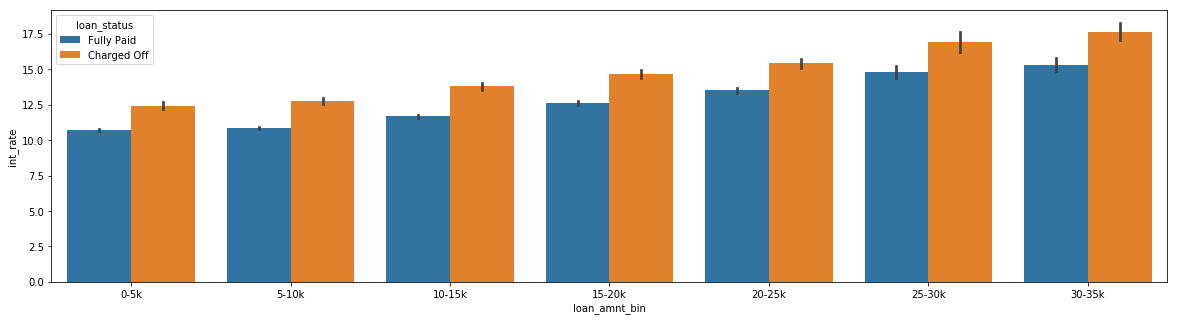

In [154]:
plotBivariateBar(loan_data,'loan_amnt_bin','int_rate', hue="loan_status")

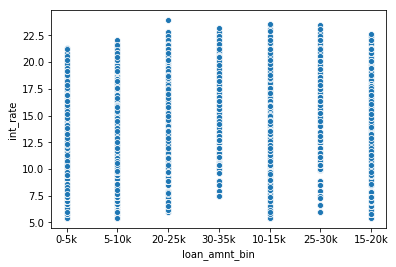

In [155]:
plotBivariateScatter(loan_data,'loan_amnt_bin','int_rate')

Its clear from the above plot that as the loan amount and int_rate increases so does the chances of loan default/charged off increases.

### <span style="color:red"> Observation </span>

**As the loan amount and int_rate increases so does the chances of loan default/charged off increases**

### <span style='color:red'> 2) Variable </span> : <span style='color:blue'> loan_amnt v/s grade </span> 

As per our initial analysis as the grade increases so does the risk of defaulting increases. Lets verify the same here.

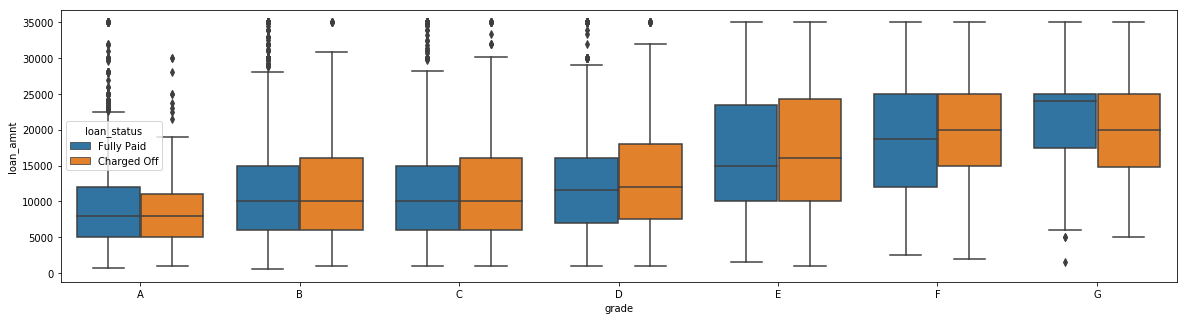

In [156]:
plotBivariateBox(loan_data,'grade','loan_amnt',hue='loan_status' , order=['A','B','C','D','E','F','G'])

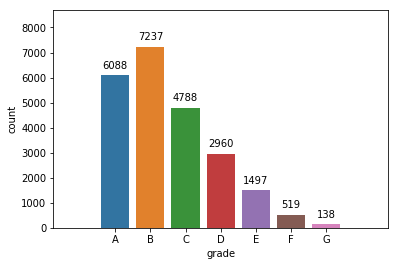

In [157]:
ax=sns.countplot(loan_data['grade'], order=sorted(loan_data.grade.unique()))
showBarLabels(ax)

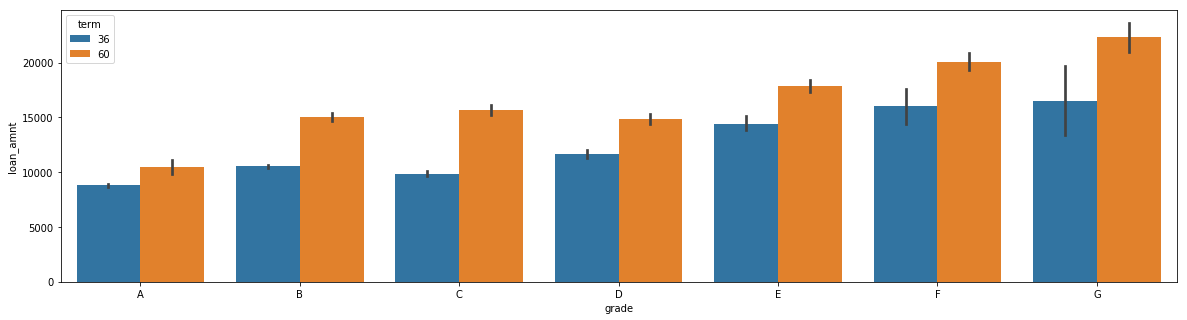

In [158]:
plotBivariateBar(loan_data,'grade','loan_amnt',hue='term', order=['A','B','C','D','E','F','G'])

From the plot above it seems like maximum loans were taken for grade A,B and C and minimum were taken for E,F and G. That should be true since with the increase in loan grade the interest rate increases and so will the total pay-off.

Also from the boxplot above its clear that as the loan amount and loan grade increases so does the chances of loan default/charged off increases.

### <span style="color:red"> Observation </span>

1) Most number of loans are taken from loan grade A,B,C while least are taken for E,F,G.

2) **As the loan amount and loan grade increases so does the chances of loan default/charged off increases**

### <span style='color:red'> 3) Variable </span> : <span style='color:blue'> grade v/s int_rate </span> 

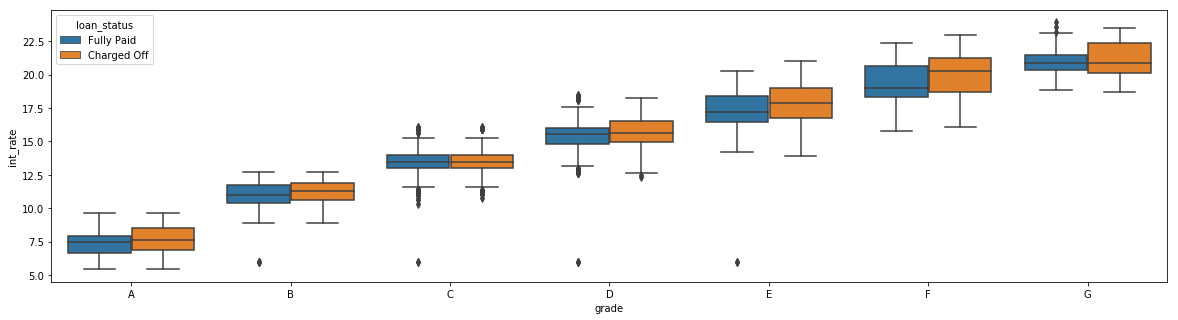

In [159]:
plotBivariateBox(loan_data,'grade','int_rate',hue='loan_status',order=['A','B','C','D','E','F','G'])

We know from the earlier information from Lending Club Website that the int_rate increases with the increase in loan grade. The above plot just seconds are information as we can see that as the loan grade increases so does the int_rate.

It is also observed that with the increase in loan_grade and int_rate the probability of the loan defaulting/charged off is also high. So the loans with grade A are less likely to defalut while the loans with grade G are more likely to default.

### <span style="color:red"> Observation </span>

1) The int_rate increases with the increase in loan grade

2) **As the loan grade and int_rate increases so does the chances of loan default/charged off increases**

### <span style='color:red'> 4) Variable </span> : <span style='color:blue'> sub_grade v/s int_rate </span> 

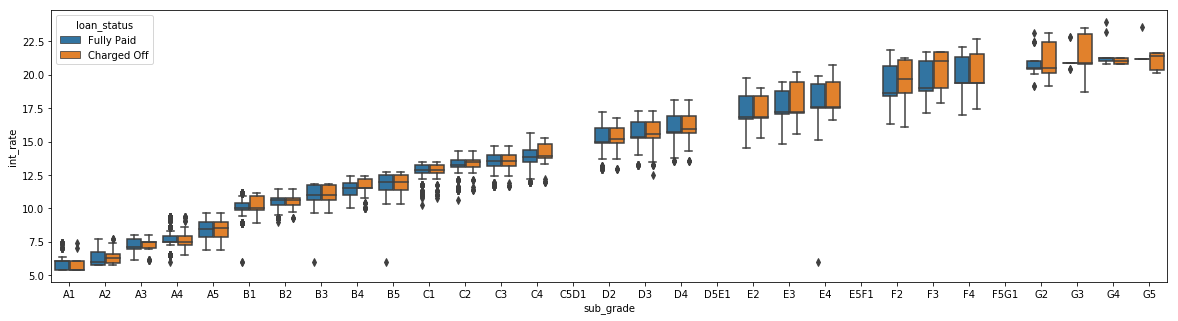

In [160]:
plotBivariateBox(loan_data,'sub_grade','int_rate',hue='loan_status',order=['A1','A2','A3','A4','A5',
                                                                          'B1','B2','B3','B4','B5',
                                                                          'C1','C2','C3','C4','C5'
                                                                          'D1','D2','D3','D4','D5'
                                                                          'E1','E2','E3','E4','E5'
                                                                          'F1','F2','F3','F4','F5'
                                                                          'G1','G2','G3','G4','G5'])

We know from the earlier information from Lending Club Website that the int_rate increases with the increase in loan subgrade. The above plot just seconds are information as we can see that as the loan subgrade increases so does the int_rate.
i.e: loan with subgrade A1 has lowest interest rate while loan with subgrade A5 has highest for loan grade A bracket. While loan subgrade G5 has highest among all.

It is also observed that with the increase in loan_grade and int_rate the probability of the loan defaulting/charged off is also high. So the loans with grade A1 are less likely to defalut while the loans with grade G5 are more likely to default.
Also can be seen from the plot above that almost all loans with subgrade G5 have defaulted. Hence observation is true

### <span style="color:red"> Observation </span>

1) The int_rate increases with the increase in loan subgrade

2) **As the loan subgrade and int_rate increases so does the chances of loan default/charged off increases**

### <span style='color:red'> 5) Variable </span> : <span style='color:blue'> loan_amnt v/s annual_inc </span> 

We have already identified outliers in the annual income in earlier section where the applicants with higher annual income (>260K) are very less. Hence we have dropped them for our analysis.
We will do the same for analysis below.

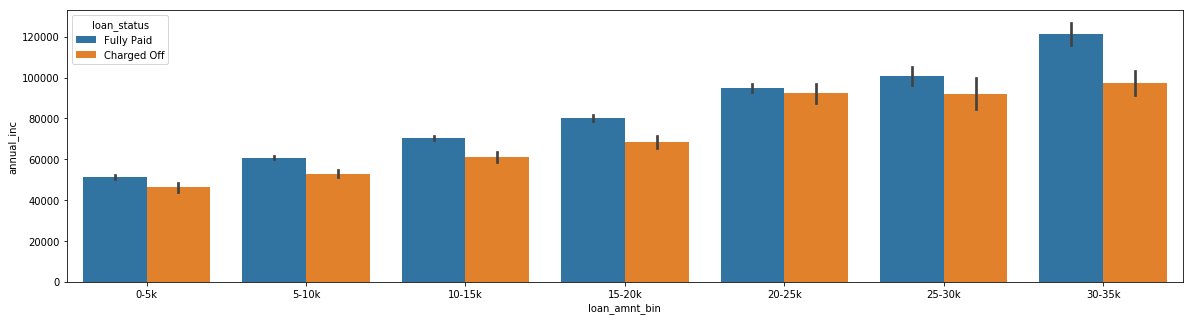

In [161]:
plotBivariateBar(loan_data.loc[loan_data['annual_inc']<260000],'loan_amnt_bin','annual_inc', hue="loan_status")

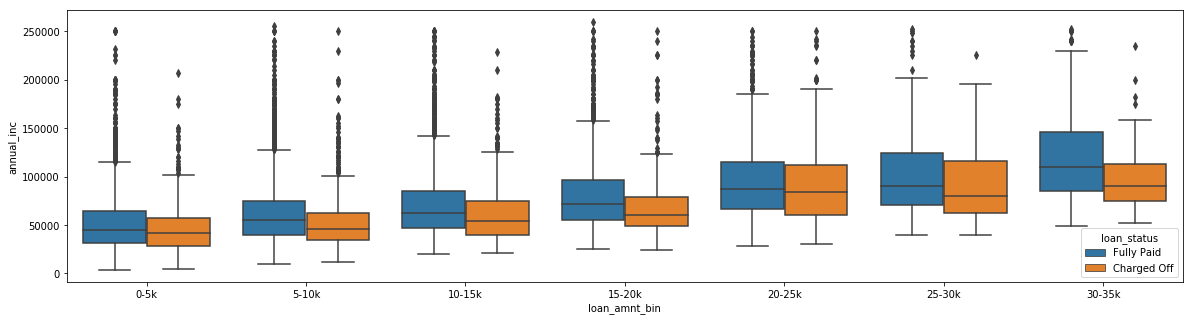

In [162]:
plotBivariateBox(loan_data.loc[loan_data['annual_inc']<260000],'loan_amnt_bin','annual_inc', hue="loan_status")

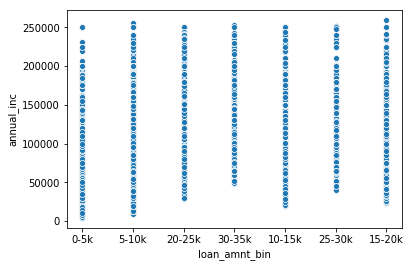

In [163]:
plotBivariateScatter(loan_data.loc[loan_data['annual_inc']<260000],'loan_amnt_bin','annual_inc')

From the above plot is clear that the applicants with higher income have applied for higher loan amount and the charged off rate seems pretty  low. This may be because the individuals with net income more that 250K have applied for loan as low as 35K. That seems pretty reasonable and hence for now lets assume that this assumption holds true that as the annual_inc increases so does the chances of loan defalut descreases. 

### <span style="color:red"> Observation </span>

1) There are applicants with high annual income who have applied for low loan_amount.

2) **As the annual_inc increases for low loan_amnt, the chances of loan default/charged off decreases**. 

3) **This assumption may not hold true for the applicants with high annual_inc who have applied for higher loan_amnts.** This needs furthur analysis. As of now the data isnt available.

### <span style='color:red'> 6) Variable </span> : <span style='color:blue'> verification v/s loan_amnt </span> 

Earlier during univariate analysis we had hold on the observations for verification_status variable since earlier it pointed out that loans that are most verified are more likely to default. Lets analyze if this assumption is true.

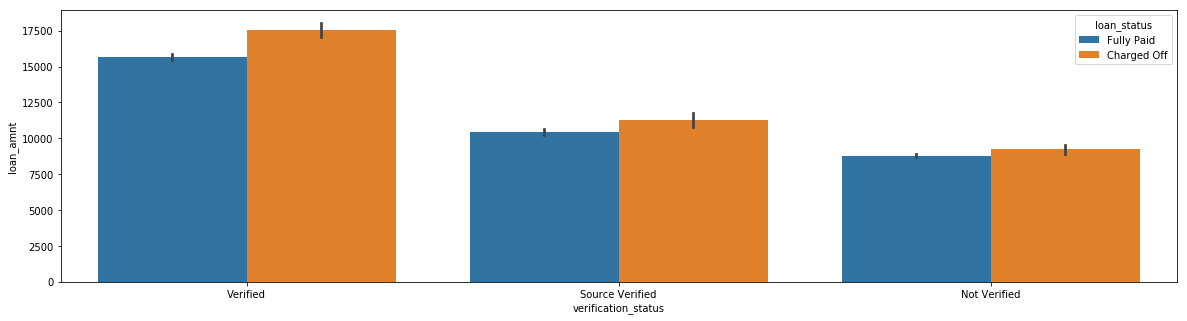

In [164]:
plotBivariateBar(loan_data,'verification_status', 'loan_amnt', hue="loan_status")

So from the observation above it seems that higher loan_amnt are more often verified than the lower loan_amnt. This is very true since if the loan_amnt is higher the chances of default are also higher as seen from earlier analysis. So its not the verification_status per se that's responsible for the default but the higher loan_amnt is. Combining these both it's true that higher loan amount are most often verfied by the company and because of higher loan amount they are most likely to default/charged off. So this verifies out on hold observation for univariate analysis.

### <span style="color:red"> Observation </span>

1) The higher loan amounts are most often verified by the company.

2) **Its not the verification_status per se that's responsible for the default but the higher loan_amnt is**. Combining these both it's true that **higher loan amount are most often verified by the company and because of higher loan amount they are most likely to default/charged off.**

### <span style='color:red'> 7) Variable </span> : <span style='color:blue'> term v/s installment v/s loan_amnt </span> 

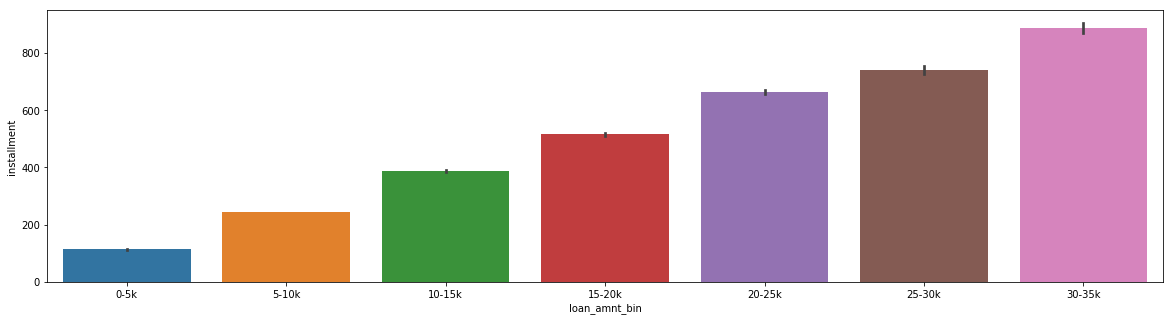

In [165]:
plotBivariateBar(loan_data,'loan_amnt_bin','installment')

From the above plot is clear that with the increase in loan_amnt the installment also increases. Thats true in real world scenario. What we actually need to check is effect of term and installment variables on loan default. Lets check that.

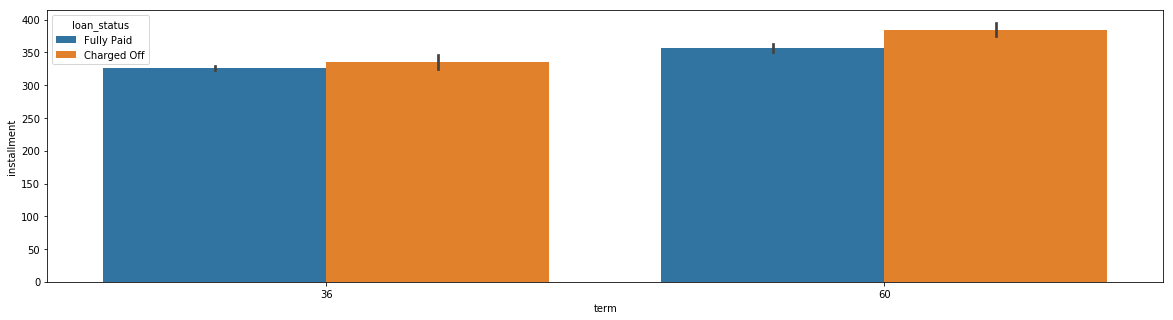

In [166]:
plotBivariateBar(loan_data,'term','installment', hue="loan_status")

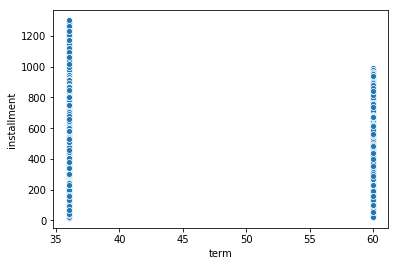

In [167]:
plotBivariateScatter(loan_data,'term','installment')

From above plot its clear that higher installments are paid for higher term (60 months) which in turn indicates that long term loans are taken for higher loan amounts. Lets verify that too.

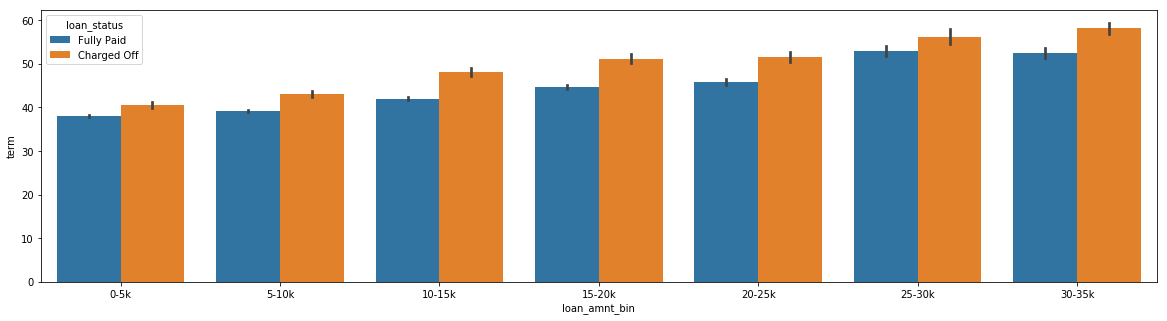

In [168]:
plotBivariateBar(loan_data,'loan_amnt_bin','term', hue="loan_status")

Hence verified from the above plot that higher loan amounts are taken for longer terms and higher installments are paid. Such loans are more prone to default/charged off.

### <span style="color:red"> Observation </span>

1) The higher loan amounts are taken for longer loan term.

2) Higher installments are paid for higer loan amounts.

2) **Higher the loan amounts, higher the installments, higher the loan term and higher are the chances for such loans to default.**

### <span style='color:red'> 8) Variable </span> : <span style='color:blue'> purpose v/s loan_amnt </span> 

Lets check what was the main purpose for which loan was applied for and what was the loan amount applied for.

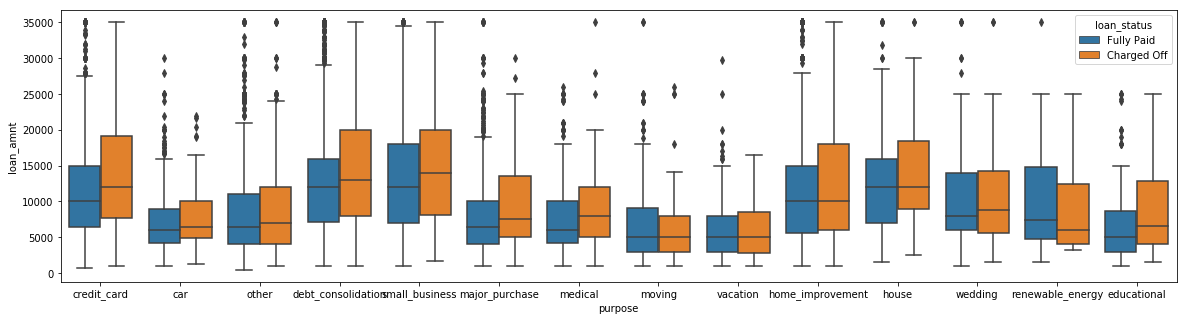

In [169]:
plotBivariateBox(loan_data,'purpose','loan_amnt',hue='loan_status')

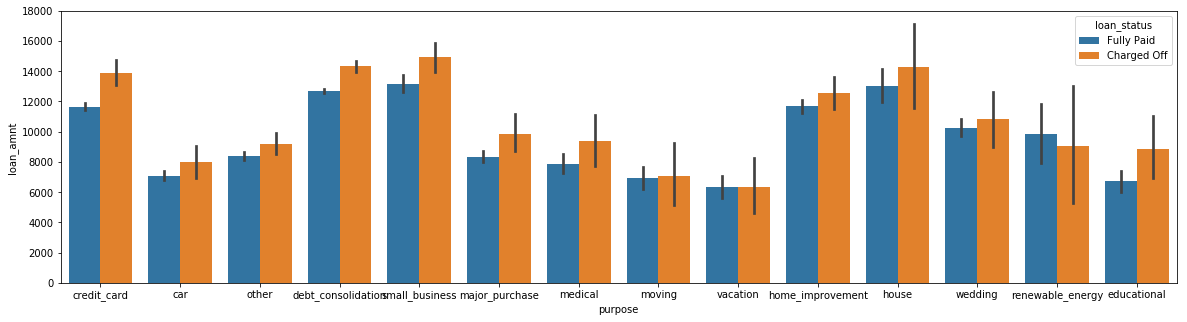

In [170]:
plotBivariateBar(loan_data,'purpose','loan_amnt',hue='loan_status')

From the plots above it seems that maximum loans and loan amount was applied for small_business, credit_card, debt_consolidation and house. Also it seems that small_business, credit card and debt_consolidation are more likely to default on their loans.

### <span style="color:red"> Observation </span>

1) Maximum loans and loan amount was applied for small_business, credit_card, debt_consolidation and house. 

2) **Small_business, credit card and debt_consolidation are more likely to default on their loans.**

### <span style='color:red'> 9) Variable </span> : <span style='color:blue'> home_ownership v/s loan_amnt </span> 

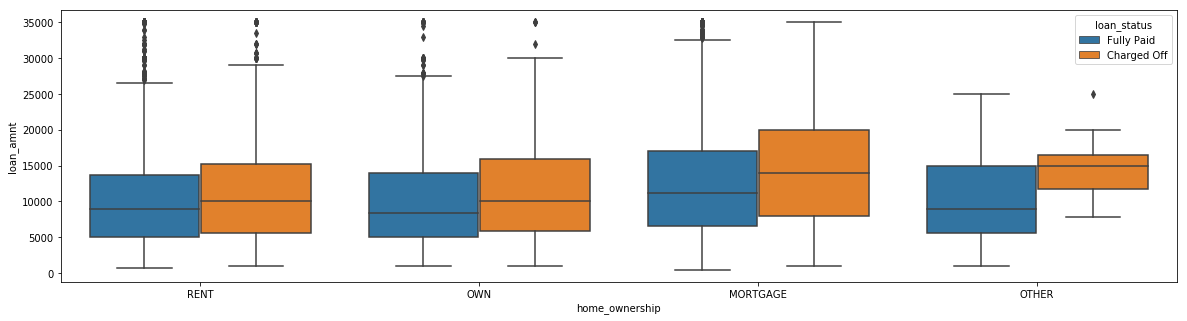

In [171]:
plotBivariateBox(loan_data,'home_ownership','loan_amnt',hue='loan_status')

From above plot its clear that maximum loan amount were requested on mortage, rent and own. Among them mortage seems to be more risky.

### <span style="color:red"> Observation </span>

1) Maximum loan amount were requested on mortgage, rent and own

2) **Mortage seems to be more prone to loan default, followed by rent and then own in that order.**

### <span style='color:red'> 10) Variable </span> : <span style='color:blue'> emp_length v/s loan_amnt v/s annual_inc </span> 

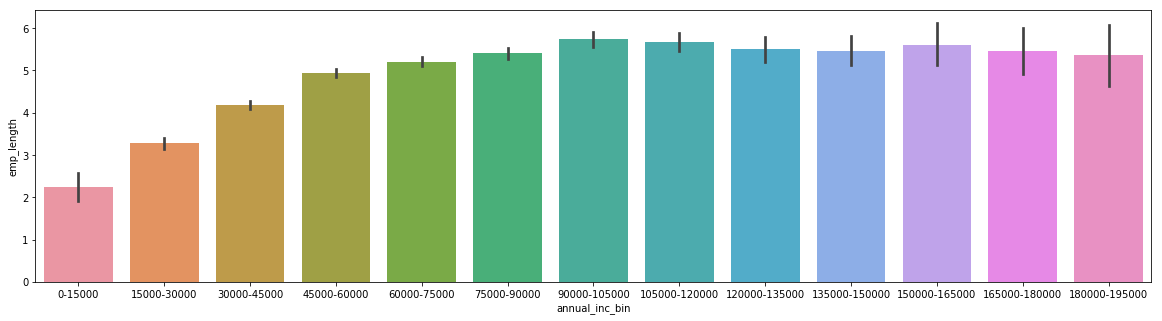

In [172]:
plotBivariateBar(loan_data,'annual_inc_bin','emp_length')

As seen from the plot, as the emp_length increases so does the annual income increases.

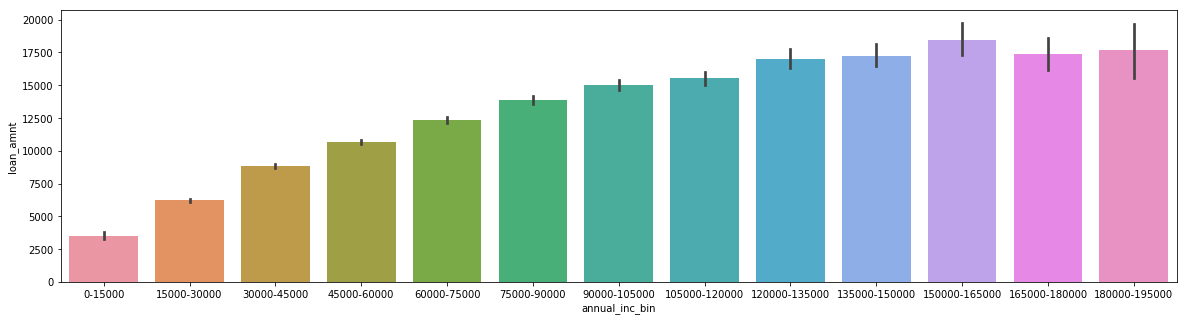

In [173]:
plotBivariateBar(loan_data,'annual_inc_bin','loan_amnt')

As the annual income increases so does the loan amount increases.

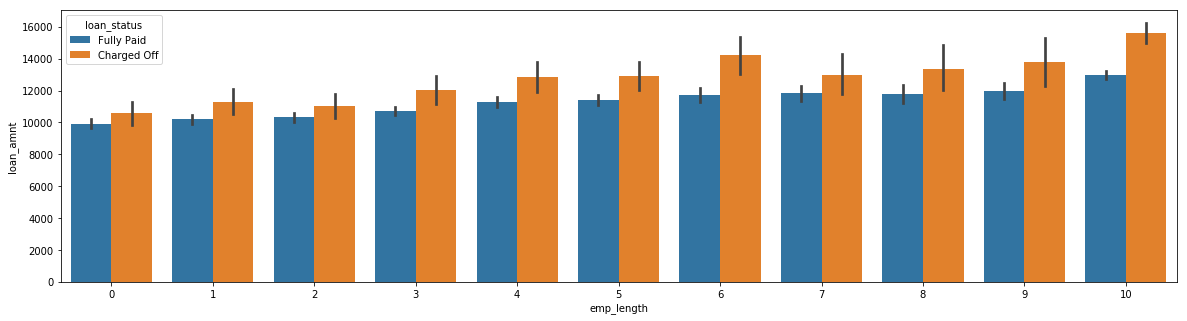

In [174]:
plotBivariateBar(loan_data,'emp_length','loan_amnt',hue='loan_status')

From the above plot its clear that as the employment length increases so does the chances for loan default increases. This will not have much to do with the employment length per se and more to do with the loan amount applied for. With more employment length comes more annual income and with more annual income comes more loan amount and with that the risk of loan default.

### <span style="color:red"> Observation </span>

**As the employment length increases so does the chances for loan default increases.**

This will not have much to do with the employment length per se and more to do with the loan amount applied for. With more employment length comes more annual income and with more annual income comes more loan amount and with that more risk of loan default.

### <span style='color:red'> 11) Variable </span> : <span style='color:blue'> dti v/s open_acc v/s loan_status </span> 

In [175]:
#dti has wide range of values so lets create bins for analysis
loan_data.dti.unique()
# Create derived variable 
loan_data['dti_bin'] = createBins(loan_data,'dti',0,30,5)

array([27.65,  1.  , 20.  , ...,  0.09,  0.12, 25.43])

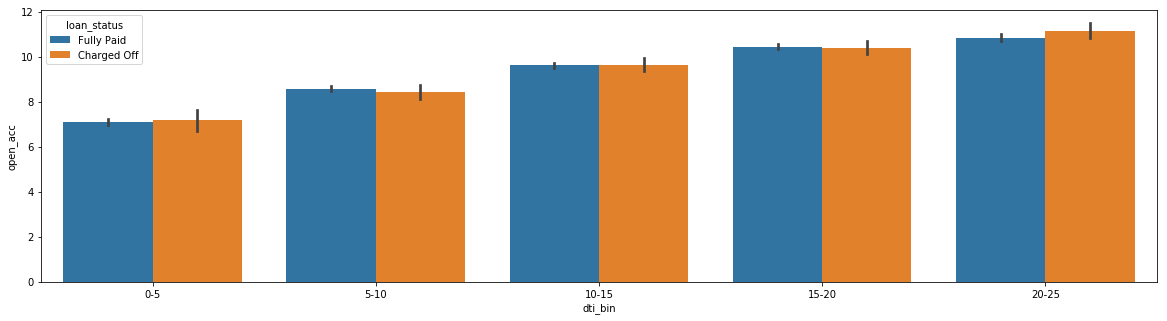

In [176]:
plotBivariateBar(loan_data,'dti_bin','open_acc',hue='loan_status')

For larger dti values (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income) there are large number of creadit lines open for the loan applicant. This might be due to human nature whereby in order to pay off the ongoing debts people take on more credit.

### <span style="color:red"> Observation </span>

1) Higher the dti higher are the values for open_acc.

2) **Higher the dti and open_acc higher is the risk for loan default**

### <span style='color:red'> 12) Variable </span> : <span style='color:blue'> revol_util v/s grade </span> 

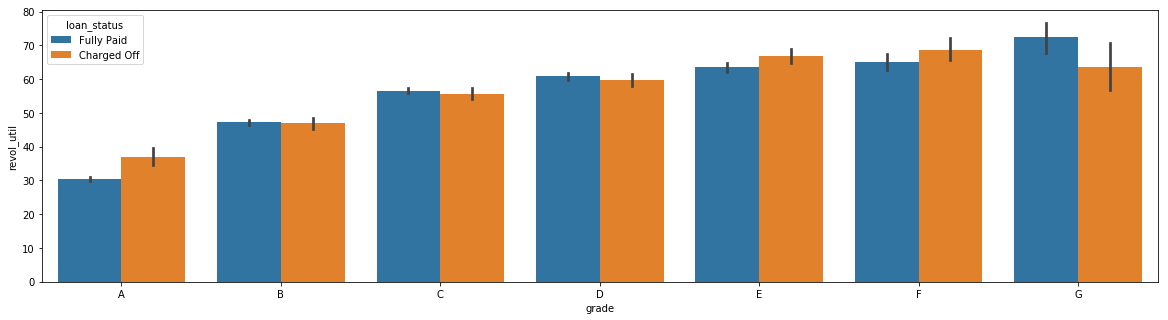

In [177]:
plotBivariateBar(loan_data,'grade','revol_util',hue='loan_status',order=['A','B','C','D','E','F','G'])

There seems to be positive linear co-relation between revol_util and grade. As the grade increases from A to G the revol_util also increases. This may be because higer loan amounts are associated with higher interest rates and with higher grades making them more prone to be defaulted.

### <span style="color:red"> Observation </span>

1) There is a positive co-relation between revol_util and loan grade. The revol_util increases as the grade increases from A to G.

2) **Higher the revol_util, higher is the risk for loan default**. This may be because higher loan amounts are associated with higher interest rates and with higher grades making them more prone to be defaulted.

### <span style='color:red'> 13) Variable </span> : <span style='color:blue'> delinq_2yrs v/s loan amount </span> 



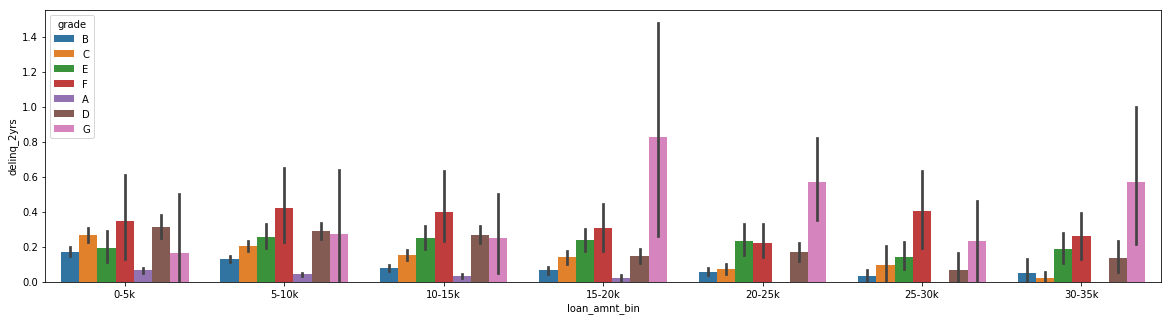

In [178]:
plotBivariateBar(loan_data,'loan_amnt_bin','delinq_2yrs', hue='grade')

From the analysis above it seems that not many loans receive investment with higher number of delinquencies.
Even though the loan amount requested is low, these loans are not invested much in.
These loans are thereby considered risky.

### <span style="color:red"> Observation </span>

1) Not many loans receive investment with higher number of delinquencies

2) Even though the loan amount requested is low, these loans are not invested much in. These loans are thereby considered risky and more prone to default.

### <span style='color:red'> 14) Variable </span> : <span style='color:blue'> delinq_2yrs v/s int_rate </span> 

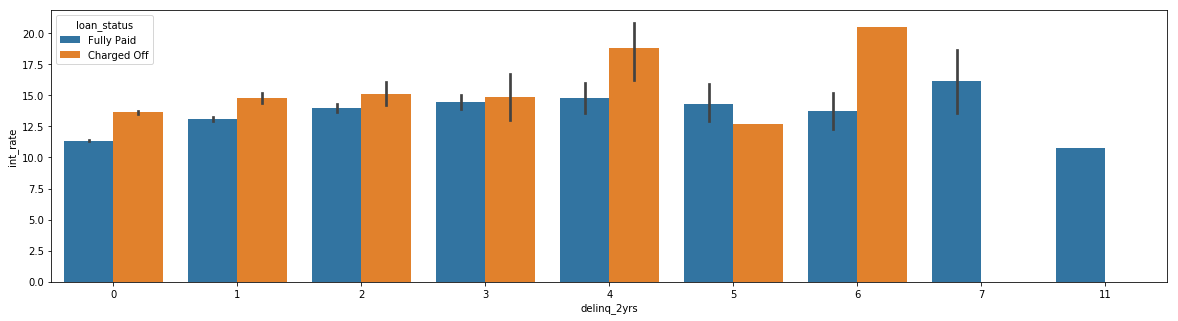

In [179]:
plotBivariateBar(loan_data,'delinq_2yrs','int_rate', hue='loan_status')

From the above plot it seems that the interest rate offered increases with the number of deliquency of the borrower. With the increase in interest rate the applicant is more probable for default.

### <span style="color:red"> Observation </span>

1) The interest rate offered increases with the number of deliquency of the borrower. 

2) With the increase in interest rate the applicant is more probable for default.

## <span style='color:orange'> Derived Metrics Analysis </span>

We are already done with Univariate and Bivariate analysis now lets get on to the derived metrics analysis. Derived metrics are the metrics that are not directly available in the dataset rather they are derived from the known variables from the dataset.

Few variables that can be used for Derived Metric Analysis are the timestamp variables identified earlier. We can derive metrics such as year, month from the timestamp and then analyze the data as to when and how many loans were issue and whats the status for the loans approved. Lets start with the analysis and check as we go.


In [181]:
#Lets first define a common method to anaylze the derived variables from timestamps
def plotDerivedDates(df,col_year,col_month):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(col_year,data=df, order=sorted(df[col_year].unique()))
    plt.subplot(1, 2, 2)
    sns.countplot(x=col_month, data=df, order=sorted(df[col_month].unique()))
    #Fraction of loans charged off and fully Paid  
    plotCheckLoanStatus(df, col_year)
    plotCheckLoanStatus(df, col_month)
    plt.show()

### <span style='color:red'> 1) Variable </span> : <span style='color:blue'> issued_d_year and issed_d_month </span> 
##### Derived from issue_d variable

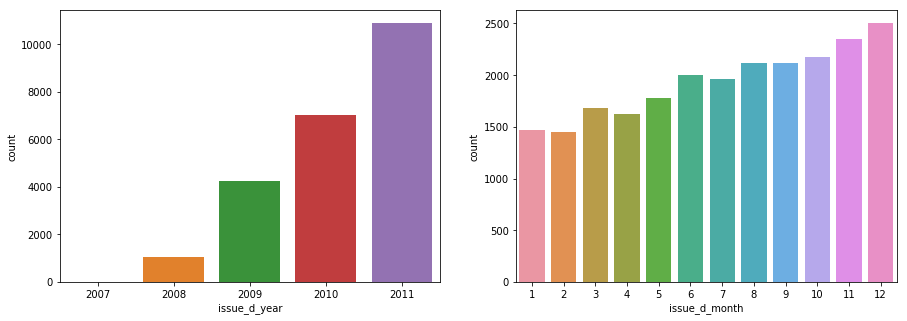

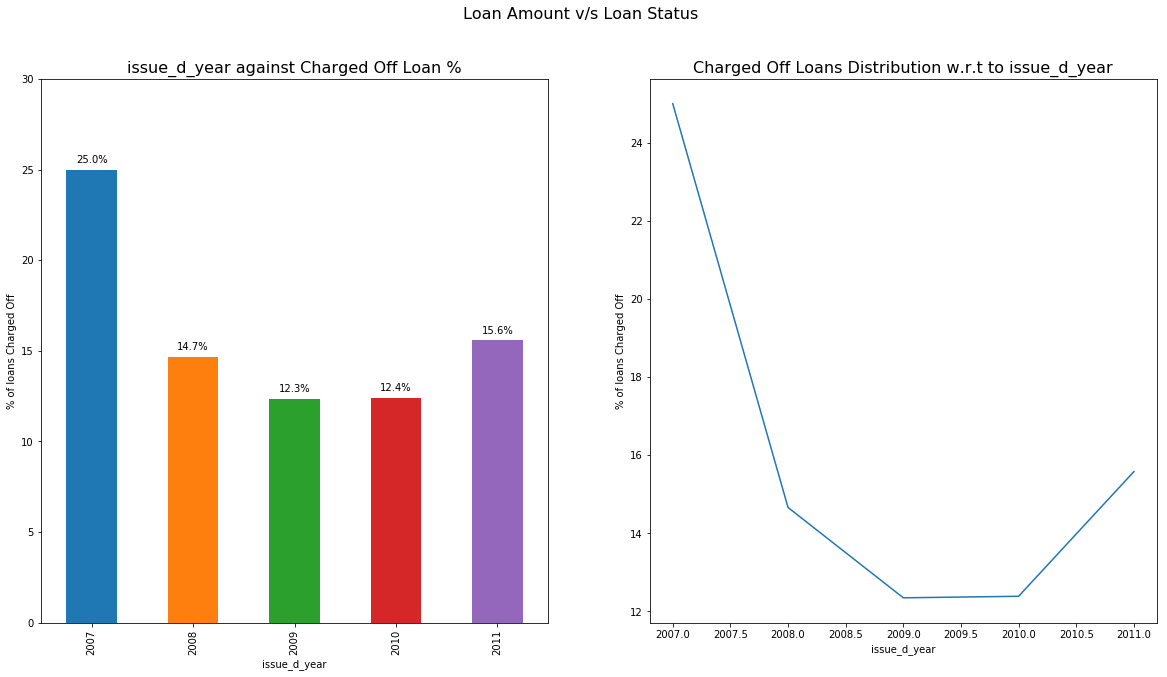

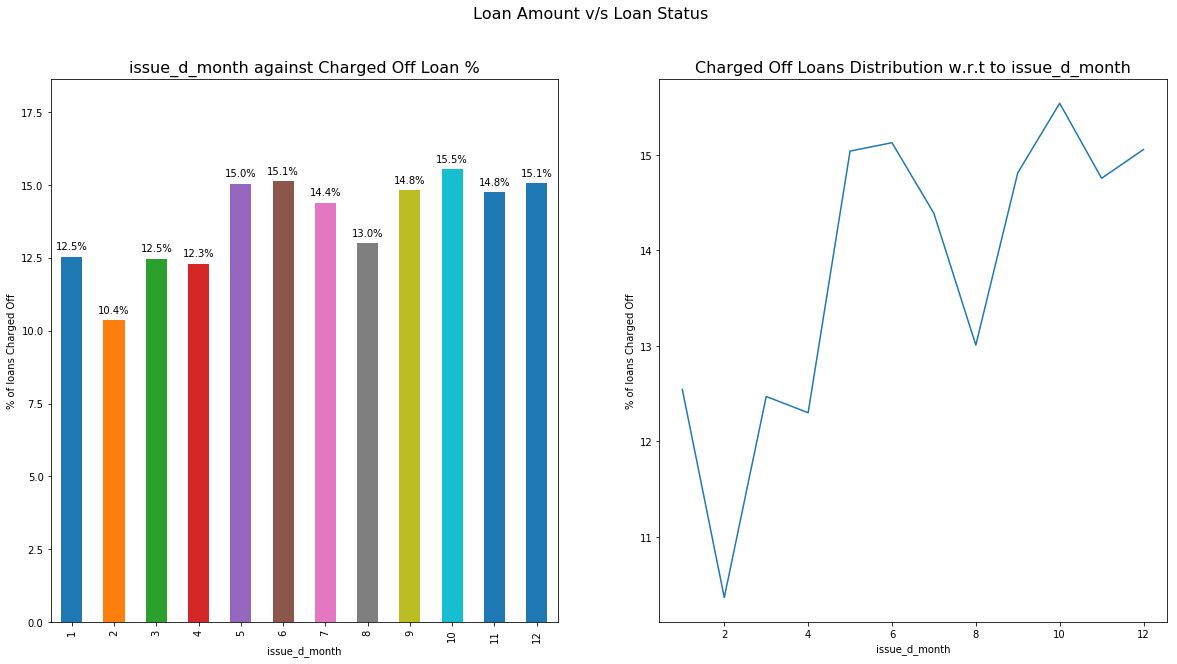

In [182]:
#Plot the count distribution
plotDerivedDates(loan_data,'issue_d_year','issue_d_month')

From above plot its clear that maximum loans were approved for year 2011. Also the loans approved increases as we approach December. There can be 2 reasons for it:

1) The company is trying to meet its targets. 

2) People tend to spend more around holiday season and hence apply for more credit?

### <span style="color:red"> Observation </span>

1) The charged off percentage was more for 2007 that might have lead to 2008 crisis. Post 2008 the charged off rates are low comparatively and more uniform. Thats may be because the lending forms have started more intensively scrutinizing the loan applications before approval.

2) December is the month when highest loans are applied that may be because the company is either trying to meet its financial targets or people are spending more around holidays and thereby applying for more loans.

3) For now there doesnt seem much significance of year or month on the loan default.

### <span style='color:red'> 2) Variable </span> : <span style='color:blue'> earliest_cr_line_year and earliest_cr_line_month </span> 
##### Derived from earliest_cr_line variable

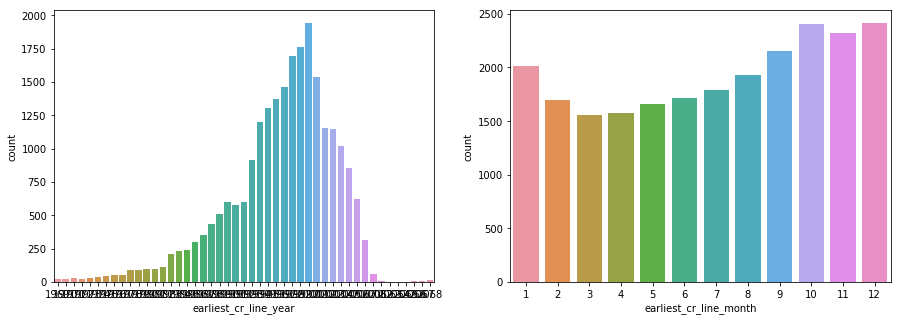

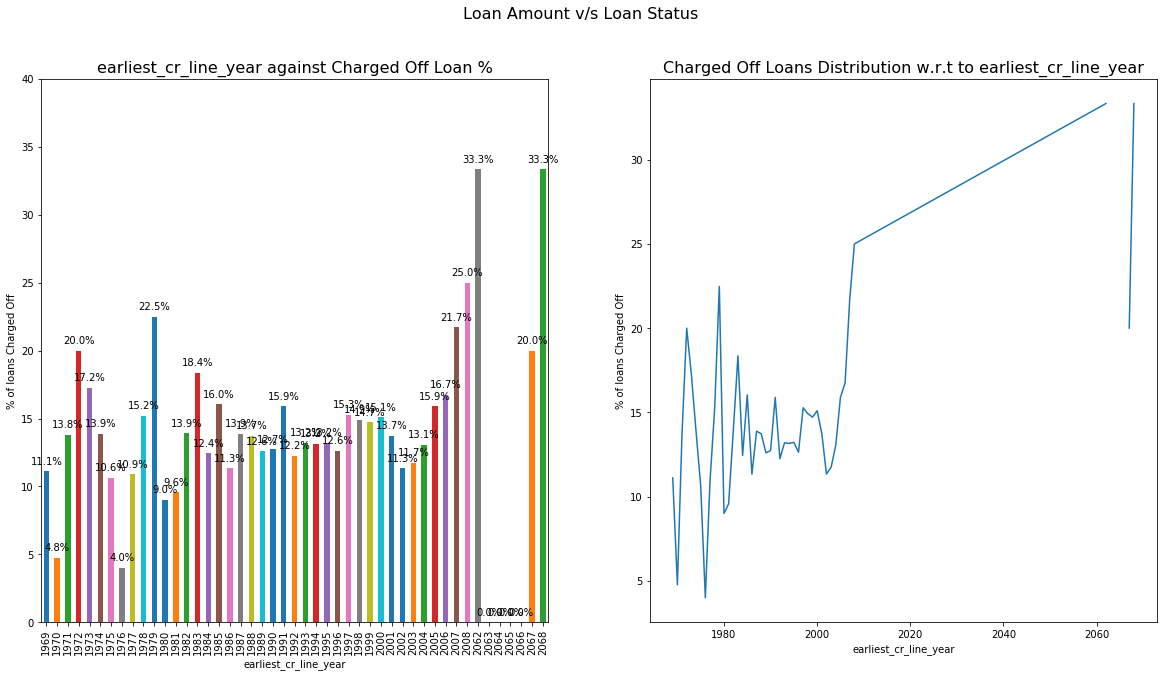

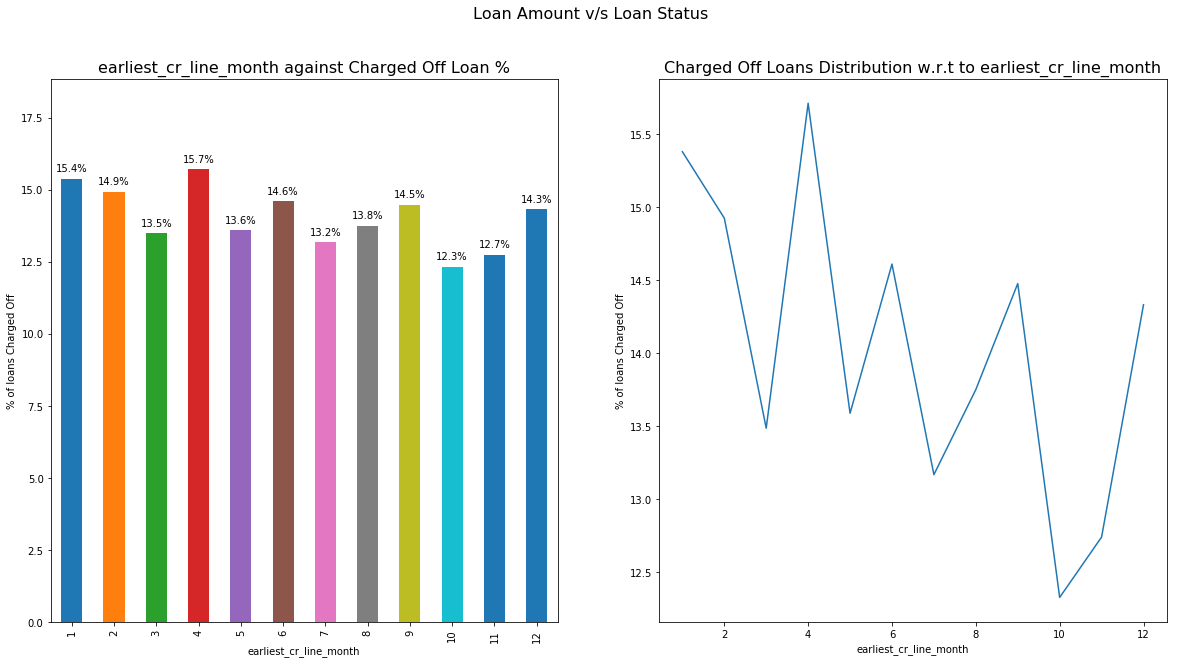

In [183]:
plotDerivedDates(loan_data,'earliest_cr_line_year','earliest_cr_line_month')

From the above plots it seems like there is some data missing from 2008 onwards and some data is available for 2060 which is clearly not true. Can this be because of Y2K issue? Lets fix the issue first

In [184]:
loan_data[loan_data['earliest_cr_line_year'] > 2019 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2062, 2066, 2064, 2063], dtype=int64)

In [185]:
loan_data.loc[loan_data['earliest_cr_line_year'] > 2019 , 'earliest_cr_line_year'] = loan_data['earliest_cr_line_year'] - 100

In [186]:
loan_data.earliest_cr_line_year.unique()

array([1985, 1999, 1996, 2005, 2007, 2004, 1998, 2003, 1993, 1997, 1983,
       2006, 1987, 1981, 2000, 1994, 1995, 1992, 2002, 1989, 1986, 1990,
       2001, 1988, 1991, 2008, 1984, 1978, 1971, 1980, 1972, 1970, 1975,
       1976, 1977, 1979, 1968, 1974, 1982, 1967, 1965, 1969, 1973, 1962,
       1966, 1964, 1963], dtype=int64)

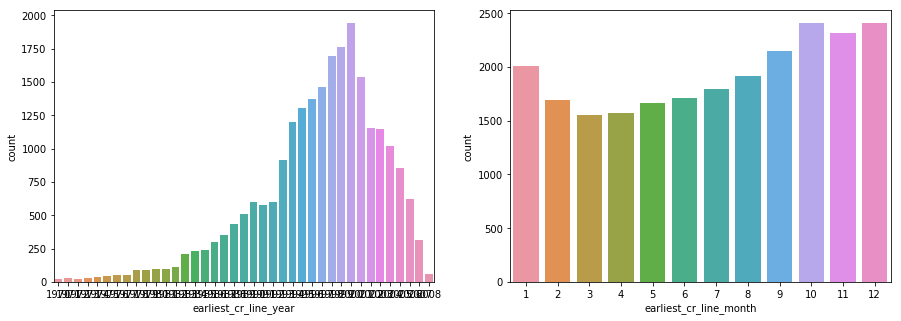

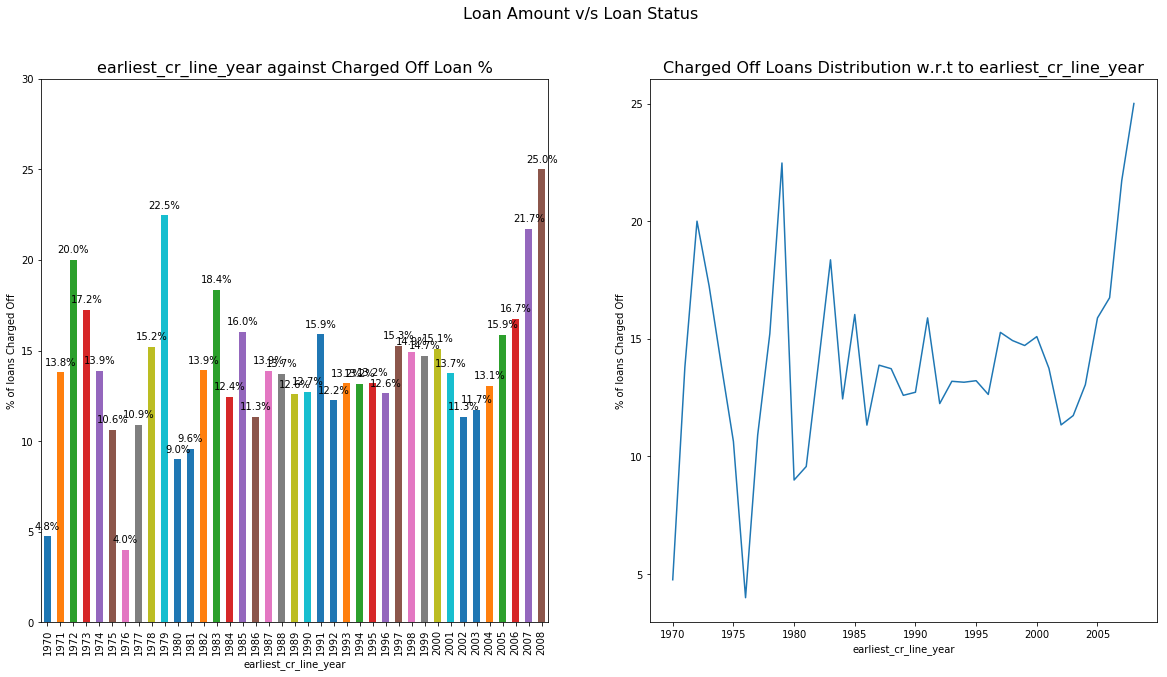

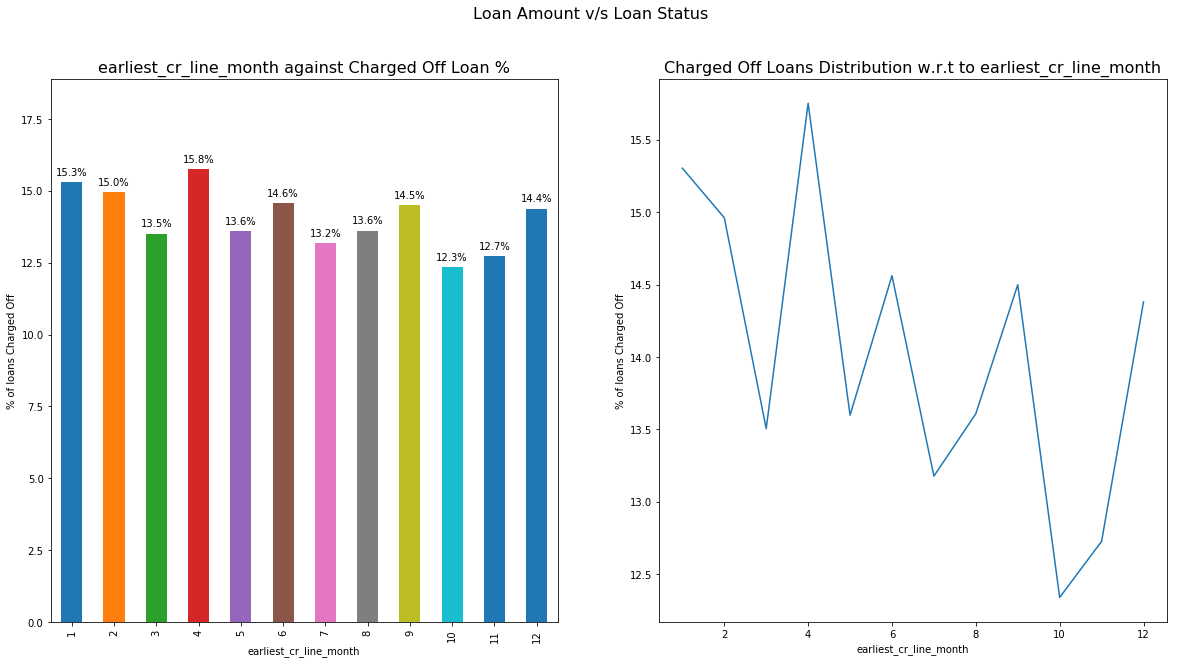

In [187]:
#The issue seems fixed lets check the data again
#Also seems the data is available for only 1969 and greater years so lets filter that out too
plotDerivedDates(loan_data.loc[loan_data['earliest_cr_line_year'] > 1969],'earliest_cr_line_year','earliest_cr_line_month')

In year 2008 and 1978 the percentage of default is more. This can be due to financial crisis in US in 1978 and 2008.

From the plot above it seems that newer loan applicants are defaulting more often around the crisis years 2008 and 1978.

So we can assume that in general the newer loan applicants at the times of recession are more prone to defaulting. This might be because either these loan applicants are freshers with low income or there might some other trend that the recession lending follows. This needs furthur analysis.

### <span style="color:red"> Observation </span>

1) In year 2008 and 1978 the percentage of default is more. This can be due to financial crisis in US in 1978 and 2008.

2) Newer loan applicants are defaulting more often around the crisis years 2008 and 1978.

3) So we can assume that in general the newer loan applicants at the times of recession are more prone to defaulting. This might be because either these loan applicants are freshers with low income or there might some other trend that the recession lending follows. This needs furthur analysis.

### <span style='color:red'> 3) Variable </span> : <span style='color:blue'> last_pymnt_d_year and last_pymnt_d_month </span> 
##### Derived from last_pymnt_d variable

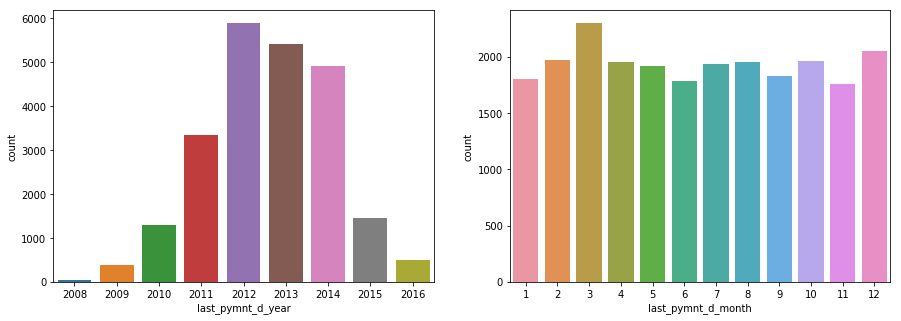

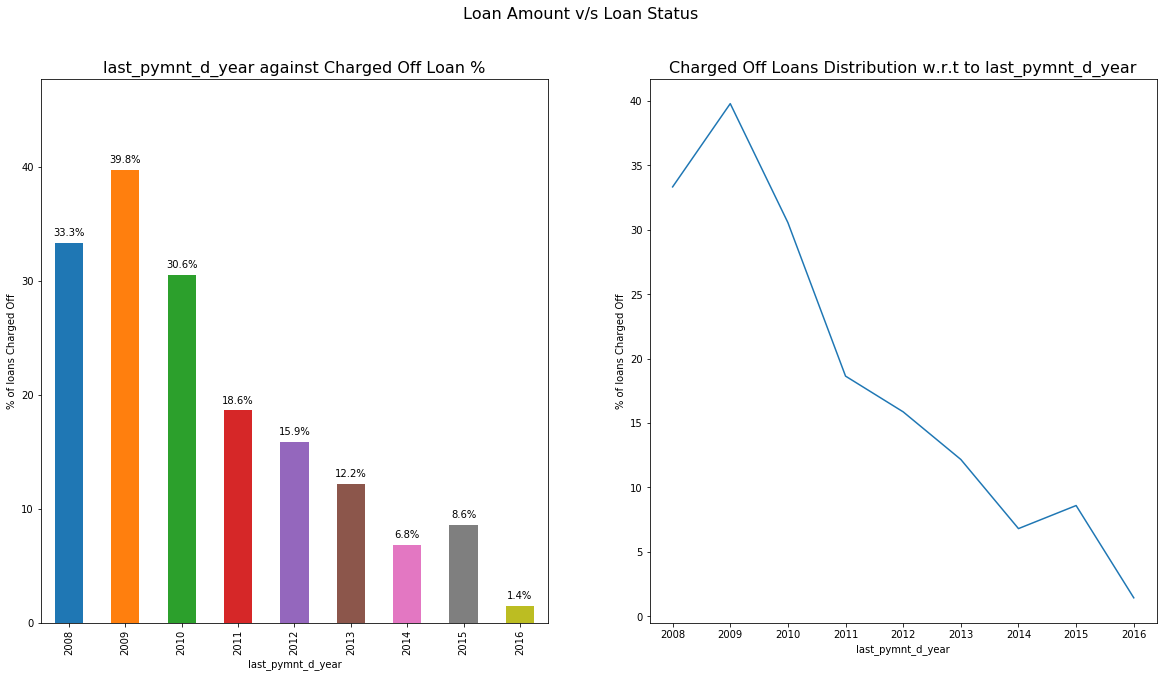

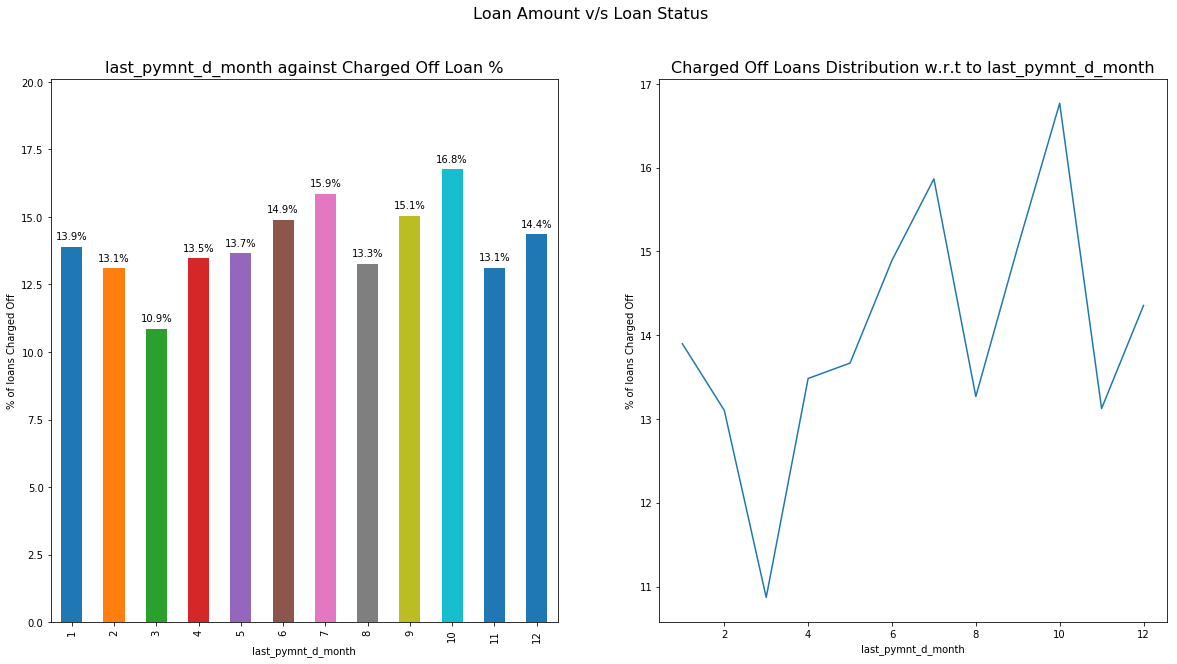

In [188]:
plotDerivedDates(loan_data,'last_pymnt_d_year','last_pymnt_d_month')

From the plots above its seems many loan applicants defaulted with their payments in the year 2008, 2009 and 2010. This goes with our earlier analysis that 2008 financial crisis might have affected this variable too.

### <span style="color:red"> Observation </span>

1) Most loan applicants defaulted on payment in year 2008, 2009 and 2010. This might be because of the financial crisis of 2008.

This observation also seconds our earlier observation that:

a) Newer loan applicants are defaulting more often around the crisis years 2008 and 1978.

b) So we can assume that in general the newer loan applicants at the times of recession are more prone to defaulting. This might be because either these loan applicants are freshers with low income or there might some other trend that the recession lending follows. This needs furthur analysis.